In [1]:
#If you are on Google Colab uncomment the following commands:
#!pip install numpy pandas matplotlib nest_asyncio
#import cmdstanpy
#cmdstanpy.install_cmdstan()
#!pip install o2o-process

In [1]:
from o2o import BivariateHawkesProcessSimulator, ParameterEstimator, O2OAnalyzer
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined_data.csv", low_memory=False, na_values=['', ' '])
cols_to_drop = ["OFFENSE_CODE_GROUP", "UCR_PART"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")
df = df.dropna(subset=["Location", "DISTRICT"])
print(f"Cleaned dataset loaded into df, shape = {df.shape}")


Cleaned dataset loaded into df, shape = (410002, 15)


In [4]:
T = 184 # Time window
M = 1 # Number of users (e.g., gangs)

### Generate synthetic online and offline data using a Bivariate Hawkes Process

This step generates synthetic data, useful for testing or understanding how the model behaves. However, you can skip it if you plan to use real data instead.

The model expects input data in the form of timestamp lists, where each timestamp represents the number of days since the start of the observation window. If your data is in a standard date format (like `YYYY-MM-DD`), you’ll need to convert it into days relative to a reference start date.

Real data could come from, for example, gang-related social media posts (online) and violent incidents (offline), or other settings involving paired behaviors, such as customer actions online and in-store, or emergency alerts and real-world responses.


In [5]:
#Data was retrived through preprocessing notebook

#sim = BivariateHawkesProcessSimulator(M, T) #call the class
data_B2 = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.03958333333333333, 0.2743055555555556, 0.3472222222222222, 0.40555555555555556, 0.4222222222222222, 0.4222222222222222, 0.5263888888888889, 0.5395833333333333, 0.5819444444444445, 0.6041666666666666, 0.6229166666666667, 0.6388888888888888, 0.6423611111111112, 0.65625, 0.6597222222222222, 0.6611111111111111, 0.6784722222222223, 0.6819444444444445, 0.6979166666666666, 0.7916666666666666, 0.8055555555555556, 0.81875, 0.8638888888888889, 0.8798611111111111, 0.9138888888888889, 0.9138888888888889, 1.0, 1.0, 1.0, 1.1131944444444444, 1.2569444444444444, 1.2604166666666667, 1.3083333333333333, 1.4055555555555554, 1.4159722222222222, 1.4583333333333333, 1.4805555555555556, 1.5118055555555556, 1.5180555555555555, 1.5541666666666667, 1.5541666666666667, 1.625, 1.6402777777777777, 1.6465277777777778, 1.66875, 1.6715277777777777, 1.6979166666666667, 1.7104166666666667, 1.8243055555555556, 1.8388888888888888, 1.8791666666666667, 1.9118055555555555, 1.9166666666666667, 1.917361111111111, 1.91875, 1.9861111111111112, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0395833333333333, 2.097916666666667, 2.2916666666666665, 2.3125, 2.3520833333333333, 2.3541666666666665, 2.404861111111111, 2.4402777777777778, 2.5597222222222222, 2.584722222222222, 2.6194444444444445, 2.6354166666666665, 2.6590277777777778, 2.713888888888889, 2.716666666666667, 2.8333333333333335, 2.8673611111111112, 2.9305555555555554, 2.9993055555555554, 3.0, 3.0, 3.0, 3.084722222222222, 3.165277777777778, 3.2291666666666665, 3.2527777777777778, 3.392361111111111, 3.4770833333333333, 3.4819444444444443, 3.4854166666666666, 3.60625, 3.642361111111111, 3.654861111111111, 3.6694444444444443, 3.6770833333333335, 3.686111111111111, 3.7444444444444445, 3.7465277777777777, 3.772222222222222, 3.9680555555555554, 4.0, 4.059722222222222, 4.1715277777777775, 4.280555555555556, 4.366666666666666, 4.392361111111111, 4.416666666666667, 4.447916666666667, 4.4625, 4.476388888888889, 4.479166666666667, 4.569444444444445, 4.602083333333334, 4.645833333333333, 4.645833333333333, 4.675, 4.74375, 4.778472222222222, 4.78125, 4.807638888888889, 4.81875, 4.839583333333334, 4.936111111111111, 4.970833333333333, 5.021527777777778, 5.060416666666667, 5.095138888888889, 5.148611111111111, 5.444444444444445, 5.447916666666667, 5.478472222222222, 5.5, 5.5, 5.607638888888889, 5.669444444444444, 5.680555555555555, 5.682638888888889, 5.701388888888889, 5.722916666666666, 5.75, 5.761111111111111, 5.791666666666667, 5.8909722222222225, 5.897222222222222, 5.944444444444445, 6.0, 6.0, 6.0, 6.127083333333333, 6.291666666666667, 6.302083333333333, 6.363194444444445, 6.385416666666667, 6.402777777777778, 6.425, 6.434722222222222, 6.438888888888889, 6.46875, 6.498611111111111, 6.5375, 6.538194444444445, 6.538888888888889, 6.5625, 6.730555555555555, 6.735416666666667, 6.836805555555555, 6.929861111111111, 6.98125, 7.0, 7.0, 7.0, 7.298611111111111, 7.354861111111111, 7.3597222222222225, 7.424305555555556, 7.447916666666667, 7.5, 7.520833333333333, 7.54375, 7.573611111111111, 7.586111111111111, 7.589583333333334, 7.607638888888889, 7.725, 7.767361111111111, 7.778472222222222, 7.801388888888889, 7.830555555555556, 7.852777777777778, 7.935416666666667, 7.955555555555556, 8.0, 8.0, 8.180555555555555, 8.334027777777777, 8.376388888888888, 8.377777777777778, 8.404166666666667, 8.436805555555555, 8.503472222222221, 8.520833333333334, 8.5625, 8.570833333333333, 8.575, 8.583333333333334, 8.63125, 8.652777777777779, 8.655555555555555, 8.663194444444445, 8.697222222222223, 8.719444444444445, 8.722916666666666, 8.734722222222222, 8.747222222222222, 8.752083333333333, 8.814583333333333, 8.820833333333333, 8.822916666666666, 8.846527777777778, 8.89375, 9.047916666666667, 9.089583333333334, 9.180555555555555, 9.28125, 9.291666666666666, 9.354166666666666, 9.388194444444444, 9.395833333333334, 9.41388888888889, 9.471527777777778, 9.498611111111112, 9.5, 9.527777777777779, 9.594444444444445, 9.597222222222221, 9.645833333333334, 9.658333333333333, 9.660416666666666, 9.666666666666666, 9.677083333333334, 9.720833333333333, 9.73611111111111, 9.753472222222221, 9.76388888888889, 9.791666666666666, 9.85763888888889, 9.9, 9.90625, 9.913194444444445, 9.929166666666667, 9.931944444444444, 9.936805555555555, 9.958333333333334, 10.0, 10.0, 10.0, 10.0, 10.001388888888888, 10.296527777777778, 10.3125, 10.39861111111111, 10.409027777777778, 10.430555555555555, 10.55486111111111, 10.569444444444445, 10.583333333333334, 10.595138888888888, 10.597222222222221, 10.604166666666666, 10.61736111111111, 10.634722222222223, 10.696527777777778, 10.700694444444444, 10.70138888888889, 10.708333333333334, 10.729166666666666, 10.739583333333334, 10.754166666666666, 10.784722222222221, 10.849305555555556, 10.879861111111111, 10.950694444444444, 10.978472222222223, 10.995833333333334, 11.0, 11.0, 11.0, 11.0, 11.002083333333333, 11.015972222222222, 11.018055555555556, 11.029861111111112, 11.106944444444444, 11.25, 11.3125, 11.339583333333334, 11.421527777777778, 11.464583333333334, 11.514583333333333, 11.567361111111111, 11.604166666666666, 11.638194444444444, 11.680555555555555, 11.713888888888889, 11.747916666666667, 11.765972222222222, 11.801388888888889, 11.897916666666667, 12.0, 12.0, 12.0, 12.0, 12.354166666666666, 12.375, 12.384027777777778, 12.501388888888888, 12.58125, 12.58125, 12.63888888888889, 12.6875, 12.689583333333333, 12.738888888888889, 12.752777777777778, 12.754861111111111, 12.75625, 12.831944444444444, 12.833333333333334, 12.916666666666666, 12.969444444444445, 13.0, 13.0, 13.0, 13.0, 13.0, 13.161805555555556, 13.248611111111112, 13.333333333333334, 13.338194444444444, 13.372916666666667, 13.395138888888889, 13.410416666666666, 13.44375, 13.44513888888889, 13.463888888888889, 13.465277777777779, 13.583333333333334, 13.585416666666667, 13.665972222222223, 13.6875, 13.723611111111111, 13.729166666666666, 13.73611111111111, 13.747222222222222, 13.784027777777778, 13.833333333333334, 13.836805555555555, 13.865277777777777, 13.877777777777778, 13.879166666666666, 13.909027777777778, 13.92013888888889, 13.971527777777778, 13.997222222222222, 14.0, 14.254166666666666, 14.288194444444445, 14.3125, 14.317361111111111, 14.338888888888889, 14.34375, 14.347916666666666, 14.375, 14.48125, 14.489583333333334, 14.50625, 14.510416666666666, 14.543055555555556, 14.583333333333334, 14.60625, 14.694444444444445, 14.697222222222223, 14.745138888888889, 14.752083333333333, 14.7625, 15.0, 15.0, 15.01388888888889, 15.053472222222222, 15.125694444444445, 15.136805555555556, 15.14236111111111, 15.308333333333334, 15.338888888888889, 15.395138888888889, 15.40625, 15.408333333333333, 15.42986111111111, 15.484027777777778, 15.52361111111111, 15.583333333333334, 15.602083333333333, 15.627777777777778, 15.660416666666666, 15.680555555555555, 15.689583333333333, 15.75, 15.8, 15.839583333333334, 15.844444444444445, 15.958333333333334, 15.959722222222222, 15.995833333333334, 16.0, 16.0, 16.0, 16.041666666666668, 16.063194444444445, 16.114583333333332, 16.138194444444444, 16.25347222222222, 16.333333333333332, 16.363888888888887, 16.414583333333333, 16.440277777777776, 16.48263888888889, 16.524305555555557, 16.528472222222224, 16.555555555555557, 16.605555555555554, 16.635416666666668, 16.65625, 16.666666666666668, 16.67222222222222, 16.688194444444445, 16.69097222222222, 16.729166666666668, 16.73125, 16.74652777777778, 16.75, 16.79652777777778, 16.875, 16.875, 16.99375, 17.0, 17.05763888888889, 17.1, 17.202083333333334, 17.258333333333333, 17.3125, 17.375, 17.375, 17.434722222222224, 17.468055555555555, 17.472916666666666, 17.502083333333335, 17.56388888888889, 17.57777777777778, 17.604166666666668, 17.625, 17.625, 17.68611111111111, 17.73402777777778, 17.75, 17.7625, 17.780555555555555, 17.791666666666668, 17.846527777777776, 17.85, 17.854861111111113, 18.0, 18.033333333333335, 18.104166666666668, 18.17361111111111, 18.291666666666668, 18.3125, 18.354166666666668, 18.356944444444444, 18.37013888888889, 18.497916666666665, 18.564583333333335, 18.568055555555556, 18.573611111111113, 18.618055555555557, 18.677777777777777, 18.679861111111112, 18.680555555555557, 18.68402777777778, 18.693055555555556, 18.803472222222222, 18.825694444444444, 18.875, 18.916666666666668, 18.92013888888889, 18.92013888888889, 18.920833333333334, 18.958333333333332, 18.960416666666667, 19.0, 19.0, 19.010416666666668, 19.060416666666665, 19.129166666666666, 19.147916666666667, 19.333333333333332, 19.415972222222223, 19.454166666666666, 19.478472222222223, 19.493055555555557, 19.54375, 19.57847222222222, 19.58125, 19.645138888888887, 19.71875, 19.76597222222222, 19.784027777777776, 19.791666666666668, 19.81597222222222, 19.832638888888887, 19.884027777777778, 19.931944444444444, 20.0, 20.260416666666668, 20.318055555555556, 20.37986111111111, 20.395833333333332, 20.404166666666665, 20.485416666666666, 20.528472222222224, 20.541666666666668, 20.55902777777778, 20.5625, 20.62361111111111, 20.625, 20.665277777777778, 20.669444444444444, 20.707638888888887, 20.738194444444446, 20.785416666666666, 20.789583333333333, 20.82847222222222, 20.872916666666665, 20.918055555555554, 20.92361111111111, 20.94097222222222, 20.959027777777777, 20.98125, 21.0, 21.006944444444443, 21.04652777777778, 21.0625, 21.233333333333334, 21.2875, 21.30902777777778, 21.372222222222224, 21.431944444444444, 21.434722222222224, 21.486805555555556, 21.510416666666668, 21.528472222222224, 21.538194444444443, 21.540972222222223, 21.583333333333332, 21.585416666666667, 21.586805555555557, 21.59861111111111, 21.646527777777777, 21.69097222222222, 21.693055555555556, 21.694444444444443, 21.70138888888889, 21.720833333333335, 21.79861111111111, 21.80763888888889, 21.834722222222222, 21.925, 22.020833333333332, 22.306944444444444, 22.314583333333335, 22.433333333333334, 22.52777777777778, 22.575, 22.59375, 22.668055555555554, 22.804861111111112, 22.825, 22.864583333333332, 22.87986111111111, 22.913194444444443, 22.94097222222222, 22.958333333333332, 22.98263888888889, 22.9875, 23.0, 23.0, 23.03472222222222, 23.23472222222222, 23.3125, 23.334722222222222, 23.354166666666668, 23.35902777777778, 23.40138888888889, 23.422916666666666, 23.46736111111111, 23.474305555555556, 23.489583333333332, 23.520833333333332, 23.554861111111112, 23.583333333333332, 23.63888888888889, 23.646527777777777, 23.677083333333332, 23.708333333333332, 23.708333333333332, 23.728472222222223, 23.745833333333334, 23.75, 23.7625, 23.778472222222224, 23.84722222222222, 23.85972222222222, 23.85972222222222, 23.8875, 24.0, 24.0, 24.0, 24.0, 24.019444444444446, 24.125, 24.291666666666668, 24.322222222222223, 24.339583333333334, 24.34722222222222, 24.350694444444443, 24.352083333333333, 24.354166666666668, 24.380555555555556, 24.384027777777778, 24.43263888888889, 24.479166666666668, 24.500694444444445, 24.59027777777778, 24.591666666666665, 24.601388888888888, 24.70347222222222, 24.70625, 24.76527777777778, 24.78472222222222, 24.791666666666668, 24.791666666666668, 24.8, 24.875, 24.89236111111111, 25.084027777777777, 25.260416666666668, 25.273611111111112, 25.413888888888888, 25.416666666666668, 25.427083333333332, 25.625, 25.641666666666666, 25.650694444444444, 25.65486111111111, 25.794444444444444, 25.8125, 25.836805555555557, 25.89375, 25.92152777777778, 25.931944444444444, 25.958333333333332, 26.0, 26.0, 26.229166666666668, 26.34375, 26.403472222222224, 26.490972222222222, 26.5375, 26.585416666666667, 26.600694444444443, 26.686805555555555, 26.700694444444444, 26.70486111111111, 26.731944444444444, 26.731944444444444, 26.75, 26.82986111111111, 26.852777777777778, 26.874305555555555, 26.882638888888888, 26.889583333333334, 26.895833333333332, 26.90763888888889, 27.0, 27.0, 27.01597222222222, 27.041666666666668, 27.049305555555556, 27.084722222222222, 27.09236111111111, 27.2, 27.270833333333332, 27.3125, 27.333333333333332, 27.458333333333332, 27.459722222222222, 27.469444444444445, 27.5, 27.571527777777778, 27.589583333333334, 27.597916666666666, 27.68402777777778, 27.69375, 27.704166666666666, 27.704166666666666, 27.744444444444444, 27.759722222222223, 27.775, 27.77777777777778, 27.784027777777776, 27.801388888888887, 27.81111111111111, 27.833333333333332, 27.836805555555557, 27.836805555555557, 27.84027777777778, 27.852083333333333, 27.864583333333332, 27.916666666666668, 28.0, 28.25, 28.27638888888889, 28.291666666666668, 28.306944444444444, 28.3125, 28.375, 28.375, 28.39236111111111, 28.4375, 28.476388888888888, 28.490277777777777, 28.499305555555555, 28.55902777777778, 28.610416666666666, 28.65972222222222, 28.666666666666668, 28.68402777777778, 28.69236111111111, 28.71875, 28.74513888888889, 28.75, 28.756944444444443, 28.78611111111111, 28.799305555555556, 28.84236111111111, 28.850694444444443, 28.872222222222224, 28.875, 28.9, 28.965972222222224, 29.038194444444443, 29.113194444444446, 29.11875, 29.149305555555557, 29.288194444444443, 29.30763888888889, 29.333333333333332, 29.334722222222222, 29.334722222222222, 29.375, 29.520833333333332, 29.541666666666668, 29.541666666666668, 29.571527777777778, 29.68611111111111, 29.7375, 29.836805555555557, 29.854166666666668, 29.882638888888888, 29.913888888888888, 29.916666666666668, 29.916666666666668, 29.958333333333332, 30.0, 30.0, 30.274305555555557, 30.309722222222224, 30.332638888888887, 30.38125, 30.40763888888889, 30.42222222222222, 30.475694444444443, 30.55902777777778, 30.584722222222222, 30.604166666666668, 30.610416666666666, 30.625, 30.666666666666668, 30.666666666666668, 30.68611111111111, 30.70486111111111, 30.708333333333332, 30.709027777777777, 30.71527777777778, 30.720833333333335, 30.7375, 30.754166666666666, 30.773611111111112, 30.825694444444444, 30.827083333333334, 30.86111111111111, 30.864583333333332, 30.877777777777776, 30.886805555555554, 30.945138888888888, 30.950694444444444, 30.978472222222223, 31.0, 31.0, 31.0, 31.153472222222224, 31.289583333333333, 31.385416666666668, 31.40625, 31.429861111111112, 31.4375, 31.50138888888889, 31.5625, 31.566666666666666, 31.604166666666668, 31.61111111111111, 31.615972222222222, 31.617361111111112, 31.666666666666668, 31.677777777777777, 31.68263888888889, 31.691666666666666, 31.70138888888889, 31.713194444444444, 31.729166666666668, 31.74375, 31.839583333333334, 31.854166666666668, 31.913194444444443, 31.913888888888888, 31.934722222222224, 31.940277777777776, 31.947222222222223, 31.96527777777778, 32.0, 32.0, 32.0, 32.10138888888889, 32.33263888888889, 32.354166666666664, 32.38611111111111, 32.422916666666666, 32.458333333333336, 32.479166666666664, 32.513888888888886, 32.541666666666664, 32.55972222222222, 32.614583333333336, 32.63333333333333, 32.67986111111111, 32.68541666666667, 32.69305555555555, 32.697916666666664, 32.709722222222226, 32.71666666666667, 32.74583333333333, 32.74861111111111, 32.75, 32.759027777777774, 32.78680555555555, 32.78888888888889, 32.791666666666664, 32.79375, 32.81666666666667, 32.821527777777774, 32.9375, 32.954166666666666, 33.0, 33.0, 33.0, 33.0, 33.041666666666664, 33.13472222222222, 33.25347222222222, 33.3125, 33.3125, 33.375, 33.395833333333336, 33.446527777777774, 33.46944444444444, 33.49166666666667, 33.52916666666667, 33.545138888888886, 33.62569444444444, 33.65833333333333, 33.68541666666667, 33.69513888888889, 33.735416666666666, 33.78402777777778, 33.80555555555556, 33.83819444444445, 33.84375, 33.855555555555554, 33.884027777777774, 33.90625, 33.90763888888889, 33.916666666666664, 34.0, 34.0, 34.04375, 34.109722222222224, 34.239583333333336, 34.30277777777778, 34.3125, 34.3125, 34.31666666666667, 34.329166666666666, 34.333333333333336, 34.39375, 34.46458333333333, 34.49722222222222, 34.50625, 34.541666666666664, 34.572916666666664, 34.577777777777776, 34.580555555555556, 34.58263888888889, 34.672222222222224, 34.677083333333336, 34.69375, 34.736805555555556, 34.77291666666667, 34.77986111111111, 34.829861111111114, 34.88055555555555, 34.88333333333333, 34.92986111111111, 34.954861111111114, 34.977777777777774, 34.99652777777778, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.12777777777778, 35.25, 35.37708333333333, 35.385416666666664, 35.44375, 35.46875, 35.55694444444445, 35.641666666666666, 35.666666666666664, 35.69375, 35.71041666666667, 35.71875, 35.72152777777778, 35.73888888888889, 35.827777777777776, 35.85138888888889, 35.892361111111114, 35.915277777777774, 35.920138888888886, 36.0, 36.0, 36.0, 36.0, 36.10138888888889, 36.21597222222222, 36.30972222222222, 36.325, 36.33263888888889, 36.41597222222222, 36.428472222222226, 36.479166666666664, 36.484722222222224, 36.52916666666667, 36.577083333333334, 36.607638888888886, 36.613194444444446, 36.63055555555555, 36.642361111111114, 36.68680555555556, 36.708333333333336, 36.71388888888889, 36.71944444444444, 36.74652777777778, 36.75, 36.75, 36.763888888888886, 36.765277777777776, 36.81319444444444, 36.824305555555554, 36.885416666666664, 36.90763888888889, 36.91736111111111, 36.922222222222224, 37.0, 37.03194444444444, 37.43055555555556, 37.43055555555556, 37.43472222222222, 37.455555555555556, 37.47430555555555, 37.48125, 37.49861111111111, 37.5, 37.50972222222222, 37.54236111111111, 37.544444444444444, 37.625, 37.638194444444444, 37.6625, 37.71875, 37.732638888888886, 37.79097222222222, 37.861111111111114, 37.86805555555556, 37.94444444444444, 38.0, 38.0, 38.06111111111111, 38.3125, 38.386805555555554, 38.395833333333336, 38.40625, 38.4125, 38.4125, 38.4125, 38.458333333333336, 38.47083333333333, 38.4875, 38.50069444444444, 38.50416666666667, 38.516666666666666, 38.517361111111114, 38.53194444444444, 38.54375, 38.55625, 38.6125, 38.645833333333336, 38.65416666666667, 38.65694444444444, 38.668055555555554, 38.708333333333336, 38.709722222222226, 38.75, 38.763194444444444, 38.8125, 38.82361111111111, 38.83680555555556, 38.90069444444445, 38.959722222222226, 39.01111111111111, 39.05694444444445, 39.07083333333333, 39.08819444444445, 39.11805555555556, 39.11875, 39.12291666666667, 39.30763888888889, 39.359027777777776, 39.458333333333336, 39.50763888888889, 39.518055555555556, 39.522222222222226, 39.545138888888886, 39.553472222222226, 39.56527777777778, 39.71180555555556, 39.74722222222222, 39.77916666666667, 39.78333333333333, 39.78958333333333, 39.81180555555556, 39.833333333333336, 39.85069444444444, 39.85069444444444, 39.86944444444445, 39.875, 39.885416666666664, 39.895833333333336, 39.916666666666664, 39.9375, 39.9375, 40.0, 40.00694444444444, 40.09305555555556, 40.140972222222224, 40.19444444444444, 40.2, 40.333333333333336, 40.38194444444444, 40.41875, 40.479166666666664, 40.49444444444445, 40.56458333333333, 40.58263888888889, 40.61527777777778, 40.678472222222226, 40.84375, 40.90902777777778, 40.97222222222222, 41.0, 41.011805555555554, 41.020833333333336, 41.04375, 41.050694444444446, 41.175, 41.18958333333333, 41.21111111111111, 41.27638888888889, 41.36388888888889, 41.37152777777778, 41.42638888888889, 41.47222222222222, 41.47430555555555, 41.511805555555554, 41.53819444444444, 41.541666666666664, 41.541666666666664, 41.56944444444444, 41.604166666666664, 41.625, 41.62638888888889, 41.63611111111111, 41.647222222222226, 41.65763888888889, 41.665277777777774, 41.669444444444444, 41.701388888888886, 41.708333333333336, 41.72083333333333, 41.74444444444445, 41.7625, 41.765277777777776, 41.770833333333336, 41.78680555555555, 41.80555555555556, 41.831944444444446, 41.85625, 41.88125, 41.885416666666664, 41.889583333333334, 41.89375, 41.93819444444444, 41.99444444444445, 42.0, 42.0, 42.12569444444444, 42.15347222222222, 42.27152777777778, 42.30625, 42.36875, 42.375, 42.385416666666664, 42.43819444444444, 42.47291666666667, 42.475, 42.489583333333336, 42.52291666666667, 42.52430555555556, 42.55972222222222, 42.56458333333333, 42.56527777777778, 42.578472222222224, 42.62083333333333, 42.66041666666667, 42.666666666666664, 42.697916666666664, 42.72430555555555, 42.731944444444444, 42.736111111111114, 42.75, 42.77291666666667, 42.791666666666664, 42.889583333333334, 42.890277777777776, 42.99652777777778, 42.99652777777778, 43.0, 43.020833333333336, 43.294444444444444, 43.39652777777778, 43.397222222222226, 43.418055555555554, 43.418055555555554, 43.458333333333336, 43.519444444444446, 43.583333333333336, 43.62430555555556, 43.625, 43.63472222222222, 43.666666666666664, 43.68819444444444, 43.72569444444444, 43.761805555555554, 43.765277777777776, 43.77152777777778, 43.798611111111114, 43.87152777777778, 43.954861111111114, 43.99027777777778, 44.0, 44.0, 44.0, 44.0, 44.0, 44.02847222222222, 44.291666666666664, 44.325694444444444, 44.329166666666666, 44.34375, 44.421527777777776, 44.510416666666664, 44.53125, 44.53819444444444, 44.579861111111114, 44.59097222222222, 44.59375, 44.65763888888889, 44.677083333333336, 44.68888888888889, 44.69444444444444, 44.697916666666664, 44.7, 44.75277777777778, 44.7625, 44.77152777777778, 44.79375, 44.81180555555556, 44.82083333333333, 44.825, 44.858333333333334, 44.86805555555556, 44.91111111111111, 45.0, 45.0, 45.0625, 45.14791666666667, 45.324305555555554, 45.375, 45.40763888888889, 45.46875, 45.46875, 45.479166666666664, 45.49513888888889, 45.55694444444445, 45.56805555555555, 45.583333333333336, 45.64375, 45.65069444444445, 45.6625, 45.666666666666664, 45.66875, 45.670833333333334, 45.671527777777776, 45.674305555555556, 45.69027777777778, 45.703472222222224, 45.71458333333333, 45.72013888888889, 45.72152777777778, 45.72430555555555, 45.74236111111111, 45.766666666666666, 45.78194444444444, 45.798611111111114, 45.81527777777778, 45.84930555555555, 45.854166666666664, 45.90208333333333, 45.916666666666664, 45.93402777777778, 46.0, 46.0, 46.0, 46.0, 46.02708333333333, 46.18541666666667, 46.19027777777778, 46.25625, 46.33888888888889, 46.34583333333333, 46.416666666666664, 46.42986111111111, 46.640972222222224, 46.70763888888889, 46.72986111111111, 46.74722222222222, 46.75, 46.77847222222222, 46.84513888888889, 46.86388888888889, 46.915277777777774, 47.0, 47.00416666666667, 47.00416666666667, 47.08263888888889, 47.12569444444444, 47.12777777777778, 47.19027777777778, 47.40694444444444, 47.416666666666664, 47.46458333333333, 47.48125, 47.49652777777778, 47.547222222222224, 47.55486111111111, 47.669444444444444, 47.72152777777778, 47.75069444444444, 47.81736111111111, 47.86944444444445, 47.87361111111111, 47.9375, 48.0, 48.020833333333336, 48.03541666666667, 48.108333333333334, 48.16041666666667, 48.31041666666667, 48.3125, 48.357638888888886, 48.40902777777778, 48.480555555555554, 48.5, 48.5625, 48.5875, 48.62430555555556, 48.644444444444446, 48.65625, 48.697916666666664, 48.72638888888889, 48.75069444444444, 48.75486111111111, 48.763194444444444, 48.770833333333336, 48.77777777777778, 48.8125, 48.83611111111111, 48.84375, 48.875, 49.0, 49.0, 49.0, 49.0, 49.044444444444444, 49.06597222222222, 49.06875, 49.145833333333336, 49.25277777777778, 49.360416666666666, 49.39861111111111, 49.49444444444445, 49.50138888888889, 49.518055555555556, 49.55555555555556, 49.5625, 49.61805555555556, 49.67638888888889, 49.68958333333333, 49.69722222222222, 49.71458333333333, 49.78611111111111, 49.793055555555554, 49.81597222222222, 49.83958333333333, 49.864583333333336, 49.86805555555556, 49.889583333333334, 49.895833333333336, 49.89791666666667, 49.954166666666666, 50.0, 50.00208333333333, 50.03402777777778, 50.09236111111111, 50.166666666666664, 50.21666666666667, 50.32083333333333, 50.329861111111114, 50.34097222222222, 50.375, 50.416666666666664, 50.45, 50.455555555555556, 50.47708333333333, 50.49166666666667, 50.515972222222224, 50.520833333333336, 50.56111111111111, 50.56527777777778, 50.572916666666664, 50.614583333333336, 50.666666666666664, 50.671527777777776, 50.677083333333336, 50.69027777777778, 50.69305555555555, 50.69375, 50.70902777777778, 50.71875, 50.759027777777774, 50.76111111111111, 50.763888888888886, 50.791666666666664, 50.825, 50.834722222222226, 50.96458333333333, 51.0, 51.0, 51.360416666666666, 51.388888888888886, 51.390972222222224, 51.394444444444446, 51.41388888888889, 51.43611111111111, 51.446527777777774, 51.50763888888889, 51.583333333333336, 51.59375, 51.607638888888886, 51.61736111111111, 51.63055555555555, 51.68402777777778, 51.7375, 51.80416666666667, 51.83611111111111, 51.890972222222224, 51.921527777777776, 52.0, 52.291666666666664, 52.291666666666664, 52.328472222222224, 52.33541666666667, 52.40277777777778, 52.43888888888889, 52.455555555555556, 52.513194444444444, 52.53611111111111, 52.575694444444444, 52.58541666666667, 52.645833333333336, 52.672916666666666, 52.68194444444445, 52.68888888888889, 52.824305555555554, 52.827083333333334, 52.854166666666664, 52.87916666666667, 52.886805555555554, 52.90208333333333, 52.94861111111111, 53.105555555555554, 53.22986111111111, 53.239583333333336, 53.32013888888889, 53.37013888888889, 53.37152777777778, 53.50694444444444, 53.520833333333336, 53.575694444444444, 53.625, 53.645833333333336, 53.69375, 53.71666666666667, 53.72986111111111, 53.75, 53.75, 53.77569444444445, 53.863194444444446, 53.9125, 53.9375, 53.950694444444444, 53.958333333333336, 54.0, 54.0, 54.00972222222222, 54.03541666666667, 54.079166666666666, 54.09722222222222, 54.208333333333336, 54.25138888888889, 54.32222222222222, 54.34930555555555, 54.37569444444444, 54.40138888888889, 54.416666666666664, 54.49930555555556, 54.65208333333333, 54.697916666666664, 54.70625, 54.71597222222222, 54.738194444444446, 54.74375, 54.83680555555556, 54.875, 54.93055555555556, 54.986111111111114, 55.00069444444444, 55.047916666666666, 55.16597222222222, 55.229166666666664, 55.324305555555554, 55.354166666666664, 55.357638888888886, 55.40138888888889, 55.4125, 55.416666666666664, 55.43194444444445, 55.4625, 55.46458333333333, 55.48888888888889, 55.547222222222224, 55.605555555555554, 55.638194444444444, 55.69097222222222, 55.74236111111111, 55.75, 55.75833333333333, 55.768055555555556, 55.78333333333333, 55.81041666666667, 55.824305555555554, 55.830555555555556, 55.86666666666667, 55.87013888888889, 55.88333333333333, 55.91388888888889, 55.922222222222224, 55.93402777777778, 55.94027777777778, 56.0, 56.05694444444445, 56.06805555555555, 56.170138888888886, 56.24722222222222, 56.3125, 56.355555555555554, 56.359027777777776, 56.375, 56.40486111111111, 56.40625, 56.46458333333333, 56.52291666666667, 56.543055555555554, 56.5875, 56.59791666666667, 56.60069444444444, 56.62986111111111, 56.638888888888886, 56.643055555555556, 56.669444444444444, 56.697916666666664, 56.697916666666664, 56.72222222222222, 56.729166666666664, 56.739583333333336, 56.74652777777778, 56.77291666666667, 56.78611111111111, 56.795138888888886, 56.80902777777778, 56.833333333333336, 56.86805555555556, 56.88125, 56.90069444444445, 56.90347222222222, 56.90972222222222, 56.958333333333336, 56.99652777777778, 57.0, 57.0, 57.01875, 57.3375, 57.34236111111111, 57.35138888888889, 57.44722222222222, 57.458333333333336, 57.50138888888889, 57.540277777777774, 57.55625, 57.574305555555554, 57.614583333333336, 57.61805555555556, 57.65625, 57.68680555555556, 57.71875, 57.80625, 57.84305555555556, 57.84375, 57.84513888888889, 57.85, 57.89375, 57.94166666666667, 57.94166666666667, 57.96805555555556, 57.990972222222226, 58.0, 58.025, 58.04375, 58.09930555555555, 58.138194444444444, 58.201388888888886, 58.27291666666667, 58.28541666666667, 58.28888888888889, 58.291666666666664, 58.32083333333333, 58.5, 58.68125, 58.6875, 58.704861111111114, 58.71527777777778, 58.71527777777778, 58.764583333333334, 58.796527777777776, 58.895833333333336, 59.0, 59.02361111111111, 59.02569444444445, 59.108333333333334, 59.18402777777778, 59.225, 59.38263888888889, 59.451388888888886, 59.475, 59.479166666666664, 59.510416666666664, 59.52777777777778, 59.52847222222222, 59.577083333333334, 59.583333333333336, 59.62152777777778, 59.63055555555555, 59.666666666666664, 59.69166666666667, 59.69861111111111, 59.72222222222222, 59.72708333333333, 59.7375, 59.739583333333336, 59.75, 59.833333333333336, 59.84236111111111, 59.891666666666666, 59.91041666666667, 59.920833333333334, 59.927083333333336, 59.94861111111111, 59.949305555555554, 59.986111111111114, 60.0, 60.02777777777778, 60.045833333333334, 60.25, 60.33888888888889, 60.36388888888889, 60.391666666666666, 60.395833333333336, 60.40416666666667, 60.44722222222222, 60.477777777777774, 60.510416666666664, 60.57013888888889, 60.58402777777778, 60.58819444444445, 60.640277777777776, 60.645833333333336, 60.69097222222222, 60.708333333333336, 60.75, 60.770833333333336, 60.77361111111111, 60.85625, 60.864583333333336, 60.87916666666667, 60.94097222222222, 60.95902777777778, 60.979166666666664, 61.0, 61.0, 61.00555555555555, 61.10208333333333, 61.263888888888886, 61.416666666666664, 61.49166666666667, 61.49861111111111, 61.50208333333333, 61.541666666666664, 61.55902777777778, 61.56736111111111, 61.608333333333334, 61.666666666666664, 61.666666666666664, 61.675694444444446, 61.69097222222222, 61.72430555555555, 61.72569444444444, 61.74791666666667, 61.766666666666666, 61.775, 61.82013888888889, 61.834722222222226, 61.947916666666664, 62.0, 62.06666666666667, 62.291666666666664, 62.30138888888889, 62.327083333333334, 62.333333333333336, 62.38472222222222, 62.385416666666664, 62.41111111111111, 62.53263888888889, 62.57222222222222, 62.57222222222222, 62.583333333333336, 62.59722222222222, 62.604166666666664, 62.71041666666667, 62.75, 62.75416666666667, 62.77708333333333, 62.78125, 62.791666666666664, 62.799305555555556, 62.81319444444444, 62.81527777777778, 62.827083333333334, 62.854166666666664, 62.888194444444444, 62.92638888888889, 62.93263888888889, 62.99861111111111, 63.0, 63.0, 63.0, 63.045138888888886, 63.08958333333333, 63.1125, 63.21180555555556, 63.44305555555555, 63.46527777777778, 63.46597222222222, 63.49166666666667, 63.62222222222222, 63.64791666666667, 63.65486111111111, 63.67916666666667, 63.736111111111114, 63.759027777777774, 63.770833333333336, 63.83541666666667, 63.84930555555555, 63.90486111111111, 63.97291666666667, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.00069444444445, 64.04722222222222, 64.28402777777778, 64.325, 64.4125, 64.43194444444444, 64.48541666666667, 64.49652777777777, 64.5, 64.50902777777777, 64.54166666666667, 64.5423611111111, 64.58680555555556, 64.625, 64.63541666666667, 64.65902777777778, 64.66111111111111, 64.6875, 64.70833333333333, 64.70833333333333, 64.70833333333333, 64.72916666666667, 64.7375, 64.77083333333333, 64.77569444444444, 64.78263888888888, 64.79166666666667, 64.80694444444444, 64.81944444444444, 64.88333333333334, 64.91666666666667, 65.0, 65.0, 65.04166666666667, 65.04166666666667, 65.22916666666667, 65.25694444444444, 65.28263888888888, 65.30555555555556, 65.36111111111111, 65.39861111111111, 65.41458333333334, 65.41666666666667, 65.47083333333333, 65.47916666666667, 65.52916666666667, 65.53472222222223, 65.57638888888889, 65.58472222222223, 65.58611111111111, 65.62986111111111, 65.64722222222223, 65.84444444444445, 65.91666666666667, 65.93819444444445, 65.94097222222223, 66.0, 66.0, 66.0, 66.26388888888889, 66.27083333333333, 66.27083333333333, 66.36111111111111, 66.37847222222223, 66.38888888888889, 66.39652777777778, 66.41805555555555, 66.4263888888889, 66.44791666666667, 66.45347222222222, 66.4888888888889, 66.52083333333333, 66.5736111111111, 66.58680555555556, 66.61527777777778, 66.625, 66.64722222222223, 66.65625, 66.66388888888889, 66.70416666666667, 66.74166666666666, 66.75625, 66.75694444444444, 66.75763888888889, 66.76805555555555, 66.78958333333334, 66.79166666666667, 66.80694444444444, 66.84166666666667, 66.86458333333333, 66.87222222222222, 66.88472222222222, 66.92708333333333, 67.0, 67.0, 67.01805555555555, 67.11319444444445, 67.11527777777778, 67.18472222222222, 67.26736111111111, 67.36180555555555, 67.44097222222223, 67.46180555555556, 67.51458333333333, 67.56111111111112, 67.59305555555555, 67.69513888888889, 67.69722222222222, 67.74583333333334, 67.74791666666667, 67.75, 67.80486111111111, 67.80625, 67.9125, 67.92291666666667, 67.92569444444445, 67.98819444444445, 68.0, 68.0, 68.09305555555555, 68.19375, 68.34236111111112, 68.45, 68.57638888888889, 68.6125, 68.61319444444445, 68.63888888888889, 68.66111111111111, 68.7375, 68.76041666666667, 68.78611111111111, 68.79444444444445, 68.83125, 68.83333333333333, 68.83333333333333, 68.83402777777778, 68.83472222222223, 68.86597222222223, 68.95833333333333, 68.95833333333333, 69.03611111111111, 69.04652777777778, 69.05277777777778, 69.12986111111111, 69.2125, 69.3125, 69.50833333333334, 69.52638888888889, 69.55833333333334, 69.57430555555555, 69.60138888888889, 69.62847222222223, 69.65347222222222, 69.68055555555556, 69.69583333333334, 69.70138888888889, 69.70833333333333, 69.70833333333333, 69.71111111111111, 69.71527777777777, 69.74375, 69.77430555555556, 69.79444444444445, 69.83611111111111, 69.84305555555555, 69.85347222222222, 69.86041666666667, 69.91319444444444, 69.99236111111111, 70.0, 70.10416666666667, 70.11180555555555, 70.25902777777777, 70.27222222222223, 70.27708333333334, 70.38958333333333, 70.39930555555556, 70.43333333333334, 70.44027777777778, 70.45347222222222, 70.46041666666666, 70.61736111111111, 70.6361111111111, 70.68194444444444, 70.6875, 70.69722222222222, 70.7076388888889, 70.72152777777778, 70.74861111111112, 70.75, 70.75416666666666, 70.80625, 70.83541666666666, 70.84305555555555, 70.85902777777778, 70.88958333333333, 70.94236111111111, 71.17222222222222, 71.22013888888888, 71.325, 71.33680555555556, 71.39583333333333, 71.39791666666666, 71.41597222222222, 71.46875, 71.47638888888889, 71.5, 71.54513888888889, 71.58680555555556, 71.59027777777777, 71.6138888888889, 71.65625, 71.67777777777778, 71.7076388888889, 71.71805555555555, 71.72222222222223, 71.73125, 71.88055555555556, 71.88472222222222, 71.93541666666667, 71.94027777777778, 71.94583333333334, 72.0, 72.0, 72.02638888888889, 72.04652777777778, 72.07152777777777, 72.21597222222222, 72.43680555555555, 72.45833333333333, 72.475, 72.47916666666667, 72.50972222222222, 72.52083333333333, 72.52430555555556, 72.58333333333333, 72.64583333333333, 72.66388888888889, 72.67361111111111, 72.6763888888889, 72.69444444444444, 72.72916666666667, 72.75, 72.75416666666666, 72.80763888888889, 72.86527777777778, 72.97777777777777, 73.0, 73.0, 73.0, 73.0, 73.32638888888889, 73.34652777777778, 73.35625, 73.37361111111112, 73.38402777777777, 73.38680555555555, 73.41180555555556, 73.42430555555555, 73.4486111111111, 73.45069444444445, 73.45069444444445, 73.48819444444445, 73.50486111111111, 73.50902777777777, 73.51180555555555, 73.52569444444444, 73.54652777777778, 73.55555555555556, 73.57222222222222, 73.63055555555556, 73.66388888888889, 73.67916666666666, 73.68263888888889, 73.74722222222222, 73.76180555555555, 73.76597222222222, 73.78333333333333, 73.79097222222222, 73.82083333333334, 73.82708333333333, 73.85, 73.85625, 73.88472222222222, 73.89722222222223, 73.89791666666666, 73.92361111111111, 74.0, 74.0, 74.025, 74.02777777777777, 74.02986111111112, 74.05, 74.09861111111111, 74.13819444444445, 74.16666666666667, 74.23472222222222, 74.31736111111111, 74.42916666666666, 74.49027777777778, 74.51805555555555, 74.56111111111112, 74.56527777777778, 74.56666666666666, 74.57430555555555, 74.60277777777777, 74.6673611111111, 74.66875, 74.69652777777777, 74.76319444444445, 74.78194444444445, 74.9375, 74.95069444444445, 75.0, 75.07986111111111, 75.12222222222222, 75.32986111111111, 75.38680555555555, 75.43125, 75.44930555555555, 75.53888888888889, 75.60625, 75.64652777777778, 75.70833333333333, 75.79722222222222, 75.825, 75.83680555555556, 75.84444444444445, 75.85625, 75.85763888888889, 75.89097222222222, 75.91041666666666, 75.91666666666667, 75.92361111111111, 75.92708333333333, 76.0, 76.0, 76.0, 76.0, 76.00347222222223, 76.05208333333333, 76.10694444444445, 76.1361111111111, 76.15902777777778, 76.26805555555555, 76.38333333333334, 76.38888888888889, 76.42986111111111, 76.46805555555555, 76.48611111111111, 76.51944444444445, 76.54027777777777, 76.59513888888888, 76.625, 76.64652777777778, 76.65555555555555, 76.68611111111112, 76.6875, 76.69097222222223, 76.7125, 76.77083333333333, 76.8125, 76.82222222222222, 76.82222222222222, 76.85902777777778, 76.86805555555556, 76.87638888888888, 76.89791666666666, 76.90069444444444, 76.91666666666667, 76.9375, 76.98333333333333, 77.0, 77.00347222222223, 77.025, 77.04513888888889, 77.0625, 77.12638888888888, 77.24097222222223, 77.31458333333333, 77.33333333333333, 77.41666666666667, 77.42083333333333, 77.42291666666667, 77.49930555555555, 77.64583333333333, 77.6673611111111, 77.68333333333334, 77.68402777777777, 77.68958333333333, 77.69513888888889, 77.69791666666667, 77.70555555555555, 77.72222222222223, 77.79861111111111, 77.84861111111111, 77.91666666666667, 77.91666666666667, 77.93194444444444, 78.0, 78.02638888888889, 78.08888888888889, 78.22916666666667, 78.25902777777777, 78.32847222222222, 78.34375, 78.375, 78.40277777777777, 78.40625, 78.41458333333334, 78.45277777777778, 78.45902777777778, 78.45972222222223, 78.46180555555556, 78.4625, 78.48611111111111, 78.50763888888889, 78.62152777777777, 78.65972222222223, 78.66666666666667, 78.70833333333333, 78.73541666666667, 78.73541666666667, 78.77083333333333, 78.77152777777778, 78.80486111111111, 78.92083333333333, 79.02569444444444, 79.0423611111111, 79.07847222222222, 79.17708333333333, 79.39930555555556, 79.40694444444445, 79.43333333333334, 79.47152777777778, 79.52083333333333, 79.52152777777778, 79.62777777777778, 79.6763888888889, 79.75069444444445, 79.76041666666667, 79.7701388888889, 79.77222222222223, 79.83333333333333, 79.9173611111111, 79.96527777777777, 80.0, 80.0, 80.02222222222223, 80.07638888888889, 80.31597222222223, 80.36527777777778, 80.4, 80.40625, 80.40763888888888, 80.41666666666667, 80.46666666666667, 80.48819444444445, 80.49027777777778, 80.56458333333333, 80.62569444444445, 80.62638888888888, 80.63263888888889, 80.67361111111111, 80.67708333333333, 80.75, 80.76875, 80.82916666666667, 80.83819444444444, 80.87638888888888, 80.88888888888889, 80.93611111111112, 80.94166666666666, 80.95833333333333, 80.97916666666667, 80.98194444444445, 81.0, 81.0, 81.01319444444445, 81.22361111111111, 81.24583333333334, 81.30763888888889, 81.32569444444445, 81.33541666666666, 81.375, 81.42430555555555, 81.42708333333333, 81.43333333333334, 81.5, 81.55555555555556, 81.625, 81.675, 81.67708333333333, 81.70486111111111, 81.75, 81.78263888888888, 81.84513888888888, 81.90763888888888, 81.9125, 81.93541666666667, 81.94166666666666, 81.99930555555555, 82.0, 82.0, 82.0, 82.01736111111111, 82.03958333333334, 82.09027777777777, 82.375, 82.43611111111112, 82.49236111111111, 82.50902777777777, 82.51597222222222, 82.51666666666667, 82.51875, 82.60763888888889, 82.64236111111111, 82.66666666666667, 82.68402777777777, 82.70625, 82.71875, 82.72222222222223, 82.74722222222222, 82.81458333333333, 82.8375, 82.89236111111111, 82.92152777777778, 82.93125, 83.0, 83.0, 83.0, 83.0, 83.02638888888889, 83.0736111111111, 83.175, 83.18611111111112, 83.20833333333333, 83.36458333333333, 83.45138888888889, 83.49027777777778, 83.5, 83.59791666666666, 83.63541666666667, 83.64791666666666, 83.68125, 83.69513888888889, 83.71875, 83.71875, 83.76319444444445, 83.76805555555555, 83.83541666666666, 83.88472222222222, 83.89722222222223, 83.89930555555556, 83.93194444444444, 83.94166666666666, 84.0, 84.0, 84.19305555555556, 84.2298611111111, 84.38541666666667, 84.39722222222223, 84.43402777777777, 84.44930555555555, 84.47222222222223, 84.50416666666666, 84.58402777777778, 84.58888888888889, 84.625, 84.65416666666667, 84.66319444444444, 84.69444444444444, 84.75555555555556, 84.76944444444445, 84.78194444444445, 84.8125, 84.83333333333333, 84.83333333333333, 84.83958333333334, 84.89722222222223, 84.89791666666666, 84.90347222222222, 85.0, 85.00972222222222, 85.03958333333334, 85.04166666666667, 85.18194444444444, 85.20833333333333, 85.3125, 85.33333333333333, 85.375, 85.39791666666666, 85.4375, 85.45347222222222, 85.45833333333333, 85.56458333333333, 85.69513888888889, 85.70416666666667, 85.70833333333333, 85.72291666666666, 85.73055555555555, 85.73819444444445, 85.75625, 85.77291666666666, 85.77291666666666, 85.77847222222222, 85.77916666666667, 85.79166666666667, 85.81458333333333, 85.82708333333333, 85.83680555555556, 85.84166666666667, 85.8951388888889, 85.93263888888889, 85.94236111111111, 85.95138888888889, 86.0, 86.0, 86.01875, 86.02777777777777, 86.19305555555556, 86.30763888888889, 86.35069444444444, 86.35138888888889, 86.36666666666666, 86.375, 86.38194444444444, 86.38263888888889, 86.38472222222222, 86.44722222222222, 86.45902777777778, 86.46458333333334, 86.50208333333333, 86.53125, 86.53680555555556, 86.54027777777777, 86.54583333333333, 86.56805555555556, 86.67361111111111, 86.67916666666666, 86.68125, 86.69027777777778, 86.69305555555556, 86.82777777777778, 86.83194444444445, 86.83541666666666, 86.85138888888889, 86.85902777777778, 86.86041666666667, 86.88402777777777, 86.89027777777778, 86.95138888888889, 86.97916666666667, 87.0, 87.07708333333333, 87.08333333333333, 87.32013888888889, 87.46597222222222, 87.47708333333334, 87.57291666666667, 87.59305555555555, 87.62361111111112, 87.62638888888888, 87.67708333333333, 87.6875, 87.7076388888889, 87.72916666666667, 87.85, 87.85, 87.85694444444445, 87.88680555555555, 87.91666666666667, 87.9375, 87.93958333333333, 87.94652777777777, 87.98611111111111, 88.01041666666667, 88.34305555555555, 88.48472222222222, 88.57430555555555, 88.60833333333333, 88.61944444444444, 88.65277777777777, 88.70416666666667, 88.72222222222223, 88.91666666666667, 88.9576388888889, 89.0, 89.0, 89.0, 89.06736111111111, 89.13194444444444, 89.38402777777777, 89.43402777777777, 89.45, 89.52222222222223, 89.56875, 89.57638888888889, 89.62847222222223, 89.66041666666666, 89.6763888888889, 89.72361111111111, 89.8326388888889, 89.83333333333333, 89.91666666666667, 89.99375, 90.0, 90.00208333333333, 90.03680555555556, 90.08333333333333, 90.13055555555556, 90.37222222222222, 90.375, 90.38194444444444, 90.38402777777777, 90.40138888888889, 90.41180555555556, 90.45347222222222, 90.45833333333333, 90.46527777777777, 90.46875, 90.49652777777777, 90.50069444444445, 90.5111111111111, 90.51597222222222, 90.53958333333334, 90.54166666666667, 90.58611111111111, 90.59930555555556, 90.625, 90.65277777777777, 90.65277777777777, 90.68680555555555, 90.6875, 90.6875, 90.68819444444445, 90.69375, 90.70138888888889, 90.72569444444444, 90.76319444444445, 90.78958333333334, 90.8013888888889, 90.80763888888889, 90.89444444444445, 90.9125, 90.9375, 90.97291666666666, 91.00069444444445, 91.125, 91.34513888888888, 91.375, 91.38541666666667, 91.39861111111111, 91.40277777777777, 91.42222222222222, 91.42291666666667, 91.43055555555556, 91.47916666666667, 91.50833333333334, 91.50833333333334, 91.5423611111111, 91.5875, 91.59305555555555, 91.60416666666667, 91.625, 91.63888888888889, 91.67222222222222, 91.68125, 91.68611111111112, 91.76944444444445, 91.83055555555555, 91.86180555555555, 91.875, 91.94166666666666, 92.0, 92.00208333333333, 92.08611111111111, 92.22708333333334, 92.23611111111111, 92.37430555555555, 92.45347222222222, 92.475, 92.47916666666667, 92.49652777777777, 92.53333333333333, 92.54166666666667, 92.58125, 92.59097222222222, 92.62152777777777, 92.69652777777777, 92.7, 92.74722222222222, 92.75, 92.76944444444445, 92.77569444444444, 92.78541666666666, 92.7875, 92.80555555555556, 92.84583333333333, 92.85833333333333, 92.86319444444445, 93.0, 93.00138888888888, 93.05208333333333, 93.09791666666666, 93.17986111111111, 93.17986111111111, 93.28125, 93.3125, 93.33680555555556, 93.35138888888889, 93.37291666666667, 93.38472222222222, 93.42222222222222, 93.45833333333333, 93.625, 93.70902777777778, 93.72083333333333, 93.74097222222223, 93.74444444444444, 93.75833333333334, 93.75902777777777, 93.75902777777777, 93.78888888888889, 93.79097222222222, 93.7923611111111, 93.79583333333333, 93.8, 93.85416666666667, 93.87361111111112, 93.90416666666667, 93.95347222222222, 94.04166666666667, 94.08333333333333, 94.11041666666667, 94.11666666666666, 94.13333333333334, 94.26736111111111, 94.53472222222223, 94.55, 94.57083333333334, 94.57430555555555, 94.60347222222222, 94.6375, 94.75, 94.85763888888889, 94.91388888888889, 95.0, 95.0, 95.0, 95.03194444444445, 95.03472222222223, 95.04861111111111, 95.09930555555556, 95.16666666666667, 95.25486111111111, 95.33472222222223, 95.39305555555555, 95.42222222222222, 95.42291666666667, 95.42708333333333, 95.44236111111111, 95.45069444444445, 95.45416666666667, 95.4625, 95.46388888888889, 95.51805555555555, 95.52083333333333, 95.54166666666667, 95.55069444444445, 95.58402777777778, 95.69444444444444, 95.71527777777777, 95.77083333333333, 95.84027777777777, 95.96875, 96.00347222222223, 96.0513888888889, 96.07152777777777, 96.12777777777778, 96.15555555555555, 96.18263888888889, 96.26944444444445, 96.33194444444445, 96.45277777777778, 96.4888888888889, 96.5, 96.5, 96.60416666666667, 96.625, 96.67569444444445, 96.70833333333333, 96.72222222222223, 96.7375, 96.74236111111111, 96.75, 96.76388888888889, 96.77638888888889, 96.77708333333334, 96.79166666666667, 96.79444444444445, 96.88472222222222, 96.89583333333333, 96.95694444444445, 96.99513888888889, 97.0, 97.00833333333334, 97.03263888888888, 97.16666666666667, 97.30277777777778, 97.35208333333334, 97.37708333333333, 97.38680555555555, 97.41180555555556, 97.42430555555555, 97.47916666666667, 97.50208333333333, 97.52222222222223, 97.55069444444445, 97.56041666666667, 97.56875, 97.58333333333333, 97.59305555555555, 97.59375, 97.59652777777778, 97.70833333333333, 97.72083333333333, 97.775, 97.81180555555555, 97.82708333333333, 97.83402777777778, 97.85416666666667, 97.89097222222222, 97.91319444444444, 97.93611111111112, 97.95833333333333, 98.0, 98.01875, 98.09305555555555, 98.1138888888889, 98.32291666666667, 98.33333333333333, 98.375, 98.38680555555555, 98.41666666666667, 98.49652777777777, 98.49930555555555, 98.52569444444444, 98.52638888888889, 98.58472222222223, 98.58819444444444, 98.61805555555556, 98.66319444444444, 98.66319444444444, 98.67708333333333, 98.68055555555556, 98.70486111111111, 98.71111111111111, 98.71527777777777, 98.78055555555555, 98.87152777777777, 98.875, 98.93819444444445, 98.98472222222222, 99.12847222222223, 99.17708333333333, 99.33333333333333, 99.4263888888889, 99.4486111111111, 99.46527777777777, 99.5, 99.50277777777778, 99.54166666666667, 99.5625, 99.57430555555555, 99.61597222222223, 99.62083333333334, 99.63888888888889, 99.63958333333333, 99.6875, 99.69097222222223, 99.70833333333333, 99.72152777777778, 99.77569444444444, 99.77916666666667, 99.78333333333333, 99.79513888888889, 99.80555555555556, 99.8125, 99.84791666666666, 99.87638888888888, 99.89791666666666, 99.91666666666667, 99.9375, 99.96111111111111, 99.99097222222223, 100.31875, 100.35138888888889, 100.375, 100.42847222222223, 100.4375, 100.46319444444444, 100.47083333333333, 100.49305555555556, 100.49652777777777, 100.5, 100.51319444444445, 100.53819444444444, 100.55069444444445, 100.62986111111111, 100.67152777777778, 100.68333333333334, 100.68680555555555, 100.70833333333333, 100.71180555555556, 100.72916666666667, 100.80763888888889, 100.85833333333333, 100.91666666666667, 100.92847222222223, 101.01319444444445, 101.02361111111111, 101.02986111111112, 101.06388888888888, 101.07013888888889, 101.0736111111111, 101.10416666666667, 101.32916666666667, 101.37777777777778, 101.44097222222223, 101.475, 101.48611111111111, 101.49791666666667, 101.52083333333333, 101.54861111111111, 101.57430555555555, 101.58333333333333, 101.66458333333334, 101.70416666666667, 101.73402777777778, 101.74930555555555, 101.74930555555555, 101.75, 101.75, 101.7625, 101.77916666666667, 101.84375, 101.84722222222223, 101.85416666666667, 101.85833333333333, 101.92361111111111, 101.92708333333333, 101.95, 101.96875, 102.0, 102.01180555555555, 102.07777777777778, 102.08333333333333, 102.12430555555555, 102.1361111111111, 102.15694444444445, 102.36111111111111, 102.45625, 102.4576388888889, 102.46597222222222, 102.49305555555556, 102.5, 102.51666666666667, 102.54722222222222, 102.5826388888889, 102.59027777777777, 102.61458333333333, 102.66666666666667, 102.69722222222222, 102.90277777777777, 102.94930555555555, 103.0, 103.0, 103.0, 103.0, 103.03333333333333, 103.03472222222223, 103.31527777777778, 103.33055555555555, 103.33194444444445, 103.33541666666666, 103.35069444444444, 103.37291666666667, 103.375, 103.38333333333334, 103.42569444444445, 103.45, 103.5111111111111, 103.52708333333334, 103.53333333333333, 103.54166666666667, 103.55763888888889, 103.65, 103.68055555555556, 103.69166666666666, 103.7, 103.70902777777778, 103.71388888888889, 103.72013888888888, 103.80694444444444, 103.825, 103.85069444444444, 103.85972222222222, 103.91041666666666, 103.925, 104.0, 104.0111111111111, 104.01527777777778, 104.05277777777778, 104.05347222222223, 104.12083333333334, 104.20486111111111, 104.26666666666667, 104.3125, 104.33333333333333, 104.34791666666666, 104.42847222222223, 104.4486111111111, 104.45833333333333, 104.48402777777778, 104.50347222222223, 104.52361111111111, 104.52708333333334, 104.52847222222222, 104.55347222222223, 104.56111111111112, 104.58125, 104.60972222222222, 104.62777777777778, 104.62847222222223, 104.64583333333333, 104.65902777777778, 104.65972222222223, 104.68888888888888, 104.73541666666667, 104.74166666666666, 104.75625, 104.77083333333333, 104.77638888888889, 104.78194444444445, 104.83333333333333, 104.84652777777778, 104.85416666666667, 104.89722222222223, 104.93055555555556, 104.94791666666667, 105.0, 105.0, 105.0, 105.00763888888889, 105.09513888888888, 105.22708333333334, 105.25763888888889, 105.28333333333333, 105.30763888888889, 105.3326388888889, 105.37152777777777, 105.37152777777777, 105.38888888888889, 105.43611111111112, 105.48611111111111, 105.49236111111111, 105.49444444444444, 105.50833333333334, 105.52083333333333, 105.53402777777778, 105.58055555555555, 105.69583333333334, 105.71041666666666, 105.7125, 105.73680555555555, 105.78055555555555, 105.78125, 105.80694444444444, 105.83333333333333, 105.8638888888889, 105.90069444444444, 105.95833333333333, 105.96944444444445, 106.21180555555556, 106.32986111111111, 106.34236111111112, 106.36944444444444, 106.41666666666667, 106.42013888888889, 106.48819444444445, 106.5125, 106.54722222222222, 106.55208333333333, 106.57083333333334, 106.58333333333333, 106.63333333333334, 106.63541666666667, 106.68888888888888, 106.69236111111111, 106.77430555555556, 106.85277777777777, 106.87916666666666, 106.90347222222222, 106.99722222222222, 107.0, 107.0, 107.0, 107.0375, 107.05347222222223, 107.11111111111111, 107.11458333333333, 107.3125, 107.33333333333333, 107.34375, 107.36111111111111, 107.38541666666667, 107.3951388888889, 107.40625, 107.40972222222223, 107.49652777777777, 107.5, 107.50694444444444, 107.52083333333333, 107.57916666666667, 107.58333333333333, 107.625, 107.62777777777778, 107.63472222222222, 107.65, 107.66666666666667, 107.68333333333334, 107.70972222222223, 107.72430555555556, 107.74583333333334, 107.75, 107.77361111111111, 107.84097222222222, 107.85138888888889, 107.85555555555555, 107.88263888888889, 107.88888888888889, 107.88958333333333, 108.0, 108.0, 108.34861111111111, 108.375, 108.41944444444445, 108.47847222222222, 108.49097222222223, 108.54166666666667, 108.58819444444444, 108.63541666666667, 108.6451388888889, 108.65902777777778, 108.67152777777778, 108.67291666666667, 108.71527777777777, 108.80208333333333, 108.81944444444444, 108.88541666666667, 108.90555555555555, 108.95833333333333, 108.99027777777778, 109.07152777777777, 109.10625, 109.1125, 109.33333333333333, 109.34513888888888, 109.35694444444445, 109.45138888888889, 109.45833333333333, 109.5, 109.50069444444445, 109.53958333333334, 109.54166666666667, 109.56944444444444, 109.63541666666667, 109.64722222222223, 109.71458333333334, 109.72222222222223, 109.725, 109.77361111111111, 109.77986111111112, 109.81111111111112, 109.88194444444444, 109.90555555555555, 109.9375, 110.0, 110.02222222222223, 110.02569444444444, 110.03402777777778, 110.0423611111111, 110.08333333333333, 110.13402777777777, 110.13402777777777, 110.1375, 110.15694444444445, 110.25138888888888, 110.26944444444445, 110.3125, 110.41666666666667, 110.42847222222223, 110.5111111111111, 110.54166666666667, 110.55208333333333, 110.55347222222223, 110.60416666666667, 110.66527777777777, 110.76736111111111, 110.78125, 110.81666666666666, 110.85416666666667, 110.85555555555555, 110.875, 110.88541666666667, 111.0, 111.26875, 111.35833333333333, 111.38263888888889, 111.38541666666667, 111.39583333333333, 111.41319444444444, 111.425, 111.4375, 111.46111111111111, 111.47916666666667, 111.49027777777778, 111.50763888888889, 111.52083333333333, 111.55625, 111.56597222222223, 111.66666666666667, 111.67361111111111, 111.67708333333333, 111.69791666666667, 111.72916666666667, 111.75763888888889, 111.77083333333333, 111.77708333333334, 111.78819444444444, 111.81597222222223, 111.825, 111.86458333333333, 111.875, 111.875, 111.87638888888888, 111.90625, 111.94375, 111.94791666666667, 112.0, 112.07986111111111, 112.16458333333334, 112.20972222222223, 112.3013888888889, 112.3125, 112.3625, 112.40277777777777, 112.4375, 112.45347222222222, 112.45902777777778, 112.49236111111111, 112.50069444444445, 112.51597222222222, 112.52083333333333, 112.54166666666667, 112.54166666666667, 112.57291666666667, 112.57430555555555, 112.59027777777777, 112.63402777777777, 112.64930555555556, 112.67569444444445, 112.68194444444444, 112.71388888888889, 112.72222222222223, 112.73819444444445, 112.75, 112.75902777777777, 112.81597222222223, 112.81597222222223, 112.82291666666667, 112.83472222222223, 112.83888888888889, 112.85069444444444, 112.87430555555555, 112.95833333333333, 113.0, 113.0, 113.01805555555555, 113.02083333333333, 113.30416666666666, 113.32013888888889, 113.32638888888889, 113.34375, 113.39305555555555, 113.40555555555555, 113.46388888888889, 113.46527777777777, 113.475, 113.48611111111111, 113.48611111111111, 113.50763888888889, 113.50833333333334, 113.57013888888889, 113.61805555555556, 113.62222222222222, 113.65, 113.66666666666667, 113.71875, 113.72916666666667, 113.73819444444445, 113.83888888888889, 113.8638888888889, 113.87638888888888, 113.89166666666667, 114.03888888888889, 114.06319444444445, 114.10138888888889, 114.18958333333333, 114.20277777777778, 114.23125, 114.30069444444445, 114.30416666666666, 114.33333333333333, 114.35902777777778, 114.38333333333334, 114.41805555555555, 114.46875, 114.51527777777778, 114.53055555555555, 114.54097222222222, 114.56875, 114.60625, 114.6875, 114.70694444444445, 114.71527777777777, 114.72708333333334, 114.75694444444444, 114.78611111111111, 114.79513888888889, 114.84861111111111, 114.87569444444445, 114.87986111111111, 114.92222222222222, 114.94444444444444, 115.0, 115.06458333333333, 115.07430555555555, 115.20833333333333, 115.32430555555555, 115.37430555555555, 115.37777777777778, 115.38541666666667, 115.38888888888889, 115.42777777777778, 115.44166666666666, 115.44444444444444, 115.49583333333334, 115.50486111111111, 115.52361111111111, 115.59652777777778, 115.61666666666666, 115.6763888888889, 115.67708333333333, 115.69097222222223, 115.69513888888889, 115.71805555555555, 115.73333333333333, 115.75972222222222, 115.79166666666667, 115.83333333333333, 115.96180555555556, 116.0, 116.0125, 116.01875, 116.12291666666667, 116.12430555555555, 116.13263888888889, 116.13819444444445, 116.17291666666667, 116.22916666666667, 116.28958333333334, 116.32916666666667, 116.37569444444445, 116.41666666666667, 116.41666666666667, 116.42361111111111, 116.42361111111111, 116.42916666666666, 116.4798611111111, 116.49305555555556, 116.53194444444445, 116.55, 116.55416666666666, 116.57152777777777, 116.625, 116.65069444444444, 116.75, 116.77986111111112, 116.78819444444444, 116.79305555555555, 116.8125, 116.81458333333333, 116.8548611111111, 116.88472222222222, 116.89027777777778, 116.89722222222223, 116.96944444444445, 116.99583333333334, 117.0, 117.0, 117.0, 117.03819444444444, 117.04166666666667, 117.08194444444445, 117.10833333333333, 117.2701388888889, 117.275, 117.31736111111111, 117.36180555555555, 117.42361111111111, 117.42430555555555, 117.44166666666666, 117.52083333333333, 117.52847222222222, 117.53611111111111, 117.5625, 117.65625, 117.66388888888889, 117.71875, 117.73125, 117.73472222222222, 117.74027777777778, 117.76875, 117.86805555555556, 117.88194444444444, 117.89375, 117.91458333333334, 117.92152777777778, 117.95347222222222, 117.9888888888889, 118.00555555555556, 118.00694444444444, 118.04166666666667, 118.15972222222223, 118.35416666666667, 118.3875, 118.39375, 118.41041666666666, 118.42777777777778, 118.46527777777777, 118.47222222222223, 118.48611111111111, 118.49305555555556, 118.50763888888889, 118.51458333333333, 118.54652777777778, 118.66666666666667, 118.675, 118.67777777777778, 118.68125, 118.69930555555555, 118.71180555555556, 118.71736111111112, 118.73125, 118.73402777777778, 118.74305555555556, 118.75, 118.79166666666667, 118.79930555555555, 118.81111111111112, 118.85138888888889, 118.91527777777777, 118.92361111111111, 118.9375, 118.9486111111111, 118.95833333333333, 118.99930555555555, 119.0, 119.0, 119.02083333333333, 119.02222222222223, 119.07013888888889, 119.09166666666667, 119.11875, 119.25347222222223, 119.27083333333333, 119.3125, 119.3125, 119.33194444444445, 119.33680555555556, 119.38472222222222, 119.41666666666667, 119.43333333333334, 119.46875, 119.48472222222222, 119.54930555555555, 119.5625, 119.58333333333333, 119.63472222222222, 119.65694444444445, 119.67291666666667, 119.68611111111112, 119.69652777777777, 119.69791666666667, 119.74166666666666, 119.74375, 119.75486111111111, 119.79097222222222, 119.79861111111111, 119.83194444444445, 119.875, 119.90833333333333, 119.93194444444444, 120.0, 120.0, 120.00069444444445, 120.04930555555555, 120.06319444444445, 120.09930555555556, 120.10347222222222, 120.29166666666667, 120.33402777777778, 120.35, 120.38958333333333, 120.39791666666666, 120.40972222222223, 120.42777777777778, 120.4375, 120.49583333333334, 120.50486111111111, 120.50486111111111, 120.52083333333333, 120.53472222222223, 120.53819444444444, 120.56666666666666, 120.57013888888889, 120.57222222222222, 120.58541666666666, 120.58611111111111, 120.59375, 120.61597222222223, 120.6673611111111, 120.69513888888889, 120.71111111111111, 120.72916666666667, 120.75069444444445, 120.75625, 120.78888888888889, 120.85833333333333, 120.875, 120.87916666666666, 120.89583333333333, 120.91527777777777, 121.0, 121.0, 121.29444444444445, 121.31875, 121.32291666666667, 121.35, 121.37083333333334, 121.45416666666667, 121.50416666666666, 121.52291666666666, 121.52430555555556, 121.58888888888889, 121.60208333333334, 121.60972222222222, 121.66527777777777, 121.68541666666667, 121.69583333333334, 121.73055555555555, 121.76527777777778, 121.83472222222223, 121.96111111111111, 122.02777777777777, 122.15208333333334, 122.32222222222222, 122.37986111111111, 122.3875, 122.39583333333333, 122.41111111111111, 122.41458333333334, 122.4173611111111, 122.47847222222222, 122.48402777777778, 122.5, 122.50208333333333, 122.52083333333333, 122.54375, 122.55416666666666, 122.63819444444445, 122.67291666666667, 122.675, 122.76944444444445, 122.81111111111112, 122.82777777777778, 122.85208333333334, 122.85277777777777, 122.97916666666667, 123.0, 123.01458333333333, 123.04930555555555, 123.13333333333334, 123.24444444444444, 123.36041666666667, 123.38402777777777, 123.4125, 123.4263888888889, 123.45625, 123.45833333333333, 123.46527777777777, 123.48680555555555, 123.49583333333334, 123.52083333333333, 123.53333333333333, 123.59861111111111, 123.64583333333333, 123.67777777777778, 123.70833333333333, 123.76458333333333, 123.82916666666667, 124.0, 124.0, 124.00625, 124.12916666666666, 124.23263888888889, 124.26944444444445, 124.3125, 124.3125, 124.37222222222222, 124.4, 124.4125, 124.43472222222222, 124.46736111111112, 124.50625, 124.51458333333333, 124.51597222222222, 124.52291666666666, 124.55, 124.57847222222222, 124.60416666666667, 124.6048611111111, 124.61111111111111, 124.62847222222223, 124.67013888888889, 124.70138888888889, 124.70277777777778, 124.82638888888889, 124.84722222222223, 124.9125, 124.93888888888888, 124.97569444444444, 124.98611111111111, 124.99791666666667, 125.0, 125.01944444444445, 125.09375, 125.10416666666667, 125.11319444444445, 125.29166666666667, 125.34930555555556, 125.37361111111112, 125.38541666666667, 125.38680555555555, 125.42083333333333, 125.47430555555556, 125.48402777777778, 125.48472222222222, 125.54166666666667, 125.55902777777777, 125.57847222222222, 125.59513888888888, 125.60416666666667, 125.63472222222222, 125.70833333333333, 125.72777777777777, 125.75, 125.7611111111111, 125.82708333333333, 125.84583333333333, 125.875, 125.88680555555555, 125.9375, 125.96597222222222, 125.99097222222223, 126.0, 126.0, 126.24861111111112, 126.29166666666667, 126.30208333333333, 126.34930555555556, 126.38125, 126.38888888888889, 126.40972222222223, 126.42430555555555, 126.4375, 126.47222222222223, 126.5, 126.57291666666667, 126.57986111111111, 126.57986111111111, 126.58194444444445, 126.66180555555556, 126.69305555555556, 126.69722222222222, 126.75, 126.78333333333333, 126.79166666666667, 126.80277777777778, 126.8125, 126.82291666666667, 126.82291666666667, 126.83333333333333, 126.83333333333333, 126.875, 126.90763888888888, 126.91666666666667, 126.92708333333333, 126.92777777777778, 127.0, 127.0, 127.32916666666667, 127.39583333333333, 127.40625, 127.40694444444445, 127.42083333333333, 127.43125, 127.43958333333333, 127.44305555555556, 127.45833333333333, 127.47916666666667, 127.525, 127.55069444444445, 127.58333333333333, 127.66944444444445, 127.67013888888889, 127.68333333333334, 127.70902777777778, 127.72916666666667, 127.73819444444445, 127.77083333333333, 127.77638888888889, 127.80208333333333, 127.83333333333333, 127.84722222222223, 127.85347222222222, 127.85416666666667, 127.86111111111111, 127.88541666666667, 127.94652777777777, 127.9888888888889, 128.0, 128.0, 128.01527777777778, 128.06180555555557, 128.1013888888889, 128.17708333333334, 128.20277777777778, 128.3125, 128.32847222222222, 128.41805555555555, 128.4284722222222, 128.4423611111111, 128.46875, 128.49652777777777, 128.52083333333334, 128.57916666666668, 128.60972222222222, 128.61180555555555, 128.6125, 128.64930555555554, 128.6652777777778, 128.74791666666667, 128.77569444444444, 128.79722222222222, 128.79791666666668, 128.8659722222222, 128.8673611111111, 128.96319444444444, 128.96527777777777, 129.0, 129.01458333333332, 129.0548611111111, 129.09027777777777, 129.19375, 129.21180555555554, 129.40625, 129.40833333333333, 129.41666666666666, 129.41944444444445, 129.45833333333334, 129.46597222222223, 129.49583333333334, 129.55833333333334, 129.57430555555555, 129.6159722222222, 129.67916666666667, 129.6875, 129.70555555555555, 129.7111111111111, 129.7423611111111, 129.77847222222223, 129.7875, 129.8048611111111, 129.80555555555554, 129.82083333333333, 129.85486111111112, 129.8736111111111, 129.88194444444446, 129.8986111111111, 129.91666666666666, 129.95833333333334, 129.99027777777778, 130.0, 130.01597222222222, 130.02847222222223, 130.24375, 130.3125, 130.38333333333333, 130.39444444444445, 130.42361111111111, 130.5048611111111, 130.53333333333333, 130.56180555555557, 130.59375, 130.61458333333334, 130.6159722222222, 130.625, 130.67569444444445, 130.68958333333333, 130.71944444444443, 130.73611111111111, 130.76180555555555, 130.80555555555554, 130.96527777777777, 130.9951388888889, 131.0, 131.23402777777778, 131.25416666666666, 131.2888888888889, 131.42430555555555, 131.47083333333333, 131.4909722222222, 131.51944444444445, 131.5236111111111, 131.68541666666667, 131.70833333333334, 131.72847222222222, 131.77083333333334, 131.79166666666666, 131.82638888888889, 131.8673611111111, 131.8826388888889, 131.89583333333334, 131.93402777777777, 131.9375, 131.94861111111112, 131.9625, 131.98611111111111, 132.0, 132.0, 132.0, 132.0, 132.0, 132.00277777777777, 132.01666666666668, 132.1875, 132.29166666666666, 132.33125, 132.33333333333334, 132.33958333333334, 132.35416666666666, 132.36041666666668, 132.36319444444445, 132.36944444444444, 132.375, 132.39444444444445, 132.4, 132.40625, 132.45694444444445, 132.47152777777777, 132.47916666666666, 132.51944444444445, 132.52847222222223, 132.5375, 132.58333333333334, 132.625, 132.675, 132.67708333333334, 132.68055555555554, 132.7, 132.71458333333334, 132.73263888888889, 132.73958333333334, 132.7423611111111, 132.7798611111111, 132.875, 132.89583333333334, 132.90625, 132.9375, 132.9375, 132.93819444444443, 132.94791666666666, 133.0, 133.0576388888889, 133.33333333333334, 133.33333333333334, 133.35208333333333, 133.35208333333333, 133.4298611111111, 133.44583333333333, 133.45833333333334, 133.45833333333334, 133.47916666666666, 133.4875, 133.5, 133.5, 133.52777777777777, 133.58055555555555, 133.69444444444446, 133.69444444444446, 133.70833333333334, 133.70902777777778, 133.71666666666667, 133.72847222222222, 133.73263888888889, 133.7375, 133.74027777777778, 133.74444444444444, 133.75, 133.75, 133.75972222222222, 133.8347222222222, 133.86041666666668, 133.91666666666666, 133.93194444444444, 133.94861111111112, 133.96805555555557, 133.99791666666667, 134.0, 134.0, 134.16319444444446, 134.29513888888889, 134.3125, 134.3125, 134.3125, 134.31527777777777, 134.3375, 134.3513888888889, 134.37916666666666, 134.3972222222222, 134.4375, 134.4375, 134.45, 134.50069444444443, 134.5048611111111, 134.5611111111111, 134.59375, 134.60486111111112, 134.65277777777777, 134.65277777777777, 134.6548611111111, 134.7097222222222, 134.7111111111111, 134.71319444444444, 134.7548611111111, 134.75555555555556, 134.76111111111112, 134.8048611111111, 134.91666666666666, 134.98125, 135.2138888888889, 135.3125, 135.33333333333334, 135.39513888888888, 135.41666666666666, 135.42083333333332, 135.43819444444443, 135.49375, 135.51388888888889, 135.51736111111111, 135.52291666666667, 135.57291666666666, 135.58194444444445, 135.60347222222222, 135.60555555555555, 135.63680555555555, 135.7, 135.70069444444445, 135.76666666666668, 135.76875, 135.81666666666666, 135.84027777777777, 135.9375, 135.95833333333334, 135.96180555555554, 136.06458333333333, 136.08055555555555, 136.13888888888889, 136.27083333333334, 136.3125, 136.36111111111111, 136.36111111111111, 136.38472222222222, 136.39444444444445, 136.40277777777777, 136.41875, 136.49166666666667, 136.5, 136.52083333333334, 136.525, 136.56875, 136.58055555555555, 136.58125, 136.58958333333334, 136.60416666666666, 136.63541666666666, 136.64027777777778, 136.65625, 136.6638888888889, 136.70347222222222, 136.70625, 136.77430555555554, 136.7826388888889, 136.83819444444444, 136.89166666666668, 136.89583333333334, 136.90277777777777, 136.9152777777778, 136.92916666666667, 137.0, 137.0222222222222, 137.02916666666667, 137.04444444444445, 137.19583333333333, 137.32708333333332, 137.42430555555555, 137.50347222222223, 137.5090277777778, 137.52569444444444, 137.54305555555555, 137.55069444444445, 137.63541666666666, 137.6375, 137.66875, 137.69444444444446, 137.71527777777777, 137.75, 137.75277777777777, 137.75833333333333, 137.76458333333332, 137.78819444444446, 137.875, 137.89097222222222, 137.89375, 137.91666666666666, 138.0, 138.0, 138.0, 138.02152777777778, 138.04097222222222, 138.14583333333334, 138.18055555555554, 138.4375, 138.4388888888889, 138.44375, 138.49166666666667, 138.5, 138.51388888888889, 138.57638888888889, 138.5861111111111, 138.60416666666666, 138.63888888888889, 138.76666666666668, 138.77083333333334, 138.78333333333333, 138.8673611111111, 138.92361111111111, 139.0, 139.0, 139.04513888888889, 139.07430555555555, 139.33333333333334, 139.35208333333333, 139.42638888888888, 139.42638888888888, 139.5, 139.5, 139.51319444444445, 139.54166666666666, 139.54652777777778, 139.55972222222223, 139.58680555555554, 139.59652777777777, 139.61180555555555, 139.6888888888889, 139.70833333333334, 139.70902777777778, 139.71597222222223, 139.73680555555555, 139.73819444444445, 139.75416666666666, 139.76527777777778, 139.77777777777777, 139.9375, 139.95763888888888, 139.98958333333334, 140.0, 140.0625, 140.17430555555555, 140.3201388888889, 140.32222222222222, 140.36805555555554, 140.39930555555554, 140.43472222222223, 140.4388888888889, 140.44027777777777, 140.46527777777777, 140.5013888888889, 140.5125, 140.51944444444445, 140.55972222222223, 140.56041666666667, 140.57986111111111, 140.59027777777777, 140.59305555555557, 140.61388888888888, 140.73125, 140.76111111111112, 140.77152777777778, 140.78194444444443, 140.79861111111111, 140.83333333333334, 140.86111111111111, 140.88541666666666, 140.99027777777778, 141.0, 141.0, 141.03333333333333, 141.07569444444445, 141.16875, 141.3125, 141.3125, 141.37152777777777, 141.38055555555556, 141.38888888888889, 141.5, 141.57291666666666, 141.65972222222223, 141.67291666666668, 141.7138888888889, 141.725, 141.81180555555557, 141.8173611111111, 141.85416666666666, 141.89236111111111, 141.97708333333333, 142.0, 142.0, 142.28472222222223, 142.3375, 142.41041666666666, 142.49583333333334, 142.50069444444443, 142.50555555555556, 142.52430555555554, 142.53819444444446, 142.53819444444446, 142.55069444444445, 142.5673611111111, 142.57777777777778, 142.59652777777777, 142.60416666666666, 142.65, 142.65972222222223, 142.67291666666668, 142.6861111111111, 142.68958333333333, 142.6951388888889, 142.69861111111112, 142.7111111111111, 142.72847222222222, 142.75, 142.79861111111111, 142.87083333333334, 142.8763888888889, 142.90694444444443, 142.91666666666666, 142.94166666666666, 142.97986111111112, 143.00347222222223, 143.1263888888889, 143.14305555555555, 143.14583333333334, 143.35069444444446, 143.41666666666666, 143.45277777777778, 143.4673611111111, 143.4701388888889, 143.57847222222222, 143.57916666666668, 143.59097222222223, 143.60208333333333, 143.62569444444443, 143.67916666666667, 143.6888888888889, 143.70347222222222, 143.79097222222222, 143.80208333333334, 143.81041666666667, 143.8173611111111, 143.83680555555554, 143.87152777777777, 143.91666666666666, 143.95902777777778, 144.0, 144.01388888888889, 144.1298611111111, 144.14583333333334, 144.21805555555557, 144.32708333333332, 144.33333333333334, 144.34722222222223, 144.36875, 144.37430555555557, 144.4, 144.41805555555555, 144.43541666666667, 144.45138888888889, 144.45208333333332, 144.48611111111111, 144.49444444444444, 144.5125, 144.51736111111111, 144.52777777777777, 144.53402777777777, 144.55625, 144.56319444444443, 144.5673611111111, 144.57430555555555, 144.60208333333333, 144.60416666666666, 144.60555555555555, 144.60694444444445, 144.62152777777777, 144.625, 144.63541666666666, 144.63611111111112, 144.64930555555554, 144.66666666666666, 144.66805555555555, 144.6875, 144.6875, 144.7, 144.71944444444443, 144.72222222222223, 144.72222222222223, 144.75, 144.77083333333334, 144.78125, 144.79166666666666, 144.80902777777777, 144.86458333333334, 144.8701388888889, 144.89791666666667, 144.92013888888889, 144.95833333333334, 144.9736111111111, 145.0, 145.0375, 145.04652777777778, 145.30416666666667, 145.31458333333333, 145.36666666666667, 145.3875, 145.42361111111111, 145.43055555555554, 145.51180555555555, 145.52083333333334, 145.53819444444446, 145.56597222222223, 145.63055555555556, 145.63194444444446, 145.67916666666667, 145.69722222222222, 145.71458333333334, 145.7236111111111, 145.76805555555555, 145.79166666666666, 145.81666666666666, 145.81944444444446, 145.8423611111111, 145.84444444444443, 145.85069444444446, 145.99166666666667, 146.0, 146.0, 146.05, 146.08125, 146.3125, 146.325, 146.43541666666667, 146.4361111111111, 146.45694444444445, 146.5013888888889, 146.51180555555555, 146.525, 146.56944444444446, 146.57986111111111, 146.59027777777777, 146.59652777777777, 146.66597222222222, 146.68958333333333, 146.72430555555556, 146.73611111111111, 146.78680555555556, 146.81180555555557, 146.825, 146.83055555555555, 146.83333333333334, 146.88541666666666, 146.92361111111111, 146.9777777777778, 147.0, 147.0076388888889, 147.0361111111111, 147.04166666666666, 147.06944444444446, 147.08819444444444, 147.1923611111111, 147.28402777777777, 147.3125, 147.33333333333334, 147.35972222222222, 147.3625, 147.36666666666667, 147.39444444444445, 147.39583333333334, 147.42569444444445, 147.4361111111111, 147.44791666666666, 147.51111111111112, 147.5375, 147.54166666666666, 147.63819444444445, 147.71875, 147.74652777777777, 147.79861111111111, 147.90277777777777, 147.92361111111111, 148.0, 148.0, 148.0, 148.0, 148.09722222222223, 148.1923611111111, 148.19791666666666, 148.3125, 148.3125, 148.34930555555556, 148.4388888888889, 148.44166666666666, 148.45069444444445, 148.46875, 148.475, 148.49305555555554, 148.50347222222223, 148.52569444444444, 148.55625, 148.56597222222223, 148.57916666666668, 148.60416666666666, 148.60416666666666, 148.6173611111111, 148.67152777777778, 148.68472222222223, 148.70833333333334, 148.7125, 148.79722222222222, 148.83125, 148.85763888888889, 148.93819444444443, 148.95833333333334, 149.00416666666666, 149.03125, 149.08055555555555, 149.28125, 149.29166666666666, 149.33333333333334, 149.37708333333333, 149.42777777777778, 149.48958333333334, 149.4909722222222, 149.49305555555554, 149.5, 149.50277777777777, 149.54097222222222, 149.5548611111111, 149.65972222222223, 149.67430555555555, 149.69166666666666, 149.70138888888889, 149.70277777777778, 149.7111111111111, 149.73958333333334, 149.7486111111111, 149.7486111111111, 149.7576388888889, 149.76875, 149.80555555555554, 149.84305555555557, 149.8659722222222, 149.92569444444445, 149.9465277777778, 150.04166666666666, 150.10208333333333, 150.1326388888889, 150.19791666666666, 150.23333333333332, 150.40069444444444, 150.45833333333334, 150.4638888888889, 150.46458333333334, 150.4673611111111, 150.47916666666666, 150.54444444444445, 150.58541666666667, 150.61041666666668, 150.63194444444446, 150.6888888888889, 150.71875, 150.76875, 150.77430555555554, 150.80902777777777, 150.81875, 150.82569444444445, 150.8673611111111, 150.87708333333333, 150.90208333333334, 150.95694444444445, 150.96041666666667, 151.0, 151.0, 151.03541666666666, 151.2902777777778, 151.3215277777778, 151.375, 151.5, 151.53402777777777, 151.55208333333334, 151.55625, 151.55625, 151.5715277777778, 151.6125, 151.62430555555557, 151.625, 151.6375, 151.64097222222222, 151.67291666666668, 151.6875, 151.73888888888888, 151.76597222222222, 151.7763888888889, 151.82638888888889, 151.83958333333334, 151.85902777777778, 151.89583333333334, 151.98263888888889, 152.0, 152.02569444444444, 152.07638888888889, 152.13611111111112, 152.34583333333333, 152.39305555555555, 152.51041666666666, 152.5326388888889, 152.59166666666667, 152.59444444444443, 152.625, 152.63194444444446, 152.65416666666667, 152.7, 152.725, 152.75625, 152.8125, 152.83333333333334, 152.875, 152.90069444444444, 152.92638888888888, 152.97916666666666, 153.0, 153.06875, 153.09166666666667, 153.11319444444445, 153.19930555555555, 153.30416666666667, 153.3125, 153.3125, 153.375, 153.39375, 153.4048611111111, 153.4048611111111, 153.41944444444445, 153.42430555555555, 153.4326388888889, 153.46319444444444, 153.54166666666666, 153.54861111111111, 153.64375, 153.64791666666667, 153.7201388888889, 153.7236111111111, 153.78125, 153.81041666666667, 153.82708333333332, 153.95694444444445, 153.95833333333334, 154.03541666666666, 154.04930555555555, 154.10555555555555, 154.18055555555554, 154.23125, 154.27291666666667, 154.28194444444443, 154.3125, 154.3125, 154.35902777777778, 154.375, 154.37708333333333, 154.39930555555554, 154.43055555555554, 154.43125, 154.50416666666666, 154.54513888888889, 154.55902777777777, 154.56041666666667, 154.59722222222223, 154.60972222222222, 154.62569444444443, 154.64513888888888, 154.67152777777778, 154.69444444444446, 154.7173611111111, 154.74375, 154.76319444444445, 154.85416666666666, 154.88611111111112, 154.8875, 154.89375, 154.9, 155.0, 155.0, 155.06041666666667, 155.27083333333334, 155.3125, 155.3125, 155.31458333333333, 155.34166666666667, 155.39444444444445, 155.4152777777778, 155.41805555555555, 155.42708333333334, 155.4777777777778, 155.54930555555555, 155.55902777777777, 155.5611111111111, 155.59305555555557, 155.63541666666666, 155.65416666666667, 155.6611111111111, 155.67222222222222, 155.6875, 155.6888888888889, 155.69791666666666, 155.7111111111111, 155.75416666666666, 155.80138888888888, 155.8048611111111, 155.80694444444444, 155.81041666666667, 155.81041666666667, 155.81319444444443, 155.83402777777778, 155.8375, 155.85069444444446, 155.86875, 155.88888888888889, 155.9138888888889, 156.0, 156.0923611111111, 156.29652777777778, 156.3125, 156.35208333333333, 156.35625, 156.37916666666666, 156.3972222222222, 156.44583333333333, 156.48263888888889, 156.49375, 156.54722222222222, 156.57916666666668, 156.58541666666667, 156.5923611111111, 156.60833333333332, 156.625, 156.67430555555555, 156.6826388888889, 156.68402777777777, 156.68541666666667, 156.69027777777777, 156.70208333333332, 156.7125, 156.73819444444445, 156.74583333333334, 156.79097222222222, 156.79930555555555, 156.82847222222222, 156.84305555555557, 156.8486111111111, 156.8798611111111, 156.88194444444446, 156.89305555555555, 156.91458333333333, 156.92013888888889, 156.92083333333332, 156.97708333333333, 157.0, 157.0, 157.0, 157.0326388888889, 157.14097222222222, 157.19791666666666, 157.24166666666667, 157.3361111111111, 157.4152777777778, 157.43541666666667, 157.44375, 157.44583333333333, 157.5013888888889, 157.5090277777778, 157.53055555555557, 157.54930555555555, 157.5638888888889, 157.58958333333334, 157.59444444444443, 157.61180555555555, 157.61180555555555, 157.6125, 157.6298611111111, 157.64097222222222, 157.64305555555555, 157.64791666666667, 157.64791666666667, 157.66666666666666, 157.72569444444446, 157.75208333333333, 157.76111111111112, 157.9638888888889, 158.04583333333332, 158.04861111111111, 158.13541666666666, 158.1472222222222, 158.19791666666666, 158.20833333333334, 158.36180555555555, 158.39166666666668, 158.3986111111111, 158.41736111111112, 158.43125, 158.44861111111112, 158.47222222222223, 158.52708333333334, 158.58263888888888, 158.64027777777778, 158.69305555555556, 158.7173611111111, 158.72430555555556, 158.74305555555554, 158.83680555555554, 158.8451388888889, 158.87777777777777, 158.88888888888889, 158.97569444444446, 158.99166666666667, 159.0, 159.0, 159.1173611111111, 159.16666666666666, 159.16666666666666, 159.18680555555557, 159.29652777777778, 159.3388888888889, 159.45277777777778, 159.45833333333334, 159.52777777777777, 159.575, 159.575, 159.62569444444443, 159.62708333333333, 159.64375, 159.68125, 159.70833333333334, 159.9, 159.94027777777777, 159.95625, 159.96597222222223, 160.0, 160.0013888888889, 160.02291666666667, 160.0375, 160.04166666666666, 160.06319444444443, 160.1013888888889, 160.1263888888889, 160.14652777777778, 160.3125, 160.31458333333333, 160.32638888888889, 160.38680555555555, 160.39652777777778, 160.44930555555555, 160.46597222222223, 160.48680555555555, 160.51458333333332, 160.55972222222223, 160.57083333333333, 160.59375, 160.59791666666666, 160.60625, 160.625, 160.63055555555556, 160.64375, 160.64791666666667, 160.675, 160.675, 160.71597222222223, 160.73680555555555, 160.73819444444445, 160.73958333333334, 160.75, 160.75416666666666, 160.77847222222223, 160.78819444444446, 160.79166666666666, 160.80277777777778, 160.84444444444443, 160.86319444444445, 161.0, 161.04513888888889, 161.04583333333332, 161.04791666666668, 161.29930555555555, 161.30833333333334, 161.36666666666667, 161.375, 161.38125, 161.43055555555554, 161.4375, 161.43819444444443, 161.44375, 161.45347222222222, 161.47430555555556, 161.47916666666666, 161.47916666666666, 161.51319444444445, 161.54791666666668, 161.57291666666666, 161.58194444444445, 161.60625, 161.6263888888889, 161.65277777777777, 161.66944444444445, 161.6826388888889, 161.69444444444446, 161.69791666666666, 161.72569444444446, 161.75, 161.79166666666666, 161.79166666666666, 161.79513888888889, 161.84097222222223, 161.875, 161.90069444444444, 161.9388888888889, 161.99027777777778, 162.0, 162.07291666666666, 162.08333333333334, 162.30972222222223, 162.33194444444445, 162.35694444444445, 162.43194444444444, 162.45486111111111, 162.4638888888889, 162.5, 162.50277777777777, 162.52152777777778, 162.56319444444443, 162.60763888888889, 162.64583333333334, 162.67708333333334, 162.70416666666668, 162.75, 162.78333333333333, 162.79305555555555, 162.79375, 162.82847222222222, 162.83958333333334, 162.86875, 162.87569444444443, 162.89791666666667, 162.99652777777777, 163.0, 163.0, 163.0076388888889, 163.12152777777777, 163.12708333333333, 163.34930555555556, 163.35486111111112, 163.35902777777778, 163.35902777777778, 163.4111111111111, 163.43472222222223, 163.45277777777778, 163.45486111111111, 163.45625, 163.45694444444445, 163.48611111111111, 163.4986111111111, 163.5, 163.50208333333333, 163.50416666666666, 163.52083333333334, 163.54930555555555, 163.55902777777777, 163.60555555555555, 163.62152777777777, 163.63333333333333, 163.66805555555555, 163.6826388888889, 163.75, 163.7590277777778, 163.7625, 163.76527777777778, 163.7861111111111, 163.79375, 163.8, 163.82291666666666, 163.85, 163.8513888888889, 163.88541666666666, 163.8875, 163.9375, 163.94305555555556, 163.9451388888889, 164.0, 164.0, 164.03194444444443, 164.075, 164.11805555555554, 164.11805555555554, 164.11875, 164.11875, 164.14375, 164.3125, 164.32361111111112, 164.35069444444446, 164.39583333333334, 164.4, 164.42013888888889, 164.42083333333332, 164.42361111111111, 164.4298611111111, 164.48958333333334, 164.52013888888888, 164.57708333333332, 164.58125, 164.6, 164.61458333333334, 164.61458333333334, 164.64097222222222, 164.70833333333334, 164.73541666666668, 164.76666666666668, 164.77291666666667, 164.79305555555555, 164.79513888888889, 164.81666666666666, 164.84305555555557, 164.92777777777778, 164.96319444444444, 164.98402777777778, 164.98611111111111, 164.99583333333334, 165.0, 165.0875, 165.14444444444445, 165.29652777777778, 165.3125, 165.3125, 165.3125, 165.33333333333334, 165.35972222222222, 165.36666666666667, 165.41319444444446, 165.4138888888889, 165.42638888888888, 165.46527777777777, 165.48958333333334, 165.5701388888889, 165.59652777777777, 165.67916666666667, 165.72222222222223, 165.74166666666667, 165.76666666666668, 165.82569444444445, 165.83680555555554, 165.8701388888889, 165.89791666666667, 165.93541666666667, 166.17916666666667, 166.35555555555555, 166.39236111111111, 166.4375, 166.47152777777777, 166.4951388888889, 166.50972222222222, 166.52083333333334, 166.53402777777777, 166.5625, 166.59444444444443, 166.60694444444445, 166.63680555555555, 166.64930555555554, 166.6798611111111, 166.72569444444446, 166.76736111111111, 166.77430555555554, 166.79166666666666, 166.79652777777778, 166.89930555555554, 166.92291666666668, 166.94583333333333, 166.96180555555554, 167.02430555555554, 167.27083333333334, 167.29791666666668, 167.3125, 167.31527777777777, 167.34375, 167.38611111111112, 167.39097222222222, 167.39791666666667, 167.40069444444444, 167.42083333333332, 167.43472222222223, 167.45, 167.45, 167.46875, 167.46875, 167.48402777777778, 167.48958333333334, 167.4986111111111, 167.50833333333333, 167.53680555555556, 167.54236111111112, 167.57361111111112, 167.59097222222223, 167.59583333333333, 167.5986111111111, 167.60416666666666, 167.61458333333334, 167.6201388888889, 167.65625, 167.6611111111111, 167.6861111111111, 167.71180555555554, 167.72083333333333, 167.73055555555555, 167.7423611111111, 167.77777777777777, 167.80138888888888, 167.85416666666666, 167.88819444444445, 167.9375, 167.94097222222223, 167.97916666666666, 167.9951388888889, 168.0, 168.0, 168.33333333333334, 168.375, 168.375, 168.41875, 168.42013888888889, 168.43125, 168.45138888888889, 168.45833333333334, 168.46041666666667, 168.4611111111111, 168.50277777777777, 168.52083333333334, 168.58333333333334, 168.62569444444443, 168.67222222222222, 168.68472222222223, 168.68958333333333, 168.69722222222222, 168.70833333333334, 168.72152777777777, 168.72291666666666, 168.72291666666666, 168.7263888888889, 168.7263888888889, 168.73958333333334, 168.7409722222222, 168.76111111111112, 168.77083333333334, 168.78194444444443, 168.79166666666666, 168.8423611111111, 168.85555555555555, 168.87222222222223, 169.0, 169.0013888888889, 169.02013888888888, 169.075, 169.12152777777777, 169.23819444444445, 169.33333333333334, 169.36458333333334, 169.37847222222223, 169.38819444444445, 169.44791666666666, 169.44930555555555, 169.45138888888889, 169.46319444444444, 169.475, 169.49305555555554, 169.5, 169.53958333333333, 169.54861111111111, 169.5548611111111, 169.55625, 169.60347222222222, 169.60694444444445, 169.625, 169.625, 169.66319444444446, 169.69444444444446, 169.69444444444446, 169.70833333333334, 169.74375, 169.76875, 169.88055555555556, 169.8972222222222, 169.95833333333334, 170.0, 170.125, 170.3138888888889, 170.33819444444444, 170.39583333333334, 170.47430555555556, 170.4951388888889, 170.51875, 170.55694444444444, 170.5701388888889, 170.5715277777778, 170.61944444444444, 170.6298611111111, 170.69444444444446, 170.70833333333334, 170.7201388888889, 170.73819444444445, 170.76180555555555, 170.77291666666667, 170.77569444444444, 170.7826388888889, 170.79166666666666, 170.80833333333334, 170.81666666666666, 170.86111111111111, 170.94930555555555, 171.0, 171.04791666666668, 171.05, 171.05902777777777, 171.08333333333334, 171.15555555555557, 171.26527777777778, 171.29166666666666, 171.29166666666666, 171.29791666666668, 171.31458333333333, 171.32708333333332, 171.3826388888889, 171.38541666666666, 171.40069444444444, 171.41805555555555, 171.45555555555555, 171.4701388888889, 171.47291666666666, 171.49652777777777, 171.54166666666666, 171.55208333333334, 171.55555555555554, 171.56875, 171.58333333333334, 171.61180555555555, 171.625, 171.63194444444446, 171.6375, 171.67708333333334, 171.68333333333334, 171.72708333333333, 171.78333333333333, 171.79166666666666, 171.84027777777777, 171.87569444444443, 171.89305555555555, 171.90277777777777, 171.94930555555555, 172.0, 172.0, 172.0, 172.0, 172.04861111111111, 172.06805555555556, 172.08055555555555, 172.10763888888889, 172.14444444444445, 172.23125, 172.24652777777777, 172.25277777777777, 172.3125, 172.4701388888889, 172.4986111111111, 172.5090277777778, 172.56041666666667, 172.575, 172.5888888888889, 172.60069444444446, 172.60208333333333, 172.70486111111111, 172.72847222222222, 172.78402777777777, 172.81458333333333, 172.87083333333334, 172.88888888888889, 172.91458333333333, 172.92222222222222, 172.9611111111111, 173.0, 173.04722222222222, 173.10069444444446, 173.10902777777778, 173.72291666666666, 174.0, 174.55208333333334, 174.67430555555555, 174.76875, 174.84305555555557, 175.58680555555554, 176.6625, 176.72916666666666, 176.84722222222223, 176.8875, 177.52569444444444, 178.0, 178.29166666666666, 178.42777777777778, 178.64236111111111, 178.67430555555555, 178.70833333333334, 178.72708333333333, 178.88611111111112, 178.88680555555555, 178.90833333333333, 178.91666666666666, 178.94027777777777, 178.94166666666666, 179.0, 179.38888888888889, 179.42361111111111, 179.53402777777777, 179.53541666666666, 179.53541666666666, 179.66666666666666, 179.67222222222222, 179.68125, 179.71875, 179.73055555555555, 179.75, 179.8048611111111, 179.8513888888889, 179.90972222222223, 179.94027777777777, 179.94375, 179.94791666666666, 179.95138888888889, 180.0, 180.0, 180.0, 180.0013888888889, 180.00416666666666, 180.0625, 180.0638888888889, 180.29583333333332, 180.32083333333333, 180.3215277777778, 180.3673611111111, 180.48194444444445, 180.5263888888889, 180.52777777777777, 180.56527777777777, 180.64583333333334, 180.69583333333333, 180.7576388888889, 180.76111111111112, 180.875, 180.88333333333333, 180.89166666666668, 180.90277777777777, 180.97847222222222, 180.99652777777777, 181.0, 181.05, 181.05416666666667, 181.09027777777777, 181.31458333333333, 181.35972222222222, 181.36666666666667, 181.38055555555556, 181.38194444444446, 181.38541666666666, 181.40416666666667, 181.40972222222223, 181.46944444444443, 181.47986111111112, 181.66319444444446, 181.67222222222222, 181.68472222222223, 181.7, 181.72222222222223, 181.72916666666666, 181.77291666666667, 181.78541666666666, 181.79305555555555, 181.81458333333333, 181.82291666666666, 181.83333333333334, 181.8625, 181.90416666666667, 181.925, 181.93125, 181.98819444444445, 182.0, 182.0, 182.0, 182.0, 182.06805555555556, 182.14305555555555, 182.3125, 182.3125, 182.325, 182.3423611111111, 182.35416666666666, 182.35694444444445, 182.38541666666666, 182.41666666666666, 182.43125, 182.44444444444446, 182.47291666666666, 182.49652777777777, 182.5, 182.52777777777777, 182.5361111111111, 182.5375, 182.54097222222222, 182.56041666666667, 182.5951388888889, 182.59583333333333, 182.59722222222223, 182.65069444444444, 182.65902777777777, 182.68333333333334, 182.68333333333334, 182.68472222222223, 182.69097222222223, 182.6965277777778, 182.74583333333334]]
data_D4 = [[0.0, 0.0, 0.0, 0.0, 0.04236111111111111, 0.18125, 0.3333333333333333, 0.3541666666666667, 0.35833333333333334, 0.4340277777777778, 0.47291666666666665, 0.5055555555555555, 0.5326388888888889, 0.5527777777777778, 0.5652777777777778, 0.575, 0.6138888888888889, 0.64375, 0.65625, 0.6583333333333333, 0.7298611111111111, 0.7319444444444444, 0.7388888888888889, 0.8118055555555556, 0.825, 0.9479166666666666, 0.9875, 1.0673611111111112, 1.0840277777777778, 1.1180555555555556, 1.2708333333333333, 1.3215277777777779, 1.3430555555555554, 1.3958333333333333, 1.4166666666666667, 1.4166666666666667, 1.4583333333333333, 1.5104166666666667, 1.5666666666666667, 1.5729166666666667, 1.5986111111111112, 1.6347222222222222, 1.6930555555555555, 1.7048611111111112, 1.707638888888889, 1.7083333333333333, 1.7145833333333333, 1.7222222222222223, 1.7243055555555555, 1.7340277777777777, 1.7395833333333333, 1.7902777777777779, 1.7916666666666667, 1.8020833333333333, 1.8333333333333333, 1.9083333333333334, 1.9104166666666667, 1.94375, 1.9881944444444444, 2.0, 2.0, 2.2020833333333334, 2.207638888888889, 2.2381944444444444, 2.3645833333333335, 2.3958333333333335, 2.40625, 2.44375, 2.4493055555555556, 2.4868055555555557, 2.498611111111111, 2.509027777777778, 2.5381944444444446, 2.5652777777777778, 2.5833333333333335, 2.5833333333333335, 2.591666666666667, 2.634027777777778, 2.6618055555555555, 2.688888888888889, 2.7131944444444445, 2.7180555555555554, 2.71875, 2.727777777777778, 2.759027777777778, 2.765972222222222, 2.7979166666666666, 2.8354166666666667, 2.8493055555555555, 2.875, 2.875, 2.9611111111111112, 2.9763888888888888, 3.0, 3.0, 3.0125, 3.0145833333333334, 3.042361111111111, 3.042361111111111, 3.071527777777778, 3.11875, 3.28125, 3.290277777777778, 3.3444444444444446, 3.3506944444444446, 3.370833333333333, 3.3722222222222222, 3.4166666666666665, 3.459722222222222, 3.4722222222222223, 3.495138888888889, 3.5055555555555555, 3.509027777777778, 3.5104166666666665, 3.5236111111111112, 3.5243055555555554, 3.5277777777777777, 3.5305555555555554, 3.533333333333333, 3.61875, 3.688888888888889, 3.69375, 3.7041666666666666, 3.716666666666667, 3.75625, 3.78125, 3.7895833333333333, 3.8069444444444445, 3.8368055555555554, 3.8541666666666665, 3.9583333333333335, 3.9930555555555554, 4.0, 4.0375, 4.050694444444445, 4.145833333333333, 4.147916666666666, 4.1819444444444445, 4.252083333333333, 4.373611111111111, 4.389583333333333, 4.4118055555555555, 4.469444444444444, 4.482638888888889, 4.506944444444445, 4.516666666666667, 4.5625, 4.583333333333333, 4.596527777777778, 4.618055555555555, 4.666666666666667, 4.723611111111111, 4.740277777777778, 4.75, 4.7625, 4.79375, 4.8375, 4.927777777777778, 4.960416666666666, 5.017361111111111, 5.059027777777778, 5.076388888888889, 5.315972222222222, 5.3180555555555555, 5.347916666666666, 5.420833333333333, 5.423611111111111, 5.43125, 5.486111111111111, 5.497916666666667, 5.534722222222222, 5.538888888888889, 5.5784722222222225, 5.593055555555556, 5.6090277777777775, 5.6722222222222225, 5.708333333333333, 5.7125, 5.715277777777778, 5.749305555555556, 5.7659722222222225, 5.8597222222222225, 5.883333333333334, 5.908333333333333, 5.981944444444444, 6.0, 6.003472222222222, 6.052083333333333, 6.08125, 6.1, 6.247916666666667, 6.333333333333333, 6.333333333333333, 6.3597222222222225, 6.3909722222222225, 6.416666666666667, 6.416666666666667, 6.4840277777777775, 6.5, 6.5125, 6.530555555555556, 6.542361111111111, 6.54375, 6.549305555555556, 6.559722222222222, 6.5625, 6.617361111111111, 6.6402777777777775, 6.6625, 6.690277777777778, 6.723611111111111, 6.766666666666667, 6.781944444444444, 6.80625, 6.825, 6.829861111111111, 6.888888888888889, 6.916666666666667, 7.0, 7.0, 7.0, 7.252083333333333, 7.270833333333333, 7.350694444444445, 7.4125, 7.447916666666667, 7.495138888888889, 7.511805555555555, 7.517361111111111, 7.521527777777778, 7.541666666666667, 7.553472222222222, 7.6090277777777775, 7.610416666666667, 7.643055555555556, 7.666666666666667, 7.688194444444444, 7.7347222222222225, 7.736111111111111, 7.742361111111111, 7.795833333333333, 7.811111111111111, 7.819444444444445, 7.843055555555556, 7.848611111111111, 7.938194444444444, 8.0, 8.0, 8.009027777777778, 8.052083333333334, 8.071527777777778, 8.3125, 8.354166666666666, 8.375, 8.376388888888888, 8.447916666666666, 8.469444444444445, 8.591666666666667, 8.604861111111111, 8.605555555555556, 8.625, 8.657638888888888, 8.666666666666666, 8.682638888888889, 8.688194444444445, 8.699305555555556, 8.776388888888889, 8.779861111111112, 8.788194444444445, 8.803472222222222, 8.828472222222222, 8.82986111111111, 8.870833333333334, 9.0, 9.0, 9.0, 9.000694444444445, 9.066666666666666, 9.104166666666666, 9.17361111111111, 9.25, 9.3125, 9.473611111111111, 9.5, 9.522222222222222, 9.527083333333334, 9.547916666666667, 9.634722222222223, 9.647222222222222, 9.661111111111111, 9.666666666666666, 9.675694444444444, 9.730555555555556, 9.740277777777777, 9.748611111111112, 9.759722222222223, 9.760416666666666, 9.8, 9.878472222222221, 9.904861111111112, 10.0, 10.0, 10.310416666666667, 10.39861111111111, 10.415277777777778, 10.426388888888889, 10.448611111111111, 10.459027777777777, 10.498611111111112, 10.5, 10.516666666666667, 10.533333333333333, 10.625, 10.627083333333333, 10.697916666666666, 10.758333333333333, 10.833333333333334, 10.833333333333334, 10.845138888888888, 10.865972222222222, 11.009027777777778, 11.020833333333334, 11.02361111111111, 11.071527777777778, 11.125, 11.1875, 11.431944444444444, 11.488194444444444, 11.526388888888889, 11.542361111111111, 11.577777777777778, 11.58125, 11.597916666666666, 11.625, 11.677083333333334, 11.684722222222222, 11.708333333333334, 11.73125, 11.74236111111111, 11.75, 11.765277777777778, 11.770833333333334, 11.8125, 11.822916666666666, 11.833333333333334, 11.838194444444444, 11.884722222222223, 11.904166666666667, 11.958333333333334, 11.968055555555555, 12.0, 12.0125, 12.020833333333334, 12.105555555555556, 12.388194444444444, 12.400694444444444, 12.45, 12.465277777777779, 12.475, 12.51388888888889, 12.514583333333333, 12.552083333333334, 12.597222222222221, 12.715972222222222, 12.74236111111111, 12.838888888888889, 12.9125, 12.943055555555556, 12.944444444444445, 12.952083333333333, 12.972222222222221, 12.993055555555555, 13.0, 13.0, 13.011805555555556, 13.0625, 13.265277777777778, 13.313888888888888, 13.35625, 13.416666666666666, 13.429166666666667, 13.45138888888889, 13.460416666666667, 13.504861111111111, 13.509027777777778, 13.5125, 13.55, 13.604166666666666, 13.6875, 13.691666666666666, 13.707638888888889, 13.720833333333333, 13.723611111111111, 13.727777777777778, 13.754166666666666, 13.756944444444445, 13.777777777777779, 13.808333333333334, 13.813888888888888, 13.844444444444445, 13.863888888888889, 13.893055555555556, 13.90625, 13.911111111111111, 13.916666666666666, 13.945833333333333, 14.0, 14.0, 14.03125, 14.047222222222222, 14.05, 14.3125, 14.333333333333334, 14.361805555555556, 14.372222222222222, 14.375, 14.402777777777779, 14.405555555555555, 14.470138888888888, 14.478472222222223, 14.49236111111111, 14.5, 14.511805555555556, 14.516666666666667, 14.53125, 14.541666666666666, 14.552083333333334, 14.586805555555555, 14.588888888888889, 14.59375, 14.63888888888889, 14.645833333333334, 14.659722222222221, 14.666666666666666, 14.666666666666666, 14.668055555555556, 14.688888888888888, 14.71875, 14.722222222222221, 14.731944444444444, 14.741666666666667, 14.75, 14.75, 14.76388888888889, 14.78888888888889, 14.811111111111112, 14.833333333333334, 14.834027777777777, 14.8875, 15.0, 15.02361111111111, 15.0625, 15.108333333333333, 15.11111111111111, 15.225694444444445, 15.371527777777779, 15.375, 15.413194444444445, 15.427777777777777, 15.431944444444444, 15.45625, 15.458333333333334, 15.48611111111111, 15.527777777777779, 15.538194444444445, 15.541666666666666, 15.572916666666666, 15.594444444444445, 15.599305555555556, 15.625, 15.679166666666667, 15.681944444444444, 15.686111111111112, 15.6875, 15.7, 15.728472222222223, 15.753472222222221, 15.810416666666667, 15.833333333333334, 15.88263888888889, 15.924305555555556, 15.935416666666667, 15.958333333333334, 15.974305555555556, 16.054861111111112, 16.05763888888889, 16.236805555555556, 16.388194444444444, 16.397222222222222, 16.4, 16.403472222222224, 16.4375, 16.4375, 16.45138888888889, 16.50138888888889, 16.50347222222222, 16.54861111111111, 16.5625, 16.583333333333332, 16.584722222222222, 16.625, 16.65138888888889, 16.670833333333334, 16.70138888888889, 16.708333333333332, 16.726388888888888, 16.73472222222222, 16.811805555555555, 16.821527777777778, 16.827083333333334, 16.83125, 16.879166666666666, 16.939583333333335, 17.008333333333333, 17.014583333333334, 17.025694444444444, 17.030555555555555, 17.039583333333333, 17.114583333333332, 17.125, 17.3125, 17.3375, 17.375, 17.375, 17.4375, 17.45486111111111, 17.464583333333334, 17.520833333333332, 17.570833333333333, 17.614583333333332, 17.625, 17.625, 17.633333333333333, 17.688194444444445, 17.7, 17.702083333333334, 17.731944444444444, 17.738194444444446, 17.74375, 17.75, 17.77986111111111, 17.806944444444444, 17.821527777777778, 17.829166666666666, 17.832638888888887, 17.833333333333332, 17.93402777777778, 17.98402777777778, 18.0, 18.0, 18.02777777777778, 18.08125, 18.095833333333335, 18.186805555555555, 18.352777777777778, 18.428472222222222, 18.450694444444444, 18.46736111111111, 18.58125, 18.583333333333332, 18.638194444444444, 18.64027777777778, 18.647222222222222, 18.666666666666668, 18.695138888888888, 18.697222222222223, 18.70625, 18.71875, 18.729166666666668, 18.743055555555557, 18.770833333333332, 18.791666666666668, 18.834027777777777, 18.87847222222222, 18.954166666666666, 18.959027777777777, 18.978472222222223, 18.978472222222223, 19.000694444444445, 19.094444444444445, 19.199305555555554, 19.400694444444444, 19.42152777777778, 19.427083333333332, 19.479166666666668, 19.48125, 19.502083333333335, 19.54722222222222, 19.56875, 19.613194444444446, 19.61875, 19.625, 19.666666666666668, 19.67222222222222, 19.74375, 19.74652777777778, 19.772222222222222, 19.804861111111112, 19.863194444444446, 19.903472222222224, 19.916666666666668, 19.927083333333332, 19.965972222222224, 20.0, 20.002777777777776, 20.050694444444446, 20.0625, 20.104166666666668, 20.270833333333332, 20.31111111111111, 20.322916666666668, 20.333333333333332, 20.375, 20.38125, 20.416666666666668, 20.422916666666666, 20.445833333333333, 20.456944444444446, 20.465972222222224, 20.488194444444446, 20.5, 20.510416666666668, 20.51736111111111, 20.574305555555554, 20.58888888888889, 20.599305555555556, 20.606944444444444, 20.62013888888889, 20.62152777777778, 20.6375, 20.63888888888889, 20.64236111111111, 20.65486111111111, 20.659027777777776, 20.666666666666668, 20.708333333333332, 20.718055555555555, 20.721527777777776, 20.79375, 20.815277777777776, 20.833333333333332, 20.897222222222222, 20.927083333333332, 20.9375, 20.98263888888889, 20.992361111111112, 21.0, 21.0, 21.0, 21.013194444444444, 21.040972222222223, 21.05763888888889, 21.07777777777778, 21.10902777777778, 21.18611111111111, 21.20625, 21.333333333333332, 21.39236111111111, 21.410416666666666, 21.420833333333334, 21.4625, 21.477083333333333, 21.479861111111113, 21.510416666666668, 21.573611111111113, 21.584722222222222, 21.595833333333335, 21.603472222222223, 21.616666666666667, 21.625694444444445, 21.724305555555556, 21.736805555555556, 21.813194444444445, 21.847916666666666, 21.8875, 21.895833333333332, 21.904166666666665, 21.916666666666668, 22.0, 22.125, 22.227083333333333, 22.268055555555556, 22.29513888888889, 22.3, 22.35625, 22.368055555555557, 22.377083333333335, 22.418055555555554, 22.446527777777778, 22.457638888888887, 22.458333333333332, 22.458333333333332, 22.49375, 22.494444444444444, 22.50486111111111, 22.506944444444443, 22.541666666666668, 22.55, 22.569444444444443, 22.696527777777778, 22.7, 22.726388888888888, 22.73263888888889, 22.819444444444443, 22.82847222222222, 22.85902777777778, 22.875, 22.916666666666668, 22.92361111111111, 22.99513888888889, 23.0, 23.056944444444444, 23.066666666666666, 23.377777777777776, 23.415277777777778, 23.436805555555555, 23.48611111111111, 23.504166666666666, 23.586111111111112, 23.652083333333334, 23.666666666666668, 23.683333333333334, 23.70625, 23.72222222222222, 23.729166666666668, 23.766666666666666, 23.834722222222222, 23.877083333333335, 23.90763888888889, 23.9125, 23.916666666666668, 23.979861111111113, 24.0, 24.0, 24.084722222222222, 24.09722222222222, 24.225694444444443, 24.281944444444445, 24.291666666666668, 24.3125, 24.37013888888889, 24.400694444444444, 24.415972222222223, 24.425694444444446, 24.450694444444444, 24.468055555555555, 24.47361111111111, 24.49652777777778, 24.499305555555555, 24.504166666666666, 24.514583333333334, 24.518055555555556, 24.544444444444444, 24.564583333333335, 24.62847222222222, 24.729166666666668, 24.752777777777776, 24.789583333333333, 24.870833333333334, 24.916666666666668, 24.927777777777777, 24.96875, 24.97361111111111, 25.0, 25.0, 25.008333333333333, 25.011111111111113, 25.05625, 25.11111111111111, 25.147916666666667, 25.291666666666668, 25.29861111111111, 25.33888888888889, 25.400694444444444, 25.45486111111111, 25.528472222222224, 25.579166666666666, 25.614583333333332, 25.618055555555557, 25.644444444444446, 25.666666666666668, 25.683333333333334, 25.688194444444445, 25.738888888888887, 25.74375, 25.758333333333333, 25.778472222222224, 25.78611111111111, 25.790972222222223, 25.82847222222222, 25.895833333333332, 25.908333333333335, 25.91111111111111, 25.93263888888889, 25.940277777777776, 25.961805555555557, 26.000694444444445, 26.03125, 26.333333333333332, 26.340972222222224, 26.430555555555557, 26.479166666666668, 26.480555555555554, 26.541666666666668, 26.56875, 26.604861111111113, 26.65277777777778, 26.66111111111111, 26.666666666666668, 26.679861111111112, 26.683333333333334, 26.696527777777778, 26.708333333333332, 26.711111111111112, 26.725694444444443, 26.80902777777778, 26.823611111111113, 26.84722222222222, 26.855555555555554, 26.861805555555556, 26.864583333333332, 26.916666666666668, 26.988194444444446, 27.0, 27.0, 27.031944444444445, 27.085416666666667, 27.3125, 27.35, 27.352083333333333, 27.352777777777778, 27.380555555555556, 27.384027777777778, 27.398611111111112, 27.42152777777778, 27.449305555555554, 27.489583333333332, 27.489583333333332, 27.5, 27.50347222222222, 27.50486111111111, 27.54513888888889, 27.566666666666666, 27.631944444444443, 27.65763888888889, 27.6875, 27.689583333333335, 27.728472222222223, 27.729166666666668, 27.73402777777778, 27.75, 27.802083333333332, 27.830555555555556, 27.860416666666666, 27.863194444444446, 28.0, 28.0, 28.005555555555556, 28.041666666666668, 28.04375, 28.273611111111112, 28.291666666666668, 28.291666666666668, 28.302083333333332, 28.31111111111111, 28.43611111111111, 28.447222222222223, 28.491666666666667, 28.5, 28.507638888888888, 28.520833333333332, 28.62986111111111, 28.660416666666666, 28.675694444444446, 28.695138888888888, 28.697916666666668, 28.71875, 28.729166666666668, 28.729166666666668, 28.742361111111112, 28.752777777777776, 28.78263888888889, 28.79513888888889, 28.84236111111111, 28.91875, 29.0625, 29.291666666666668, 29.291666666666668, 29.325, 29.34513888888889, 29.35902777777778, 29.375694444444445, 29.406944444444445, 29.425694444444446, 29.4375, 29.444444444444443, 29.463194444444444, 29.468055555555555, 29.559722222222224, 29.56111111111111, 29.563194444444445, 29.573611111111113, 29.59027777777778, 29.59722222222222, 29.625, 29.625, 29.67361111111111, 29.683333333333334, 29.68888888888889, 29.697916666666668, 29.708333333333332, 29.709027777777777, 29.71875, 29.72222222222222, 29.729861111111113, 29.770833333333332, 29.781944444444445, 29.80625, 29.81388888888889, 29.823611111111113, 29.894444444444446, 29.895833333333332, 29.90972222222222, 29.9375, 29.95277777777778, 29.97222222222222, 30.0, 30.06111111111111, 30.114583333333332, 30.152083333333334, 30.325694444444444, 30.347916666666666, 30.40625, 30.416666666666668, 30.4375, 30.449305555555554, 30.461805555555557, 30.463194444444444, 30.51388888888889, 30.57638888888889, 30.583333333333332, 30.619444444444444, 30.63888888888889, 30.67013888888889, 30.679166666666667, 30.70138888888889, 30.726388888888888, 30.75, 30.772222222222222, 30.777083333333334, 30.77986111111111, 30.788194444444443, 30.791666666666668, 30.83888888888889, 30.84513888888889, 30.866666666666667, 30.916666666666668, 30.940277777777776, 30.940277777777776, 30.948611111111113, 30.972916666666666, 30.99652777777778, 31.0, 31.0, 31.008333333333333, 31.055555555555557, 31.09027777777778, 31.289583333333333, 31.318055555555556, 31.325, 31.354166666666668, 31.377083333333335, 31.408333333333335, 31.4125, 31.416666666666668, 31.45486111111111, 31.476388888888888, 31.48611111111111, 31.5, 31.500694444444445, 31.511805555555554, 31.541666666666668, 31.618055555555557, 31.653472222222224, 31.666666666666668, 31.71875, 31.73611111111111, 31.738194444444446, 31.7625, 31.800694444444446, 31.833333333333332, 31.843055555555555, 31.875, 31.93402777777778, 31.989583333333332, 32.013194444444444, 32.017361111111114, 32.020833333333336, 32.02291666666667, 32.025, 32.048611111111114, 32.049305555555556, 32.052083333333336, 32.06527777777778, 32.08402777777778, 32.21805555555556, 32.23125, 32.24722222222222, 32.31319444444444, 32.35208333333333, 32.375, 32.416666666666664, 32.416666666666664, 32.425, 32.46180555555556, 32.4625, 32.486111111111114, 32.55625, 32.57083333333333, 32.666666666666664, 32.703472222222224, 32.72361111111111, 32.73888888888889, 32.74027777777778, 32.75694444444444, 32.75763888888889, 32.770833333333336, 32.796527777777776, 32.861805555555556, 32.863194444444446, 32.89375, 32.895833333333336, 32.916666666666664, 33.0, 33.00069444444444, 33.0125, 33.28402777777778, 33.375, 33.46527777777778, 33.479166666666664, 33.479166666666664, 33.50972222222222, 33.53472222222222, 33.614583333333336, 33.636805555555554, 33.65625, 33.671527777777776, 33.725, 33.729166666666664, 33.736111111111114, 33.770833333333336, 33.77916666666667, 33.83611111111111, 33.8375, 33.91180555555555, 33.916666666666664, 33.927083333333336, 34.0, 34.010416666666664, 34.09375, 34.13263888888889, 34.16875, 34.172916666666666, 34.178472222222226, 34.28125, 34.39513888888889, 34.45902777777778, 34.514583333333334, 34.525, 34.53541666666667, 34.579166666666666, 34.583333333333336, 34.61388888888889, 34.63055555555555, 34.67777777777778, 34.763194444444444, 34.765277777777776, 34.77777777777778, 34.78402777777778, 34.791666666666664, 34.79236111111111, 34.802083333333336, 34.802083333333336, 34.803472222222226, 34.80486111111111, 34.8125, 34.81875, 34.885416666666664, 34.886805555555554, 34.89930555555556, 34.91041666666667, 34.980555555555554, 34.989583333333336, 35.0, 35.009027777777774, 35.175, 35.291666666666664, 35.33680555555556, 35.35625, 35.36527777777778, 35.393055555555556, 35.416666666666664, 35.42777777777778, 35.43055555555556, 35.5, 35.517361111111114, 35.52291666666667, 35.58541666666667, 35.58958333333333, 35.606944444444444, 35.611111111111114, 35.625, 35.62708333333333, 35.65208333333333, 35.65486111111111, 35.6625, 35.666666666666664, 35.668055555555554, 35.71041666666667, 35.71875, 35.73125, 35.738194444444446, 35.738194444444446, 35.775, 35.8625, 35.875, 35.894444444444446, 35.975, 36.0, 36.0, 36.041666666666664, 36.05902777777778, 36.0625, 36.208333333333336, 36.33402777777778, 36.392361111111114, 36.40277777777778, 36.416666666666664, 36.41875, 36.428472222222226, 36.43888888888889, 36.446527777777774, 36.46944444444444, 36.47986111111111, 36.49027777777778, 36.49166666666667, 36.49305555555556, 36.541666666666664, 36.54375, 36.56736111111111, 36.56944444444444, 36.583333333333336, 36.604166666666664, 36.625, 36.6375, 36.647222222222226, 36.66597222222222, 36.66597222222222, 36.666666666666664, 36.666666666666664, 36.699305555555554, 36.71319444444445, 36.72222222222222, 36.764583333333334, 36.81111111111111, 36.83263888888889, 36.833333333333336, 36.84722222222222, 36.88194444444444, 36.97361111111111, 37.0, 37.0, 37.00069444444444, 37.03819444444444, 37.326388888888886, 37.33819444444445, 37.37708333333333, 37.38333333333333, 37.3875, 37.395833333333336, 37.397222222222226, 37.43888888888889, 37.44861111111111, 37.454861111111114, 37.47291666666667, 37.510416666666664, 37.51111111111111, 37.52708333333333, 37.55555555555556, 37.58819444444445, 37.59236111111111, 37.615972222222226, 37.635416666666664, 37.736805555555556, 37.739583333333336, 37.765972222222224, 37.76875, 37.772222222222226, 37.7875, 37.793055555555554, 37.80486111111111, 37.81944444444444, 37.84305555555556, 37.84583333333333, 37.87222222222222, 37.891666666666666, 37.89513888888889, 37.90694444444444, 38.0, 38.02638888888889, 38.05555555555556, 38.072916666666664, 38.12222222222222, 38.291666666666664, 38.37430555555556, 38.375, 38.391666666666666, 38.458333333333336, 38.459722222222226, 38.46111111111111, 38.488194444444446, 38.5, 38.50555555555555, 38.50763888888889, 38.52430555555556, 38.52638888888889, 38.540277777777774, 38.578472222222224, 38.583333333333336, 38.61944444444445, 38.64930555555556, 38.670138888888886, 38.678472222222226, 38.68402777777778, 38.6875, 38.71388888888889, 38.74027777777778, 38.75416666666667, 38.77569444444445, 38.84027777777778, 38.854166666666664, 38.88263888888889, 38.93680555555556, 38.94027777777778, 38.984722222222224, 38.985416666666666, 39.0, 39.0, 39.03402777777778, 39.041666666666664, 39.206944444444446, 39.385416666666664, 39.39930555555556, 39.416666666666664, 39.515277777777776, 39.515277777777776, 39.56805555555555, 39.59513888888889, 39.602777777777774, 39.634027777777774, 39.708333333333336, 39.708333333333336, 39.72083333333333, 39.729166666666664, 39.738194444444446, 39.763888888888886, 39.767361111111114, 39.80416666666667, 39.8125, 39.833333333333336, 39.833333333333336, 39.85208333333333, 39.861805555555556, 39.87986111111111, 39.923611111111114, 39.93055555555556, 39.958333333333336, 40.041666666666664, 40.12152777777778, 40.168055555555554, 40.25, 40.36666666666667, 40.36805555555556, 40.40763888888889, 40.41597222222222, 40.46527777777778, 40.46944444444444, 40.47569444444444, 40.49652777777778, 40.519444444444446, 40.583333333333336, 40.614583333333336, 40.62430555555556, 40.62569444444444, 40.63263888888889, 40.63333333333333, 40.634027777777774, 40.64930555555556, 40.66180555555555, 40.666666666666664, 40.6875, 40.69861111111111, 40.72013888888889, 40.72222222222222, 40.72638888888889, 40.7375, 40.74305555555556, 40.791666666666664, 40.803472222222226, 40.80555555555556, 40.87916666666667, 40.916666666666664, 40.928472222222226, 41.05416666666667, 41.080555555555556, 41.09583333333333, 41.114583333333336, 41.3125, 41.333333333333336, 41.33611111111111, 41.352777777777774, 41.37777777777778, 41.38263888888889, 41.39375, 41.49444444444445, 41.549305555555556, 41.609722222222224, 41.61388888888889, 41.62569444444444, 41.63611111111111, 41.645833333333336, 41.69583333333333, 41.700694444444444, 41.71736111111111, 41.72222222222222, 41.736805555555556, 41.739583333333336, 41.772222222222226, 41.81180555555556, 41.829861111111114, 41.834722222222226, 41.83958333333333, 41.84027777777778, 41.854166666666664, 41.88125, 41.93472222222222, 41.979166666666664, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.009027777777774, 42.02152777777778, 42.05625, 42.06944444444444, 42.07013888888889, 42.079166666666666, 42.08680555555556, 42.114583333333336, 42.34652777777778, 42.35347222222222, 42.40138888888889, 42.43055555555556, 42.44305555555555, 42.44861111111111, 42.47013888888889, 42.47291666666667, 42.49305555555556, 42.514583333333334, 42.52708333333333, 42.55486111111111, 42.59027777777778, 42.613194444444446, 42.625, 42.66180555555555, 42.68402777777778, 42.71875, 42.72638888888889, 42.739583333333336, 42.75, 42.78055555555556, 42.78194444444444, 42.802083333333336, 42.81736111111111, 42.84375, 42.84444444444444, 42.93402777777778, 42.97013888888889, 43.041666666666664, 43.05277777777778, 43.079166666666666, 43.13194444444444, 43.25, 43.39930555555556, 43.4375, 43.44027777777778, 43.45763888888889, 43.479166666666664, 43.51875, 43.520833333333336, 43.5625, 43.58888888888889, 43.59930555555555, 43.6, 43.60208333333333, 43.64861111111111, 43.708333333333336, 43.71458333333333, 43.75694444444444, 43.75972222222222, 43.770833333333336, 43.7875, 43.8, 43.80277777777778, 43.84444444444444, 44.0, 44.0, 44.0, 44.0, 44.0, 44.00347222222222, 44.0125, 44.015277777777776, 44.28819444444444, 44.34027777777778, 44.357638888888886, 44.41180555555555, 44.41597222222222, 44.41597222222222, 44.43472222222222, 44.43958333333333, 44.482638888888886, 44.49027777777778, 44.52916666666667, 44.540277777777774, 44.607638888888886, 44.64791666666667, 44.66875, 44.677083333333336, 44.68680555555556, 44.70763888888889, 44.736111111111114, 44.75, 44.77569444444445, 44.791666666666664, 44.82083333333333, 44.84652777777778, 44.875, 44.96388888888889, 44.983333333333334, 45.0, 45.0, 45.0, 45.0, 45.047916666666666, 45.05486111111111, 45.145833333333336, 45.333333333333336, 45.361111111111114, 45.37013888888889, 45.38333333333333, 45.43611111111111, 45.486805555555556, 45.52847222222222, 45.546527777777776, 45.552083333333336, 45.56319444444444, 45.583333333333336, 45.61388888888889, 45.65208333333333, 45.674305555555556, 45.675694444444446, 45.71041666666667, 45.732638888888886, 45.74305555555556, 45.77986111111111, 45.791666666666664, 45.795138888888886, 45.81597222222222, 45.87430555555556, 45.90416666666667, 45.90486111111111, 45.90625, 46.017361111111114, 46.03472222222222, 46.053472222222226, 46.12430555555556, 46.15208333333333, 46.18680555555556, 46.263888888888886, 46.28611111111111, 46.326388888888886, 46.333333333333336, 46.354166666666664, 46.36527777777778, 46.386805555555554, 46.40138888888889, 46.427083333333336, 46.43125, 46.5, 46.638888888888886, 46.66875, 46.74861111111111, 46.75625, 46.7625, 46.854166666666664, 46.85486111111111, 46.925694444444446, 46.93541666666667, 46.97291666666667, 46.979166666666664, 46.979166666666664, 46.99652777777778, 47.0, 47.0, 47.0, 47.00138888888889, 47.052083333333336, 47.083333333333336, 47.08541666666667, 47.115972222222226, 47.12152777777778, 47.328472222222224, 47.333333333333336, 47.355555555555554, 47.37638888888889, 47.4375, 47.50138888888889, 47.552083333333336, 47.5625, 47.583333333333336, 47.610416666666666, 47.644444444444446, 47.68055555555556, 47.6875, 47.71944444444444, 47.75, 47.81666666666667, 47.833333333333336, 47.84166666666667, 47.85069444444444, 47.852777777777774, 47.86388888888889, 47.90347222222222, 47.93402777777778, 47.9375, 47.99305555555556, 48.03333333333333, 48.077083333333334, 48.333333333333336, 48.34305555555556, 48.359722222222224, 48.363194444444446, 48.37083333333333, 48.38055555555555, 48.390277777777776, 48.391666666666666, 48.39930555555556, 48.40833333333333, 48.41597222222222, 48.47569444444444, 48.484027777777776, 48.5, 48.50416666666667, 48.540277777777774, 48.550694444444446, 48.580555555555556, 48.62291666666667, 48.625, 48.636805555555554, 48.65138888888889, 48.666666666666664, 48.66875, 48.69236111111111, 48.697916666666664, 48.704861111111114, 48.72013888888889, 48.72638888888889, 48.736111111111114, 48.74930555555556, 48.763194444444444, 48.77708333333333, 48.828472222222224, 48.833333333333336, 48.85138888888889, 48.854166666666664, 48.87152777777778, 48.875, 49.0, 49.013888888888886, 49.02708333333333, 49.03541666666667, 49.05138888888889, 49.052083333333336, 49.05277777777778, 49.05694444444445, 49.236111111111114, 49.291666666666664, 49.296527777777776, 49.322916666666664, 49.34583333333333, 49.364583333333336, 49.416666666666664, 49.421527777777776, 49.43055555555556, 49.43680555555556, 49.45763888888889, 49.458333333333336, 49.46875, 49.47013888888889, 49.50208333333333, 49.525, 49.544444444444444, 49.65208333333333, 49.66319444444444, 49.670833333333334, 49.673611111111114, 49.67986111111111, 49.68055555555556, 49.68819444444444, 49.68958333333333, 49.69722222222222, 49.705555555555556, 49.77361111111111, 49.8125, 49.82083333333333, 49.833333333333336, 49.84305555555556, 49.84375, 49.85486111111111, 49.86527777777778, 49.88194444444444, 49.9875, 50.02916666666667, 50.09722222222222, 50.10138888888889, 50.172916666666666, 50.173611111111114, 50.358333333333334, 50.37152777777778, 50.45, 50.46319444444445, 50.485416666666666, 50.49444444444445, 50.5, 50.510416666666664, 50.517361111111114, 50.52638888888889, 50.53194444444444, 50.55694444444445, 50.56597222222222, 50.61944444444445, 50.62847222222222, 50.65694444444444, 50.68888888888889, 50.697916666666664, 50.700694444444444, 50.729166666666664, 50.74444444444445, 50.75763888888889, 50.775, 50.78333333333333, 50.791666666666664, 50.791666666666664, 50.81944444444444, 50.830555555555556, 50.84097222222222, 50.90069444444445, 50.923611111111114, 50.99444444444445, 51.00972222222222, 51.013888888888886, 51.015972222222224, 51.041666666666664, 51.08680555555556, 51.15763888888889, 51.37777777777778, 51.41458333333333, 51.422916666666666, 51.46458333333333, 51.46805555555556, 51.49861111111111, 51.545833333333334, 51.666666666666664, 51.670833333333334, 51.68958333333333, 51.702083333333334, 51.75, 51.75694444444444, 51.8125, 51.822916666666664, 51.84097222222222, 51.84722222222222, 51.87569444444444, 51.958333333333336, 51.97430555555555, 52.0, 52.045138888888886, 52.05763888888889, 52.07222222222222, 52.325694444444444, 52.33680555555556, 52.375, 52.395833333333336, 52.40347222222222, 52.41180555555555, 52.43402777777778, 52.43958333333333, 52.44097222222222, 52.44236111111111, 52.44305555555555, 52.44305555555555, 52.44375, 52.44861111111111, 52.458333333333336, 52.46180555555556, 52.484027777777776, 52.486111111111114, 52.510416666666664, 52.51875, 52.52777777777778, 52.53194444444444, 52.544444444444444, 52.56319444444444, 52.56805555555555, 52.62291666666667, 52.62986111111111, 52.64791666666667, 52.65069444444445, 52.666666666666664, 52.71458333333333, 52.77708333333333, 52.78055555555556, 52.80625, 52.81736111111111, 52.81805555555555, 52.90902777777778, 53.0, 53.013888888888886, 53.12847222222222, 53.13611111111111, 53.27847222222222, 53.28402777777778, 53.291666666666664, 53.325694444444444, 53.34027777777778, 53.37361111111111, 53.416666666666664, 53.4375, 53.47291666666667, 53.510416666666664, 53.55486111111111, 53.60208333333333, 53.625, 53.672916666666666, 53.672916666666666, 53.78819444444444, 53.791666666666664, 53.833333333333336, 53.83541666666667, 53.84027777777778, 53.861111111111114, 53.863194444444446, 53.875, 53.893055555555556, 53.91180555555555, 53.922222222222224, 53.947916666666664, 54.0, 54.03680555555555, 54.06180555555556, 54.077083333333334, 54.12222222222222, 54.125, 54.363194444444446, 54.36875, 54.375, 54.38263888888889, 54.41597222222222, 54.458333333333336, 54.5, 54.509027777777774, 54.572916666666664, 54.62847222222222, 54.668055555555554, 54.673611111111114, 54.677083333333336, 54.701388888888886, 54.705555555555556, 54.71180555555556, 54.860416666666666, 54.87916666666667, 54.87916666666667, 54.895833333333336, 55.0, 55.0375, 55.375, 55.37777777777778, 55.44305555555555, 55.45, 55.47708333333333, 55.50763888888889, 55.519444444444446, 55.522222222222226, 55.645833333333336, 55.68819444444444, 55.68958333333333, 55.69513888888889, 55.701388888888886, 55.706944444444446, 55.708333333333336, 55.72013888888889, 55.730555555555554, 55.7375, 55.791666666666664, 55.87222222222222, 55.90625, 55.96736111111111, 56.0, 56.0, 56.14861111111111, 56.19583333333333, 56.34930555555555, 56.355555555555554, 56.397222222222226, 56.420138888888886, 56.42916666666667, 56.4375, 56.44444444444444, 56.479166666666664, 56.482638888888886, 56.541666666666664, 56.58263888888889, 56.63472222222222, 56.635416666666664, 56.63611111111111, 56.666666666666664, 56.68055555555556, 56.736805555555556, 56.75069444444444, 56.764583333333334, 56.766666666666666, 56.77916666666667, 56.803472222222226, 56.81597222222222, 56.84861111111111, 56.86944444444445, 56.875, 56.888888888888886, 56.89375, 56.91388888888889, 56.922222222222224, 56.97083333333333, 56.97152777777778, 57.09652777777778, 57.114583333333336, 57.14652777777778, 57.270833333333336, 57.364583333333336, 57.40347222222222, 57.43541666666667, 57.458333333333336, 57.458333333333336, 57.47638888888889, 57.509027777777774, 57.518055555555556, 57.545138888888886, 57.548611111111114, 57.55694444444445, 57.5625, 57.56527777777778, 57.583333333333336, 57.59444444444444, 57.61944444444445, 57.62222222222222, 57.66388888888889, 57.666666666666664, 57.672916666666666, 57.675, 57.68194444444445, 57.6875, 57.69097222222222, 57.69861111111111, 57.71388888888889, 57.72222222222222, 57.764583333333334, 57.78472222222222, 57.864583333333336, 57.865972222222226, 57.875, 58.00486111111111, 58.105555555555554, 58.22291666666667, 58.270833333333336, 58.385416666666664, 58.40208333333333, 58.40763888888889, 58.416666666666664, 58.428472222222226, 58.5125, 58.55416666666667, 58.59097222222222, 58.60138888888889, 58.611805555555556, 58.670833333333334, 58.675694444444446, 58.678472222222226, 58.69236111111111, 58.732638888888886, 58.75, 58.764583333333334, 58.77986111111111, 58.8, 58.822916666666664, 58.83819444444445, 58.89861111111111, 58.91736111111111, 58.96458333333333, 59.0625, 59.06875, 59.081944444444446, 59.09027777777778, 59.115972222222226, 59.125, 59.31666666666667, 59.352777777777774, 59.36736111111111, 59.37847222222222, 59.38263888888889, 59.39861111111111, 59.421527777777776, 59.427083333333336, 59.43680555555556, 59.44305555555555, 59.452083333333334, 59.46041666666667, 59.479166666666664, 59.5, 59.50486111111111, 59.513194444444444, 59.549305555555556, 59.58819444444445, 59.647222222222226, 59.669444444444444, 59.69444444444444, 59.70625, 59.74583333333333, 59.77777777777778, 59.81111111111111, 59.84513888888889, 59.85138888888889, 59.875, 59.9, 60.0, 60.0, 60.0, 60.020833333333336, 60.02708333333333, 60.03611111111111, 60.229166666666664, 60.30902777777778, 60.3125, 60.32361111111111, 60.33541666666667, 60.359027777777776, 60.416666666666664, 60.447916666666664, 60.45625, 60.49375, 60.50833333333333, 60.516666666666666, 60.519444444444446, 60.6125, 60.625, 60.63194444444444, 60.63333333333333, 60.645833333333336, 60.6625, 60.69097222222222, 60.69722222222222, 60.708333333333336, 60.71597222222222, 60.72430555555555, 60.74236111111111, 60.74652777777778, 60.772222222222226, 60.81666666666667, 60.829861111111114, 60.90069444444445, 60.90486111111111, 60.927083333333336, 60.954861111111114, 60.97708333333333, 60.981944444444444, 61.0, 61.0, 61.0, 61.0, 61.0375, 61.079166666666666, 61.079861111111114, 61.18263888888889, 61.298611111111114, 61.33541666666667, 61.34375, 61.357638888888886, 61.364583333333336, 61.42638888888889, 61.453472222222224, 61.46805555555556, 61.53888888888889, 61.541666666666664, 61.59444444444444, 61.59513888888889, 61.61736111111111, 61.65277777777778, 61.675, 61.68611111111111, 61.708333333333336, 61.729166666666664, 61.729166666666664, 61.74375, 61.77291666666667, 61.80694444444445, 61.87777777777778, 61.885416666666664, 61.92916666666667, 61.93819444444444, 61.96875, 62.0, 62.0, 62.15625, 62.197916666666664, 62.266666666666666, 62.30833333333333, 62.3125, 62.38194444444444, 62.395833333333336, 62.395833333333336, 62.4125, 62.4375, 62.44583333333333, 62.46319444444445, 62.46597222222222, 62.5, 62.50277777777778, 62.52291666666667, 62.53263888888889, 62.53888888888889, 62.545138888888886, 62.56597222222222, 62.576388888888886, 62.577083333333334, 62.63611111111111, 62.645833333333336, 62.702083333333334, 62.729166666666664, 62.72986111111111, 62.74444444444445, 62.74791666666667, 62.74791666666667, 62.75, 62.75069444444444, 62.75138888888889, 62.77986111111111, 62.802083333333336, 62.88055555555555, 62.888194444444444, 62.921527777777776, 62.93819444444444, 62.949305555555554, 63.0, 63.0, 63.0, 63.02916666666667, 63.27847222222222, 63.31041666666667, 63.375, 63.388194444444444, 63.39375, 63.39861111111111, 63.43055555555556, 63.43125, 63.449305555555554, 63.47291666666667, 63.49305555555556, 63.50138888888889, 63.52777777777778, 63.541666666666664, 63.54236111111111, 63.580555555555556, 63.6125, 63.615972222222226, 63.61736111111111, 63.66180555555555, 63.67986111111111, 63.709722222222226, 63.71805555555556, 63.74236111111111, 63.768055555555556, 63.77430555555556, 63.78402777777778, 63.78541666666667, 63.78680555555555, 63.80138888888889, 63.824305555555554, 63.829166666666666, 63.85486111111111, 63.88611111111111, 63.927083333333336, 63.97361111111111, 63.99722222222222, 64.0, 64.09166666666667, 64.13402777777777, 64.1875, 64.325, 64.35, 64.36041666666667, 64.37430555555555, 64.40208333333334, 64.40694444444445, 64.41666666666667, 64.43611111111112, 64.45833333333333, 64.45833333333333, 64.47222222222223, 64.48263888888889, 64.50694444444444, 64.54513888888889, 64.56666666666666, 64.58958333333334, 64.61180555555555, 64.62847222222223, 64.63125, 64.64583333333333, 64.69930555555555, 64.70972222222223, 64.75, 64.77083333333333, 64.80763888888889, 64.82291666666667, 64.83958333333334, 64.84722222222223, 64.90833333333333, 64.97569444444444, 65.02430555555556, 65.06041666666667, 65.07083333333334, 65.18055555555556, 65.22916666666667, 65.28125, 65.3125, 65.33680555555556, 65.36458333333333, 65.42708333333333, 65.42916666666666, 65.43541666666667, 65.43888888888888, 65.46041666666666, 65.49236111111111, 65.5, 65.5, 65.5201388888889, 65.53541666666666, 65.54444444444445, 65.60763888888889, 65.61736111111111, 65.63333333333334, 65.66041666666666, 65.66041666666666, 65.6625, 65.68402777777777, 65.6875, 65.70138888888889, 65.70555555555555, 65.70625, 65.73402777777778, 65.75625, 65.77777777777777, 65.82916666666667, 65.86736111111111, 65.96666666666667, 66.0, 66.02291666666666, 66.02569444444444, 66.02916666666667, 66.04652777777778, 66.10555555555555, 66.16666666666667, 66.26180555555555, 66.31458333333333, 66.32013888888889, 66.36041666666667, 66.37986111111111, 66.42777777777778, 66.4798611111111, 66.5, 66.51458333333333, 66.51805555555555, 66.52361111111111, 66.53472222222223, 66.54513888888889, 66.55833333333334, 66.60694444444445, 66.60694444444445, 66.63888888888889, 66.64583333333333, 66.66666666666667, 66.67847222222223, 66.68472222222222, 66.69444444444444, 66.70902777777778, 66.74027777777778, 66.75138888888888, 66.79097222222222, 66.83055555555555, 66.86944444444444, 66.88680555555555, 67.0, 67.0, 67.0, 67.00555555555556, 67.02638888888889, 67.04861111111111, 67.16875, 67.1986111111111, 67.33819444444444, 67.35277777777777, 67.40347222222222, 67.41666666666667, 67.42152777777778, 67.45833333333333, 67.50486111111111, 67.51041666666667, 67.55833333333334, 67.67847222222223, 67.68819444444445, 67.75833333333334, 67.78263888888888, 67.8, 67.80833333333334, 67.82083333333334, 67.83333333333333, 67.9, 67.93333333333334, 67.94583333333334, 68.0, 68.00902777777777, 68.09375, 68.10902777777778, 68.2375, 68.35138888888889, 68.375, 68.38541666666667, 68.44722222222222, 68.51180555555555, 68.56666666666666, 68.58472222222223, 68.58888888888889, 68.625, 68.62777777777778, 68.65625, 68.65694444444445, 68.66319444444444, 68.67152777777778, 68.73055555555555, 68.75347222222223, 68.79722222222222, 68.8125, 68.83333333333333, 68.8861111111111, 68.95, 69.30972222222222, 69.34652777777778, 69.35763888888889, 69.40138888888889, 69.45486111111111, 69.46458333333334, 69.5, 69.52291666666666, 69.60416666666667, 69.62152777777777, 69.64861111111111, 69.64930555555556, 69.64930555555556, 69.66666666666667, 69.67847222222223, 69.70347222222222, 69.71805555555555, 69.72361111111111, 69.73541666666667, 69.74027777777778, 69.75138888888888, 69.77916666666667, 69.78958333333334, 69.80069444444445, 69.83333333333333, 69.83472222222223, 69.85972222222222, 69.9375, 70.0, 70.0, 70.13194444444444, 70.22152777777778, 70.25, 70.26805555555555, 70.29166666666667, 70.33541666666666, 70.34236111111112, 70.375, 70.3861111111111, 70.40277777777777, 70.40625, 70.44444444444444, 70.46111111111111, 70.57569444444445, 70.625, 70.625, 70.63680555555555, 70.64861111111111, 70.65069444444444, 70.66666666666667, 70.68263888888889, 70.68680555555555, 70.70486111111111, 70.70694444444445, 70.72847222222222, 70.75, 70.75277777777778, 70.77569444444444, 70.85625, 70.85902777777778, 70.86458333333333, 70.90069444444444, 71.0, 71.2375, 71.27986111111112, 71.30347222222223, 71.34236111111112, 71.39236111111111, 71.40625, 71.43541666666667, 71.45416666666667, 71.46736111111112, 71.51666666666667, 71.53125, 71.5625, 71.56944444444444, 71.575, 71.57777777777778, 71.60347222222222, 71.61041666666667, 71.625, 71.65694444444445, 71.67152777777778, 71.70347222222222, 71.70486111111111, 71.70486111111111, 71.70833333333333, 71.72430555555556, 71.72708333333334, 71.72708333333334, 71.72916666666667, 71.73541666666667, 71.76319444444445, 71.7875, 71.80277777777778, 71.83125, 71.85, 71.85416666666667, 71.90972222222223, 72.01458333333333, 72.22361111111111, 72.29097222222222, 72.30416666666666, 72.31805555555556, 72.3375, 72.4263888888889, 72.46597222222222, 72.49444444444444, 72.56041666666667, 72.56666666666666, 72.59097222222222, 72.59652777777778, 72.62152777777777, 72.625, 72.65, 72.69444444444444, 72.70138888888889, 72.71597222222222, 72.71875, 72.72222222222223, 72.74513888888889, 72.74791666666667, 72.74930555555555, 72.76944444444445, 72.82430555555555, 72.82638888888889, 72.84652777777778, 72.875, 72.92986111111111, 72.94236111111111, 72.95833333333333, 73.01666666666667, 73.06458333333333, 73.25069444444445, 73.29305555555555, 73.34027777777777, 73.4263888888889, 73.43819444444445, 73.44513888888889, 73.45833333333333, 73.46666666666667, 73.48958333333333, 73.48958333333333, 73.48958333333333, 73.49305555555556, 73.5, 73.52083333333333, 73.54166666666667, 73.5826388888889, 73.61111111111111, 73.61666666666666, 73.64722222222223, 73.65833333333333, 73.66666666666667, 73.69236111111111, 73.72777777777777, 73.73472222222222, 73.74375, 73.75, 73.75347222222223, 73.76458333333333, 73.77430555555556, 73.84791666666666, 73.87638888888888, 73.91666666666667, 74.0201388888889, 74.12222222222222, 74.18263888888889, 74.22152777777778, 74.29791666666667, 74.32430555555555, 74.32569444444445, 74.32638888888889, 74.38888888888889, 74.43402777777777, 74.44791666666667, 74.4875, 74.5, 74.52916666666667, 74.55069444444445, 74.5625, 74.6361111111111, 74.64583333333333, 74.65972222222223, 74.66944444444445, 74.68888888888888, 74.70625, 74.77777777777777, 74.78472222222223, 74.875, 74.8875, 74.91805555555555, 75.02083333333333, 75.23125, 75.26527777777778, 75.27847222222222, 75.33611111111111, 75.39236111111111, 75.43194444444444, 75.4375, 75.45833333333333, 75.48819444444445, 75.49652777777777, 75.5, 75.62569444444445, 75.62847222222223, 75.64166666666667, 75.64375, 75.68819444444445, 75.70972222222223, 75.73333333333333, 75.73611111111111, 75.73611111111111, 75.75694444444444, 75.80694444444444, 75.93819444444445, 75.96875, 75.98125, 76.0, 76.05416666666666, 76.24305555555556, 76.3125, 76.32569444444445, 76.33333333333333, 76.33402777777778, 76.34444444444445, 76.34444444444445, 76.38125, 76.43958333333333, 76.45833333333333, 76.45972222222223, 76.47083333333333, 76.4798611111111, 76.50902777777777, 76.51388888888889, 76.59444444444445, 76.63958333333333, 76.675, 76.68541666666667, 76.69236111111111, 76.69513888888889, 76.70625, 76.73958333333333, 76.75, 76.75138888888888, 76.77569444444444, 76.80416666666666, 76.80833333333334, 76.84027777777777, 76.875, 76.91111111111111, 76.91666666666667, 76.96180555555556, 76.97916666666667, 77.03611111111111, 77.04027777777777, 77.08333333333333, 77.1138888888889, 77.12430555555555, 77.23402777777778, 77.24652777777777, 77.27291666666666, 77.33333333333333, 77.33333333333333, 77.33611111111111, 77.375, 77.375, 77.41041666666666, 77.42013888888889, 77.42847222222223, 77.45, 77.50763888888889, 77.52083333333333, 77.52569444444444, 77.53472222222223, 77.55555555555556, 77.56458333333333, 77.56875, 77.59305555555555, 77.60138888888889, 77.66111111111111, 77.66666666666667, 77.67986111111111, 77.69305555555556, 77.70555555555555, 77.70555555555555, 77.70833333333333, 77.71666666666667, 77.75972222222222, 77.76458333333333, 77.77083333333333, 77.78055555555555, 77.79166666666667, 77.8013888888889, 77.84027777777777, 77.875, 77.95208333333333, 77.95347222222222, 78.11111111111111, 78.12777777777778, 78.18333333333334, 78.34305555555555, 78.35277777777777, 78.37847222222223, 78.40347222222222, 78.41111111111111, 78.42152777777778, 78.43194444444444, 78.43611111111112, 78.45833333333333, 78.46736111111112, 78.47013888888888, 78.475, 78.53680555555556, 78.54652777777778, 78.58125, 78.60416666666667, 78.62430555555555, 78.63055555555556, 78.66666666666667, 78.66875, 78.68263888888889, 78.70833333333333, 78.70833333333333, 78.70902777777778, 78.71875, 78.77638888888889, 78.77916666666667, 78.79513888888889, 78.8, 78.8013888888889, 78.82291666666667, 78.86458333333333, 78.94444444444444, 78.95416666666667, 79.01180555555555, 79.01527777777778, 79.05694444444444, 79.28541666666666, 79.31319444444445, 79.33402777777778, 79.35416666666667, 79.36597222222223, 79.36666666666666, 79.41666666666667, 79.41805555555555, 79.44791666666667, 79.45416666666667, 79.47638888888889, 79.51597222222222, 79.52708333333334, 79.54652777777778, 79.54791666666667, 79.57291666666667, 79.61944444444444, 79.6361111111111, 79.64861111111111, 79.68333333333334, 79.6875, 79.69097222222223, 79.70069444444445, 79.71041666666666, 79.71458333333334, 79.72916666666667, 79.73680555555555, 79.75347222222223, 79.76388888888889, 79.81180555555555, 79.90972222222223, 79.91458333333334, 79.91805555555555, 80.00625, 80.00972222222222, 80.0111111111111, 80.08819444444444, 80.11111111111111, 80.21597222222222, 80.24027777777778, 80.25, 80.34097222222222, 80.36527777777778, 80.37638888888888, 80.38402777777777, 80.40069444444444, 80.40208333333334, 80.43611111111112, 80.48055555555555, 80.48611111111111, 80.49097222222223, 80.54930555555555, 80.55555555555556, 80.57847222222222, 80.58958333333334, 80.64166666666667, 80.64583333333333, 80.66319444444444, 80.70486111111111, 80.72916666666667, 80.73472222222222, 80.74652777777777, 80.775, 80.79166666666667, 80.79166666666667, 80.82083333333334, 80.875, 80.88194444444444, 80.89583333333333, 80.99375, 81.0, 81.0, 81.01805555555555, 81.0201388888889, 81.12638888888888, 81.20833333333333, 81.33888888888889, 81.36805555555556, 81.37430555555555, 81.43125, 81.43819444444445, 81.45555555555555, 81.47013888888888, 81.49583333333334, 81.53055555555555, 81.55486111111111, 81.56597222222223, 81.57777777777778, 81.58472222222223, 81.61111111111111, 81.62361111111112, 81.75, 81.75208333333333, 81.7625, 81.77430555555556, 81.83611111111111, 81.84513888888888, 81.85347222222222, 81.8548611111111, 81.8861111111111, 81.90763888888888, 81.91388888888889, 81.91944444444445, 81.95833333333333, 81.95833333333333, 81.97708333333334, 82.0, 82.02777777777777, 82.0423611111111, 82.05208333333333, 82.42222222222222, 82.4375, 82.44444444444444, 82.45, 82.60416666666667, 82.61805555555556, 82.63888888888889, 82.70277777777778, 82.70833333333333, 82.7375, 82.75, 82.75138888888888, 82.78888888888889, 82.80694444444444, 82.81805555555556, 82.83819444444444, 82.86875, 82.87777777777778, 82.87986111111111, 82.95138888888889, 83.0, 83.0, 83.0, 83.35208333333334, 83.36458333333333, 83.375, 83.375, 83.38055555555556, 83.3861111111111, 83.38888888888889, 83.40972222222223, 83.41666666666667, 83.42708333333333, 83.4576388888889, 83.45833333333333, 83.46597222222222, 83.47638888888889, 83.49722222222222, 83.5, 83.52152777777778, 83.55069444444445, 83.56597222222223, 83.58333333333333, 83.58472222222223, 83.6625, 83.68541666666667, 83.69097222222223, 83.69166666666666, 83.69444444444444, 83.73402777777778, 83.7388888888889, 83.76041666666667, 83.77083333333333, 83.78680555555556, 83.79166666666667, 83.87291666666667, 83.93541666666667, 83.94375, 83.95833333333333, 84.35416666666667, 84.40069444444444, 84.4125, 84.41388888888889, 84.44791666666667, 84.4875, 84.49097222222223, 84.51736111111111, 84.54930555555555, 84.6125, 84.6138888888889, 84.66666666666667, 84.69166666666666, 84.69513888888889, 84.71736111111112, 84.73611111111111, 84.75138888888888, 84.81458333333333, 84.85069444444444, 84.86666666666666, 84.89305555555555, 84.89444444444445, 84.94305555555556, 85.0, 85.04166666666667, 85.1048611111111, 85.35555555555555, 85.40277777777777, 85.4375, 85.475, 85.47916666666667, 85.48194444444445, 85.49305555555556, 85.49305555555556, 85.49930555555555, 85.5125, 85.51736111111111, 85.525, 85.52847222222222, 85.58333333333333, 85.58333333333333, 85.58402777777778, 85.58819444444444, 85.59930555555556, 85.71805555555555, 85.7388888888889, 85.75208333333333, 85.77569444444444, 85.79444444444445, 85.87638888888888, 85.89444444444445, 85.90625, 86.0, 86.0, 86.14027777777778, 86.30763888888889, 86.32291666666667, 86.32291666666667, 86.33333333333333, 86.35555555555555, 86.38958333333333, 86.41666666666667, 86.43333333333334, 86.43680555555555, 86.4375, 86.46111111111111, 86.47569444444444, 86.50694444444444, 86.525, 86.53819444444444, 86.54166666666667, 86.55416666666666, 86.55833333333334, 86.56180555555555, 86.56180555555555, 86.60694444444445, 86.61805555555556, 86.625, 86.64375, 86.64583333333333, 86.65555555555555, 86.66041666666666, 86.70069444444445, 86.78263888888888, 86.82847222222222, 86.83541666666666, 86.87638888888888, 86.89722222222223, 87.0, 87.0, 87.0, 87.04513888888889, 87.05902777777777, 87.0625, 87.17916666666666, 87.3, 87.375, 87.4375, 87.4375, 87.47361111111111, 87.48055555555555, 87.50416666666666, 87.50555555555556, 87.54791666666667, 87.55555555555556, 87.55763888888889, 87.575, 87.58402777777778, 87.63263888888889, 87.6375, 87.67013888888889, 87.675, 87.73541666666667, 87.77083333333333, 87.80833333333334, 87.83194444444445, 87.85069444444444, 87.87152777777777, 87.89861111111111, 87.90763888888888, 87.92708333333333, 87.96319444444444, 88.0, 88.0111111111111, 88.02222222222223, 88.08194444444445, 88.0826388888889, 88.15555555555555, 88.28888888888889, 88.32013888888889, 88.37916666666666, 88.40208333333334, 88.46875, 88.47222222222223, 88.51597222222222, 88.53125, 88.54513888888889, 88.55208333333333, 88.55486111111111, 88.5625, 88.63055555555556, 88.66597222222222, 88.6673611111111, 88.68472222222222, 88.68819444444445, 88.7, 88.70138888888889, 88.7298611111111, 88.74791666666667, 88.85416666666667, 88.89583333333333, 88.90694444444445, 88.91666666666667, 89.00555555555556, 89.05347222222223, 89.1375, 89.31597222222223, 89.35625, 89.4375, 89.46180555555556, 89.53680555555556, 89.57638888888889, 89.59375, 89.59722222222223, 89.60416666666667, 89.62569444444445, 89.64097222222222, 89.68888888888888, 89.77986111111112, 89.79583333333333, 89.82916666666667, 89.88402777777777, 89.90416666666667, 90.0, 90.0, 90.04166666666667, 90.25069444444445, 90.27083333333333, 90.39027777777778, 90.39583333333333, 90.39930555555556, 90.40625, 90.42847222222223, 90.4486111111111, 90.45833333333333, 90.45833333333333, 90.50138888888888, 90.50625, 90.52361111111111, 90.55763888888889, 90.57777777777778, 90.64236111111111, 90.65277777777777, 90.6673611111111, 90.67916666666666, 90.6875, 90.70833333333333, 90.72916666666667, 90.73402777777778, 90.74930555555555, 90.75625, 90.76458333333333, 90.83125, 90.83611111111111, 90.84375, 90.85902777777778, 90.87361111111112, 90.89236111111111, 90.92361111111111, 90.92361111111111, 90.95833333333333, 91.00416666666666, 91.00694444444444, 91.01180555555555, 91.31736111111111, 91.325, 91.34861111111111, 91.36597222222223, 91.39583333333333, 91.40763888888888, 91.43611111111112, 91.44513888888889, 91.46319444444444, 91.47708333333334, 91.47916666666667, 91.48263888888889, 91.51041666666667, 91.525, 91.52777777777777, 91.53333333333333, 91.54166666666667, 91.54305555555555, 91.625, 91.62569444444445, 91.65138888888889, 91.66666666666667, 91.66666666666667, 91.67013888888889, 91.67361111111111, 91.68055555555556, 91.70902777777778, 91.71319444444444, 91.74583333333334, 91.74652777777777, 91.75, 91.75, 91.75208333333333, 91.76041666666667, 91.8125, 91.81736111111111, 91.86111111111111, 91.90763888888888, 91.91319444444444, 91.92013888888889, 91.94097222222223, 91.95138888888889, 91.98263888888889, 92.0, 92.0, 92.00833333333334, 92.025, 92.05555555555556, 92.22638888888889, 92.29097222222222, 92.31527777777778, 92.35972222222222, 92.38194444444444, 92.41666666666667, 92.4173611111111, 92.42777777777778, 92.42986111111111, 92.45555555555555, 92.47847222222222, 92.48472222222222, 92.50416666666666, 92.50763888888889, 92.51180555555555, 92.53680555555556, 92.55277777777778, 92.57222222222222, 92.59861111111111, 92.61111111111111, 92.64166666666667, 92.6625, 92.70555555555555, 92.72916666666667, 92.74305555555556, 92.74444444444444, 92.75208333333333, 92.8125, 92.81319444444445, 92.81944444444444, 92.90625, 92.99861111111112, 93.0, 93.04722222222222, 93.10069444444444, 93.18402777777777, 93.21944444444445, 93.31875, 93.32847222222222, 93.34791666666666, 93.36319444444445, 93.375, 93.41111111111111, 93.44027777777778, 93.46388888888889, 93.48611111111111, 93.48958333333333, 93.49027777777778, 93.49930555555555, 93.57916666666667, 93.58611111111111, 93.59236111111112, 93.62013888888889, 93.62986111111111, 93.65902777777778, 93.69305555555556, 93.70208333333333, 93.73333333333333, 93.74236111111111, 93.74375, 93.75, 93.75, 93.80972222222222, 93.89444444444445, 93.89444444444445, 93.93263888888889, 93.9375, 93.94930555555555, 94.0826388888889, 94.625, 94.65972222222223, 94.67013888888889, 94.69305555555556, 94.70277777777778, 94.70833333333333, 94.71944444444445, 94.74236111111111, 94.7611111111111, 94.7701388888889, 94.82083333333334, 94.88125, 94.94097222222223, 94.94097222222223, 94.98819444444445, 95.0, 95.02777777777777, 95.10416666666667, 95.12430555555555, 95.375, 95.41111111111111, 95.41805555555555, 95.49861111111112, 95.5, 95.51597222222222, 95.53125, 95.58958333333334, 95.59513888888888, 95.66527777777777, 95.67777777777778, 95.68541666666667, 95.69375, 95.7, 95.70277777777778, 95.75972222222222, 95.76805555555555, 95.79166666666667, 95.79166666666667, 95.85416666666667, 95.85833333333333, 95.91666666666667, 95.92986111111111, 96.0, 96.0, 96.04097222222222, 96.16666666666667, 96.20555555555555, 96.24652777777777, 96.33402777777778, 96.34861111111111, 96.375, 96.38402777777777, 96.40555555555555, 96.42708333333333, 96.43333333333334, 96.43402777777777, 96.45486111111111, 96.45555555555555, 96.45833333333333, 96.46527777777777, 96.46597222222222, 96.49444444444444, 96.55208333333333, 96.56875, 96.62986111111111, 96.66180555555556, 96.66805555555555, 96.69097222222223, 96.70833333333333, 96.72916666666667, 96.7875, 96.78958333333334, 96.83333333333333, 96.91944444444445, 96.97916666666667, 97.0, 97.28958333333334, 97.34444444444445, 97.38472222222222, 97.40555555555555, 97.41319444444444, 97.41527777777777, 97.42361111111111, 97.44444444444444, 97.45625, 97.46666666666667, 97.46736111111112, 97.51736111111111, 97.52916666666667, 97.56388888888888, 97.58333333333333, 97.59791666666666, 97.60416666666667, 97.625, 97.66666666666667, 97.67361111111111, 97.68194444444444, 97.68263888888889, 97.68472222222222, 97.6875, 97.69583333333334, 97.71875, 97.73263888888889, 97.7388888888889, 97.74444444444444, 97.78958333333334, 97.81319444444445, 97.82291666666667, 97.86458333333333, 97.89722222222223, 98.0, 98.0, 98.04583333333333, 98.0625, 98.0625, 98.33333333333333, 98.38125, 98.40625, 98.42013888888889, 98.42361111111111, 98.42708333333333, 98.44236111111111, 98.44375, 98.45, 98.45277777777778, 98.45486111111111, 98.46527777777777, 98.53333333333333, 98.53541666666666, 98.57916666666667, 98.60416666666667, 98.66111111111111, 98.66666666666667, 98.71388888888889, 98.71527777777777, 98.73541666666667, 98.77986111111112, 98.78958333333334, 98.79791666666667, 98.81875, 98.82291666666667, 98.85416666666667, 98.91458333333334, 98.97361111111111, 98.98263888888889, 98.9875, 99.02291666666666, 99.03402777777778, 99.11666666666666, 99.17777777777778, 99.35138888888889, 99.375, 99.38472222222222, 99.41388888888889, 99.44930555555555, 99.45277777777778, 99.45486111111111, 99.45833333333333, 99.59375, 99.60277777777777, 99.61805555555556, 99.64583333333333, 99.64583333333333, 99.65972222222223, 99.66805555555555, 99.67430555555555, 99.70486111111111, 99.71875, 99.71944444444445, 99.72638888888889, 99.73472222222222, 99.75416666666666, 99.76041666666667, 99.78125, 99.80069444444445, 99.80486111111111, 99.80694444444444, 99.84722222222223, 99.8951388888889, 99.94513888888889, 99.97916666666667, 100.07638888888889, 100.15208333333334, 100.30972222222222, 100.38333333333334, 100.4, 100.42847222222223, 100.43611111111112, 100.44444444444444, 100.44444444444444, 100.44930555555555, 100.45138888888889, 100.46180555555556, 100.47222222222223, 100.47222222222223, 100.49375, 100.5, 100.50694444444444, 100.52152777777778, 100.5625, 100.57152777777777, 100.58888888888889, 100.60625, 100.60833333333333, 100.61319444444445, 100.62986111111111, 100.63055555555556, 100.64652777777778, 100.65, 100.65, 100.67569444444445, 100.67777777777778, 100.68541666666667, 100.6875, 100.69236111111111, 100.70972222222223, 100.72222222222223, 100.73125, 100.73611111111111, 100.79375, 100.82222222222222, 100.86319444444445, 100.86319444444445, 100.87430555555555, 100.89930555555556, 100.90625, 100.95833333333333, 100.99097222222223, 101.0, 101.01388888888889, 101.04861111111111, 101.05833333333334, 101.08472222222223, 101.29444444444445, 101.34930555555556, 101.375, 101.40625, 101.42847222222223, 101.44166666666666, 101.48472222222222, 101.50694444444444, 101.52361111111111, 101.55, 101.64930555555556, 101.65625, 101.66458333333334, 101.66666666666667, 101.66666666666667, 101.70347222222222, 101.70902777777778, 101.71458333333334, 101.72430555555556, 101.73541666666667, 101.76180555555555, 101.7625, 101.78055555555555, 101.80347222222223, 101.80625, 101.81111111111112, 101.83333333333333, 101.85416666666667, 101.86597222222223, 101.89305555555555, 101.93194444444444, 101.95902777777778, 101.95972222222223, 102.0, 102.04166666666667, 102.04305555555555, 102.06805555555556, 102.12083333333334, 102.22916666666667, 102.25, 102.36458333333333, 102.38125, 102.44027777777778, 102.45833333333333, 102.47916666666667, 102.54166666666667, 102.56944444444444, 102.57152777777777, 102.625, 102.64583333333333, 102.64930555555556, 102.66666666666667, 102.68402777777777, 102.70069444444445, 102.71458333333334, 102.75416666666666, 102.77222222222223, 102.775, 102.88194444444444, 102.97916666666667, 103.0, 103.0, 103.0, 103.00972222222222, 103.05763888888889, 103.12013888888889, 103.19583333333334, 103.31875, 103.325, 103.36458333333333, 103.41319444444444, 103.45833333333333, 103.46875, 103.5, 103.57986111111111, 103.60069444444444, 103.60416666666667, 103.67361111111111, 103.68680555555555, 103.6875, 103.70208333333333, 103.72291666666666, 103.79305555555555, 103.85138888888889, 103.86458333333333, 103.90277777777777, 104.0, 104.00555555555556, 104.02777777777777, 104.02986111111112, 104.22916666666667, 104.22916666666667, 104.41319444444444, 104.4375, 104.44652777777777, 104.46597222222222, 104.47222222222223, 104.50347222222223, 104.52430555555556, 104.53333333333333, 104.54166666666667, 104.54166666666667, 104.62638888888888, 104.64583333333333, 104.64930555555556, 104.65972222222223, 104.68958333333333, 104.69652777777777, 104.70694444444445, 104.70833333333333, 104.72152777777778, 104.74652777777777, 104.75347222222223, 104.75902777777777, 104.7701388888889, 104.77083333333333, 104.77777777777777, 104.78194444444445, 104.79166666666667, 104.82986111111111, 104.83958333333334, 104.87013888888889, 104.89444444444445, 105.0, 105.0, 105.0, 105.0, 105.0, 105.01527777777778, 105.04722222222222, 105.06805555555556, 105.07013888888889, 105.08333333333333, 105.11597222222223, 105.125, 105.15625, 105.33333333333333, 105.35, 105.36527777777778, 105.42361111111111, 105.42708333333333, 105.45625, 105.45833333333333, 105.45833333333333, 105.48958333333333, 105.5201388888889, 105.54583333333333, 105.55555555555556, 105.59513888888888, 105.61527777777778, 105.64305555555555, 105.65625, 105.66319444444444, 105.66666666666667, 105.66666666666667, 105.71041666666666, 105.72916666666667, 105.73402777777778, 105.74027777777778, 105.75486111111111, 105.76666666666667, 105.77847222222222, 105.78888888888889, 105.83333333333333, 105.84930555555556, 105.85208333333334, 105.93472222222222, 105.94791666666667, 105.94930555555555, 105.95694444444445, 106.0, 106.0, 106.06319444444445, 106.08819444444444, 106.175, 106.20625, 106.28472222222223, 106.31041666666667, 106.37013888888889, 106.37916666666666, 106.39236111111111, 106.39791666666666, 106.42013888888889, 106.4486111111111, 106.46666666666667, 106.5, 106.51041666666667, 106.51875, 106.53125, 106.53541666666666, 106.56319444444445, 106.61458333333333, 106.64236111111111, 106.66666666666667, 106.6673611111111, 106.67569444444445, 106.69236111111111, 106.71388888888889, 106.71527777777777, 106.72916666666667, 106.73541666666667, 106.73611111111111, 106.73819444444445, 106.73958333333333, 106.75694444444444, 106.76388888888889, 106.78888888888889, 106.80625, 106.83680555555556, 106.88263888888889, 106.88541666666667, 106.99236111111111, 107.0, 107.0, 107.0, 107.06041666666667, 107.06319444444445, 107.22916666666667, 107.24305555555556, 107.3625, 107.38888888888889, 107.39652777777778, 107.40694444444445, 107.43958333333333, 107.45833333333333, 107.46527777777777, 107.46805555555555, 107.47291666666666, 107.49027777777778, 107.53125, 107.55416666666666, 107.55833333333334, 107.59444444444445, 107.62777777777778, 107.64583333333333, 107.67708333333333, 107.70138888888889, 107.73680555555555, 107.73958333333333, 107.74166666666666, 107.75, 107.75138888888888, 107.76388888888889, 107.76805555555555, 107.77638888888889, 107.78958333333334, 107.82777777777778, 107.83680555555556, 107.85069444444444, 107.91666666666667, 107.91666666666667, 107.95277777777778, 107.95833333333333, 107.99513888888889, 107.99513888888889, 108.02777777777777, 108.03888888888889, 108.11111111111111, 108.15625, 108.34513888888888, 108.37638888888888, 108.38125, 108.42013888888889, 108.43402777777777, 108.45833333333333, 108.4625, 108.46527777777777, 108.52430555555556, 108.53125, 108.54166666666667, 108.54930555555555, 108.58402777777778, 108.59305555555555, 108.59722222222223, 108.62569444444445, 108.62638888888888, 108.66944444444445, 108.6875, 108.6875, 108.68888888888888, 108.69444444444444, 108.72083333333333, 108.75, 108.75208333333333, 108.81388888888888, 108.83333333333333, 108.85069444444444, 108.91041666666666, 108.95416666666667, 108.9625, 108.96319444444444, 108.97291666666666, 109.0, 109.00347222222223, 109.29166666666667, 109.33333333333333, 109.36736111111111, 109.37083333333334, 109.38194444444444, 109.41527777777777, 109.41805555555555, 109.41805555555555, 109.45138888888889, 109.45486111111111, 109.46597222222222, 109.49027777777778, 109.53472222222223, 109.5625, 109.63333333333334, 109.6673611111111, 109.69027777777778, 109.69305555555556, 109.74305555555556, 109.77083333333333, 109.83541666666666, 109.88680555555555, 109.89861111111111, 109.92847222222223, 109.97708333333334, 109.99236111111111, 110.0, 110.0, 110.0, 110.00069444444445, 110.03819444444444, 110.15347222222222, 110.1673611111111, 110.26041666666667, 110.3375, 110.35069444444444, 110.375, 110.3875, 110.39027777777778, 110.45833333333333, 110.54166666666667, 110.56388888888888, 110.64722222222223, 110.65625, 110.65972222222223, 110.6625, 110.66388888888889, 110.69513888888889, 110.72152777777778, 110.72638888888889, 110.73402777777778, 110.73402777777778, 110.73402777777778, 110.75, 110.77569444444444, 110.77916666666667, 110.79097222222222, 110.79444444444445, 110.88888888888889, 110.91666666666667, 110.91666666666667, 111.0, 111.0, 111.0, 111.0, 111.025, 111.06388888888888, 111.07013888888889, 111.07986111111111, 111.15555555555555, 111.38055555555556, 111.44930555555555, 111.45694444444445, 111.45833333333333, 111.46458333333334, 111.47916666666667, 111.48055555555555, 111.53402777777778, 111.5625, 111.60833333333333, 111.68819444444445, 111.69236111111111, 111.69652777777777, 111.70069444444445, 111.70625, 111.70833333333333, 111.70833333333333, 111.72291666666666, 111.73194444444445, 111.74166666666666, 111.77986111111112, 111.81527777777778, 111.82430555555555, 111.87083333333334, 111.87291666666667, 111.89305555555555, 111.91666666666667, 112.0, 112.02083333333333, 112.05763888888889, 112.08541666666666, 112.39722222222223, 112.40277777777777, 112.43194444444444, 112.45833333333333, 112.48194444444445, 112.4888888888889, 112.48958333333333, 112.49791666666667, 112.5, 112.50763888888889, 112.51388888888889, 112.52222222222223, 112.52986111111112, 112.55208333333333, 112.55763888888889, 112.56180555555555, 112.58333333333333, 112.60138888888889, 112.62013888888889, 112.625, 112.67361111111111, 112.72222222222223, 112.73958333333333, 112.79166666666667, 112.79166666666667, 112.80694444444444, 112.84305555555555, 112.92083333333333, 112.94027777777778, 113.0, 113.0, 113.0, 113.02916666666667, 113.03472222222223, 113.33194444444445, 113.34027777777777, 113.3548611111111, 113.41597222222222, 113.42083333333333, 113.47013888888888, 113.47777777777777, 113.47916666666667, 113.5, 113.67708333333333, 113.68958333333333, 113.69236111111111, 113.76041666666667, 113.78611111111111, 113.79166666666667, 113.82291666666667, 113.92708333333333, 113.95138888888889, 113.96180555555556, 114.0, 114.0, 114.01666666666667, 114.21805555555555, 114.24722222222222, 114.32847222222222, 114.375, 114.39097222222222, 114.39583333333333, 114.39583333333333, 114.41944444444445, 114.43125, 114.47916666666667, 114.49444444444444, 114.50138888888888, 114.53402777777778, 114.56388888888888, 114.58888888888889, 114.60763888888889, 114.65833333333333, 114.68194444444444, 114.70902777777778, 114.7125, 114.71458333333334, 114.72569444444444, 115.0, 115.01944444444445, 115.08333333333333, 115.14097222222222, 115.14375, 115.15069444444444, 115.25694444444444, 115.29513888888889, 115.36180555555555, 115.36458333333333, 115.38819444444445, 115.41666666666667, 115.42013888888889, 115.42291666666667, 115.43055555555556, 115.45486111111111, 115.45833333333333, 115.48958333333333, 115.49791666666667, 115.5, 115.50138888888888, 115.52430555555556, 115.59375, 115.59652777777778, 115.65972222222223, 115.6875, 115.70833333333333, 115.72638888888889, 115.7375, 115.75, 115.75, 115.78472222222223, 115.84861111111111, 115.90972222222223, 115.91041666666666, 115.9625, 116.0, 116.02083333333333, 116.03333333333333, 116.04513888888889, 116.0513888888889, 116.08333333333333, 116.11875, 116.17013888888889, 116.26041666666667, 116.30555555555556, 116.41666666666667, 116.41666666666667, 116.47638888888889, 116.50902777777777, 116.54166666666667, 116.54791666666667, 116.63888888888889, 116.68055555555556, 116.68263888888889, 116.72916666666667, 116.77083333333333, 116.77638888888889, 116.77847222222222, 116.77916666666667, 116.81041666666667, 116.83333333333333, 116.8861111111111, 116.90416666666667, 116.91666666666667, 116.9375, 116.95416666666667, 116.99444444444444, 117.03125, 117.03333333333333, 117.03611111111111, 117.04166666666667, 117.18541666666667, 117.31180555555555, 117.37986111111111, 117.38541666666667, 117.40555555555555, 117.42013888888889, 117.43055555555556, 117.44236111111111, 117.46319444444444, 117.54166666666667, 117.60347222222222, 117.60347222222222, 117.625, 117.64375, 117.65416666666667, 117.66666666666667, 117.66875, 117.68402777777777, 117.69305555555556, 117.7076388888889, 117.71527777777777, 117.7611111111111, 117.80208333333333, 117.80555555555556, 117.80625, 117.82708333333333, 117.83194444444445, 117.83333333333333, 118.0, 118.04305555555555, 118.21458333333334, 118.32013888888889, 118.36458333333333, 118.42083333333333, 118.42291666666667, 118.42916666666666, 118.4375, 118.44305555555556, 118.45416666666667, 118.46666666666667, 118.47013888888888, 118.49166666666666, 118.50138888888888, 118.50555555555556, 118.51597222222222, 118.53888888888889, 118.54861111111111, 118.55555555555556, 118.55902777777777, 118.56111111111112, 118.62013888888889, 118.62152777777777, 118.67847222222223, 118.69444444444444, 118.69513888888889, 118.70555555555555, 118.7076388888889, 118.71458333333334, 118.72361111111111, 118.7298611111111, 118.73680555555555, 118.74583333333334, 118.75, 118.78125, 118.8125, 118.82013888888889, 118.83125, 118.83333333333333, 118.89027777777778, 118.93055555555556, 118.96875, 119.0, 119.0, 119.0423611111111, 119.04375, 119.06527777777778, 119.13680555555555, 119.16666666666667, 119.26875, 119.36736111111111, 119.37569444444445, 119.38125, 119.39583333333333, 119.40833333333333, 119.4375, 119.44583333333334, 119.46180555555556, 119.47569444444444, 119.47569444444444, 119.51875, 119.52083333333333, 119.54722222222222, 119.56388888888888, 119.57152777777777, 119.59027777777777, 119.6138888888889, 119.61944444444444, 119.625, 119.62638888888888, 119.65416666666667, 119.65625, 119.65972222222223, 119.66111111111111, 119.66666666666667, 119.6875, 119.69236111111111, 119.7076388888889, 119.71458333333334, 119.71458333333334, 119.725, 119.77847222222222, 119.78611111111111, 119.79583333333333, 119.82430555555555, 119.83819444444444, 119.84166666666667, 119.8875, 119.8875, 119.90277777777777, 120.0, 120.0, 120.01597222222222, 120.24652777777777, 120.29166666666667, 120.42986111111111, 120.43680555555555, 120.4375, 120.45138888888889, 120.46388888888889, 120.46805555555555, 120.48680555555555, 120.49861111111112, 120.5, 120.51458333333333, 120.5201388888889, 120.52430555555556, 120.55763888888889, 120.58333333333333, 120.59513888888888, 120.59791666666666, 120.61597222222223, 120.61805555555556, 120.66041666666666, 120.66666666666667, 120.68680555555555, 120.69583333333334, 120.77083333333333, 120.78055555555555, 120.79166666666667, 120.79444444444445, 120.79583333333333, 120.8125, 120.87083333333334, 120.88055555555556, 120.90902777777778, 120.9375, 121.0, 121.05833333333334, 121.09444444444445, 121.20833333333333, 121.26666666666667, 121.29652777777778, 121.34930555555556, 121.39097222222222, 121.4125, 121.42083333333333, 121.4486111111111, 121.45, 121.45069444444445, 121.46597222222222, 121.51388888888889, 121.56666666666666, 121.59861111111111, 121.60208333333334, 121.64583333333333, 121.64583333333333, 121.64930555555556, 121.71111111111111, 121.75, 121.75902777777777, 121.7625, 121.78125, 121.8013888888889, 121.82986111111111, 121.83333333333333, 121.8375, 121.89444444444445, 121.94305555555556, 121.96111111111111, 122.0, 122.0, 122.0, 122.0, 122.01666666666667, 122.13263888888889, 122.16180555555556, 122.19444444444444, 122.25, 122.28819444444444, 122.33333333333333, 122.33333333333333, 122.37777777777778, 122.39444444444445, 122.41666666666667, 122.42777777777778, 122.45, 122.46319444444444, 122.50347222222223, 122.5625, 122.58125, 122.58333333333333, 122.58680555555556, 122.59236111111112, 122.60277777777777, 122.61597222222223, 122.62986111111111, 122.6375, 122.63819444444445, 122.67986111111111, 122.7076388888889, 122.70902777777778, 122.77222222222223, 122.80069444444445, 122.81597222222223, 122.82152777777777, 122.82986111111111, 122.84097222222222, 122.89583333333333, 122.96666666666667, 122.98958333333333, 123.0, 123.0, 123.0, 123.0, 123.0, 123.01875, 123.025, 123.04513888888889, 123.09722222222223, 123.16458333333334, 123.1986111111111, 123.22777777777777, 123.25625, 123.32986111111111, 123.33125, 123.33333333333333, 123.36666666666666, 123.36875, 123.39305555555555, 123.3951388888889, 123.40625, 123.41666666666667, 123.42708333333333, 123.45833333333333, 123.46458333333334, 123.49722222222222, 123.52916666666667, 123.56944444444444, 123.62430555555555, 123.6625, 123.70486111111111, 123.73541666666667, 123.75, 123.88055555555556, 123.89722222222223, 123.93541666666667, 123.9486111111111, 123.9486111111111, 123.98263888888889, 123.98472222222222, 124.0, 124.08541666666666, 124.09027777777777, 124.1, 124.21805555555555, 124.34236111111112, 124.35555555555555, 124.375, 124.41666666666667, 124.42430555555555, 124.42708333333333, 124.45416666666667, 124.45833333333333, 124.46736111111112, 124.48472222222222, 124.49305555555556, 124.49583333333334, 124.49722222222222, 124.50833333333334, 124.51041666666667, 124.52777777777777, 124.55625, 124.56666666666666, 124.59444444444445, 124.67916666666666, 124.68402777777777, 124.70833333333333, 124.72430555555556, 124.72916666666667, 124.74652777777777, 124.75486111111111, 124.75625, 124.78333333333333, 124.80347222222223, 124.82986111111111, 124.88472222222222, 124.89583333333333, 124.93263888888889, 124.93472222222222, 124.9486111111111, 124.97361111111111, 125.04444444444445, 125.05486111111111, 125.05833333333334, 125.11111111111111, 125.18472222222222, 125.23333333333333, 125.29166666666667, 125.32013888888889, 125.33333333333333, 125.38055555555556, 125.40902777777778, 125.40972222222223, 125.4173611111111, 125.45555555555555, 125.46041666666666, 125.46736111111112, 125.4798611111111, 125.48541666666667, 125.48819444444445, 125.48819444444445, 125.5, 125.5, 125.51388888888889, 125.52083333333333, 125.53125, 125.53472222222223, 125.56041666666667, 125.56180555555555, 125.5625, 125.56597222222223, 125.58611111111111, 125.61180555555555, 125.67847222222223, 125.68402777777777, 125.69791666666667, 125.70416666666667, 125.71875, 125.72569444444444, 125.72916666666667, 125.75347222222223, 125.76180555555555, 125.76736111111111, 125.79097222222222, 125.79166666666667, 125.79444444444445, 125.79583333333333, 125.85138888888889, 125.85625, 125.86319444444445, 125.88541666666667, 125.91527777777777, 125.95833333333333, 126.0, 126.02430555555556, 126.02708333333334, 126.04722222222222, 126.17152777777778, 126.23958333333333, 126.30347222222223, 126.36111111111111, 126.37638888888888, 126.3861111111111, 126.4173611111111, 126.46875, 126.48055555555555, 126.49652777777777, 126.50625, 126.50833333333334, 126.50972222222222, 126.51041666666667, 126.53263888888888, 126.53541666666666, 126.54305555555555, 126.59444444444445, 126.64166666666667, 126.71875, 126.72638888888889, 126.74305555555556, 126.76041666666667, 126.79166666666667, 126.80208333333333, 126.8125, 126.81736111111111, 126.81805555555556, 126.82847222222222, 126.86458333333333, 126.875, 126.96597222222222, 127.0, 127.0, 127.07222222222222, 127.08888888888889, 127.21388888888889, 127.26319444444445, 127.27083333333333, 127.27222222222223, 127.29861111111111, 127.36875, 127.375, 127.38333333333334, 127.44166666666666, 127.4486111111111, 127.47083333333333, 127.48472222222222, 127.49583333333334, 127.53263888888888, 127.56041666666667, 127.57291666666667, 127.57291666666667, 127.65347222222222, 127.65833333333333, 127.66388888888889, 127.66666666666667, 127.68680555555555, 127.70208333333333, 127.70972222222223, 127.77083333333333, 127.77986111111112, 127.78263888888888, 127.78472222222223, 127.7875, 127.79166666666667, 127.84375, 127.84513888888888, 127.85416666666667, 127.87013888888889, 127.89236111111111, 127.95138888888889, 127.97152777777778, 127.97708333333334, 128.0, 128.0, 128.1027777777778, 128.1652777777778, 128.17430555555555, 128.20625, 128.33333333333334, 128.3375, 128.35347222222222, 128.39375, 128.40972222222223, 128.41458333333333, 128.41666666666666, 128.43541666666667, 128.46319444444444, 128.4638888888889, 128.46666666666667, 128.47916666666666, 128.5, 128.51041666666666, 128.52152777777778, 128.5388888888889, 128.55694444444444, 128.56666666666666, 128.58333333333334, 128.62777777777777, 128.63541666666666, 128.64166666666668, 128.66666666666666, 128.66666666666666, 128.67777777777778, 128.69791666666666, 128.70416666666668, 128.70416666666668, 128.7263888888889, 128.72916666666666, 128.72916666666666, 128.75694444444446, 128.76944444444445, 128.80694444444444, 128.83263888888888, 128.83333333333334, 128.85347222222222, 128.8798611111111, 128.88888888888889, 128.89027777777778, 128.91805555555555, 129.0, 129.01666666666668, 129.15625, 129.15972222222223, 129.20138888888889, 129.30555555555554, 129.32222222222222, 129.32291666666666, 129.35416666666666, 129.375, 129.40069444444444, 129.4375, 129.43819444444443, 129.44097222222223, 129.44305555555556, 129.45833333333334, 129.47222222222223, 129.5, 129.52083333333334, 129.52847222222223, 129.53472222222223, 129.54236111111112, 129.54861111111111, 129.55625, 129.55902777777777, 129.5875, 129.59166666666667, 129.6, 129.6013888888889, 129.60902777777778, 129.62708333333333, 129.6486111111111, 129.6965277777778, 129.71527777777777, 129.75, 129.75555555555556, 129.7722222222222, 129.80833333333334, 129.8423611111111, 129.84305555555557, 129.84444444444443, 129.91666666666666, 129.91666666666666, 129.93819444444443, 129.9611111111111, 129.9736111111111, 129.98958333333334, 130.0, 130.0, 130.06875, 130.1652777777778, 130.20833333333334, 130.38055555555556, 130.38611111111112, 130.39513888888888, 130.39583333333334, 130.39583333333334, 130.40625, 130.41597222222222, 130.41666666666666, 130.42013888888889, 130.42708333333334, 130.43125, 130.45138888888889, 130.47847222222222, 130.47986111111112, 130.48333333333332, 130.51041666666666, 130.52013888888888, 130.52013888888888, 130.53472222222223, 130.54166666666666, 130.56875, 130.6013888888889, 130.60486111111112, 130.60763888888889, 130.625, 130.6652777777778, 130.70833333333334, 130.7263888888889, 130.75694444444446, 130.75833333333333, 130.77013888888888, 130.77847222222223, 130.78680555555556, 130.78819444444446, 130.8, 130.83333333333334, 130.9013888888889, 130.94444444444446, 131.0, 131.0, 131.0, 131.00069444444443, 131.14583333333334, 131.175, 131.29652777777778, 131.29930555555555, 131.325, 131.45833333333334, 131.48333333333332, 131.49583333333334, 131.50347222222223, 131.52847222222223, 131.52916666666667, 131.54166666666666, 131.55416666666667, 131.57291666666666, 131.6486111111111, 131.6784722222222, 131.68333333333334, 131.6875, 131.6875, 131.70833333333334, 131.7138888888889, 131.75, 131.75, 131.7576388888889, 131.76041666666666, 131.7763888888889, 131.78194444444443, 131.79166666666666, 131.79166666666666, 131.79791666666668, 131.8125, 131.84791666666666, 131.875, 131.89930555555554, 131.90416666666667, 131.90902777777777, 131.92013888888889, 131.9423611111111, 131.94722222222222, 132.0, 132.09375, 132.1861111111111, 132.25, 132.25, 132.2888888888889, 132.2902777777778, 132.29305555555555, 132.36319444444445, 132.38541666666666, 132.40208333333334, 132.40277777777777, 132.40972222222223, 132.4111111111111, 132.41666666666666, 132.41666666666666, 132.45833333333334, 132.45833333333334, 132.4673611111111, 132.5, 132.52430555555554, 132.52777777777777, 132.59375, 132.70138888888889, 132.72083333333333, 132.73263888888889, 132.73680555555555, 132.75347222222223, 132.75625, 132.75694444444446, 132.77430555555554, 132.79513888888889, 132.81458333333333, 132.83819444444444, 132.875, 132.88680555555555, 132.97708333333333, 133.0, 133.0, 133.0, 133.12916666666666, 133.15972222222223, 133.20833333333334, 133.20833333333334, 133.24305555555554, 133.32291666666666, 133.3347222222222, 133.35416666666666, 133.37083333333334, 133.38194444444446, 133.39583333333334, 133.4125, 133.42430555555555, 133.45625, 133.46180555555554, 133.4638888888889, 133.54166666666666, 133.54166666666666, 133.55972222222223, 133.58819444444444, 133.59444444444443, 133.63194444444446, 133.64652777777778, 133.64791666666667, 133.6951388888889, 133.69861111111112, 133.70763888888888, 133.7111111111111, 133.71458333333334, 133.71944444444443, 133.7201388888889, 133.72222222222223, 133.72916666666666, 133.75069444444443, 133.76736111111111, 133.76944444444445, 133.8138888888889, 133.81597222222223, 133.875, 133.90069444444444, 133.93819444444443, 133.95277777777778, 134.0, 134.00277777777777, 134.04166666666666, 134.07291666666666, 134.16666666666666, 134.1923611111111, 134.28958333333333, 134.29166666666666, 134.31805555555556, 134.34097222222223, 134.3486111111111, 134.4, 134.40347222222223, 134.40902777777777, 134.40972222222223, 134.41944444444445, 134.41944444444445, 134.45347222222222, 134.45833333333334, 134.47916666666666, 134.48611111111111, 134.48958333333334, 134.5875, 134.59722222222223, 134.60347222222222, 134.625, 134.64097222222222, 134.66666666666666, 134.67708333333334, 134.71666666666667, 134.77708333333334, 134.79444444444445, 134.79722222222222, 134.81944444444446, 134.82986111111111, 134.86180555555555, 134.90277777777777, 134.93680555555557, 135.0, 135.0, 135.06527777777777, 135.06597222222223, 135.11666666666667, 135.30902777777777, 135.31597222222223, 135.33402777777778, 135.33680555555554, 135.34097222222223, 135.3513888888889, 135.36805555555554, 135.375, 135.39513888888888, 135.47916666666666, 135.48611111111111, 135.49652777777777, 135.5048611111111, 135.50555555555556, 135.53194444444443, 135.55138888888888, 135.5625, 135.59027777777777, 135.6888888888889, 135.6888888888889, 135.70763888888888, 135.7201388888889, 135.73958333333334, 135.7513888888889, 135.77916666666667, 135.79166666666666, 135.8388888888889, 135.87708333333333, 135.88819444444445, 135.9138888888889, 135.92430555555555, 135.94375, 135.97569444444446, 136.0, 136.0, 136.10416666666666, 136.14791666666667, 136.26666666666668, 136.32638888888889, 136.40208333333334, 136.40555555555557, 136.4451388888889, 136.44583333333333, 136.44791666666666, 136.45833333333334, 136.5, 136.50208333333333, 136.50972222222222, 136.53402777777777, 136.53958333333333, 136.55069444444445, 136.55416666666667, 136.56875, 136.56944444444446, 136.57291666666666, 136.57777777777778, 136.57847222222222, 136.59444444444443, 136.59791666666666, 136.65277777777777, 136.65833333333333, 136.66666666666666, 136.66666666666666, 136.6875, 136.69097222222223, 136.69791666666666, 136.69791666666666, 136.70208333333332, 136.7173611111111, 136.7513888888889, 136.75625, 136.77013888888888, 136.77291666666667, 136.77708333333334, 136.79236111111112, 136.83055555555555, 136.86458333333334, 136.87847222222223, 136.9076388888889, 136.98472222222222, 137.0, 137.0, 137.02916666666667, 137.04166666666666, 137.04444444444445, 137.05555555555554, 137.07569444444445, 137.23611111111111, 137.3125, 137.35, 137.35069444444446, 137.35486111111112, 137.375, 137.375, 137.38819444444445, 137.39097222222222, 137.39583333333334, 137.42361111111111, 137.42708333333334, 137.4375, 137.4423611111111, 137.44305555555556, 137.45833333333334, 137.4597222222222, 137.48472222222222, 137.54652777777778, 137.55, 137.58333333333334, 137.5861111111111, 137.5986111111111, 137.61944444444444, 137.64513888888888, 137.68680555555557, 137.70347222222222, 137.71527777777777, 137.73472222222222, 137.76736111111111, 137.77430555555554, 137.7861111111111, 137.79375, 137.86805555555554, 137.9284722222222, 138.0, 138.0, 138.00347222222223, 138.03680555555556, 138.03819444444446, 138.0534722222222, 138.07638888888889, 138.08333333333334, 138.10763888888889, 138.1875, 138.35416666666666, 138.375, 138.37708333333333, 138.39583333333334, 138.39583333333334, 138.41041666666666, 138.41180555555556, 138.41180555555556, 138.42291666666668, 138.4298611111111, 138.44375, 138.4701388888889, 138.48472222222222, 138.4909722222222, 138.5, 138.51736111111111, 138.53819444444446, 138.5388888888889, 138.54791666666668, 138.5534722222222, 138.5875, 138.5923611111111, 138.6548611111111, 138.66805555555555, 138.67083333333332, 138.6784722222222, 138.6875, 138.70833333333334, 138.72222222222223, 138.72916666666666, 138.74305555555554, 138.76597222222222, 138.79583333333332, 138.79722222222222, 138.80208333333334, 138.8048611111111, 138.81527777777777, 138.82430555555555, 138.83125, 138.88472222222222, 138.9, 138.90555555555557, 138.91041666666666, 138.9284722222222, 138.99722222222223, 139.0, 139.02013888888888, 139.11458333333334, 139.1875, 139.35625, 139.36180555555555, 139.38541666666666, 139.41666666666666, 139.45416666666668, 139.46597222222223, 139.5, 139.5, 139.50833333333333, 139.54444444444445, 139.62777777777777, 139.63680555555555, 139.66458333333333, 139.66666666666666, 139.70625, 139.70833333333334, 139.71597222222223, 139.72083333333333, 139.72222222222223, 139.73194444444445, 139.7375, 139.7375, 139.77291666666667, 139.7736111111111, 139.7763888888889, 139.79166666666666, 139.80416666666667, 139.82638888888889, 139.84027777777777, 139.8451388888889, 139.8659722222222, 139.87152777777777, 139.9125, 139.92916666666667, 139.95902777777778, 140.0, 140.23888888888888, 140.26111111111112, 140.28958333333333, 140.30833333333334, 140.32291666666666, 140.35972222222222, 140.40069444444444, 140.40833333333333, 140.43402777777777, 140.43958333333333, 140.47222222222223, 140.47708333333333, 140.48611111111111, 140.49375, 140.51805555555555, 140.56666666666666, 140.58333333333334, 140.58333333333334, 140.58333333333334, 140.63541666666666, 140.66666666666666, 140.66666666666666, 140.66666666666666, 140.68402777777777, 140.725, 140.74027777777778, 140.77777777777777, 140.78402777777777, 140.7861111111111, 140.79166666666666, 140.80277777777778, 140.81944444444446, 140.83333333333334, 140.85694444444445, 140.8659722222222, 140.89583333333334, 140.90277777777777, 140.94305555555556, 141.08333333333334, 141.0847222222222, 141.29861111111111, 141.3798611111111, 141.43055555555554, 141.44444444444446, 141.4465277777778, 141.44791666666666, 141.45138888888889, 141.45416666666668, 141.4875, 141.48888888888888, 141.50972222222222, 141.5125, 141.5125, 141.51319444444445, 141.51597222222222, 141.64583333333334, 141.6875, 141.70763888888888, 141.70833333333334, 141.70833333333334, 141.72916666666666, 141.73402777777778, 141.77152777777778, 141.8, 141.80069444444445, 141.81319444444443, 141.8451388888889, 141.875, 142.02847222222223, 142.04166666666666, 142.04166666666666, 142.09722222222223, 142.10416666666666, 142.32708333333332, 142.34305555555557, 142.34652777777777, 142.42013888888889, 142.43472222222223, 142.4465277777778, 142.48055555555555, 142.49375, 142.52847222222223, 142.55833333333334, 142.6784722222222, 142.70625, 142.7125, 142.7236111111111, 142.7236111111111, 142.74652777777777, 142.75277777777777, 142.78194444444443, 142.79791666666668, 142.79791666666668, 142.8125, 142.85694444444445, 142.875, 142.875, 142.92708333333334, 142.98263888888889, 142.98541666666668, 143.0, 143.0, 143.0, 143.00208333333333, 143.02847222222223, 143.08333333333334, 143.10208333333333, 143.12152777777777, 143.375, 143.39375, 143.39583333333334, 143.41666666666666, 143.44375, 143.46180555555554, 143.4625, 143.49375, 143.5, 143.50416666666666, 143.5298611111111, 143.54791666666668, 143.55694444444444, 143.56597222222223, 143.5888888888889, 143.59305555555557, 143.6013888888889, 143.61319444444445, 143.61666666666667, 143.69791666666666, 143.70347222222222, 143.72222222222223, 143.72916666666666, 143.76458333333332, 143.77083333333334, 143.78055555555557, 143.78472222222223, 143.78819444444446, 143.79166666666666, 143.79513888888889, 143.81597222222223, 143.83333333333334, 143.85208333333333, 143.85416666666666, 143.91666666666666, 143.93680555555557, 143.99375, 144.00625, 144.0236111111111, 144.04166666666666, 144.20902777777778, 144.2423611111111, 144.2451388888889, 144.3513888888889, 144.48055555555555, 144.48958333333334, 144.49305555555554, 144.5, 144.52083333333334, 144.53055555555557, 144.60347222222222, 144.61388888888888, 144.625, 144.63541666666666, 144.64236111111111, 144.71527777777777, 144.83680555555554, 144.87222222222223, 144.87777777777777, 144.89583333333334, 144.90972222222223, 144.91458333333333, 144.92708333333334, 144.99027777777778, 145.0, 145.0, 145.0, 145.0, 145.0, 145.03819444444446, 145.0625, 145.07083333333333, 145.0923611111111, 145.10972222222222, 145.1861111111111, 145.19027777777777, 145.22291666666666, 145.25, 145.41666666666666, 145.42708333333334, 145.47916666666666, 145.48888888888888, 145.51041666666666, 145.51388888888889, 145.575, 145.625, 145.64236111111111, 145.6652777777778, 145.66736111111112, 145.69027777777777, 145.73333333333332, 145.73611111111111, 145.7486111111111, 145.79097222222222, 145.89930555555554, 145.90555555555557, 145.91041666666666, 146.0, 146.0, 146.0, 146.00416666666666, 146.00694444444446, 146.0222222222222, 146.04097222222222, 146.13055555555556, 146.1375, 146.25972222222222, 146.27847222222223, 146.32638888888889, 146.3423611111111, 146.35833333333332, 146.36944444444444, 146.42777777777778, 146.4909722222222, 146.5, 146.51111111111112, 146.52152777777778, 146.54652777777778, 146.58402777777778, 146.6263888888889, 146.6472222222222, 146.66666666666666, 146.70138888888889, 146.73680555555555, 146.74305555555554, 146.74444444444444, 146.7548611111111, 146.75972222222222, 146.77083333333334, 146.80555555555554, 146.82291666666666, 146.83680555555554, 146.84305555555557, 146.85625, 146.86111111111111, 146.8840277777778, 146.89583333333334, 146.89930555555554, 146.9013888888889, 146.91805555555555, 147.04652777777778, 147.0638888888889, 147.08333333333334, 147.11875, 147.20277777777778, 147.32222222222222, 147.375, 147.375, 147.46319444444444, 147.4673611111111, 147.47222222222223, 147.50347222222223, 147.51597222222222, 147.53541666666666, 147.54166666666666, 147.58958333333334, 147.59375, 147.6013888888889, 147.60694444444445, 147.6173611111111, 147.6486111111111, 147.66180555555556, 147.66666666666666, 147.72847222222222, 147.73680555555555, 147.73888888888888, 147.7409722222222, 147.8736111111111, 147.875, 147.87708333333333, 147.89652777777778, 147.91041666666666, 147.99166666666667, 148.0, 148.0, 148.0, 148.0, 148.00694444444446, 148.01736111111111, 148.04444444444445, 148.05625, 148.08333333333334, 148.11875, 148.16666666666666, 148.20138888888889, 148.22916666666666, 148.39583333333334, 148.40625, 148.46597222222223, 148.46875, 148.47916666666666, 148.55902777777777, 148.57638888888889, 148.57777777777778, 148.61388888888888, 148.67222222222222, 148.67916666666667, 148.69027777777777, 148.6951388888889, 148.70486111111111, 148.73958333333334, 148.75833333333333, 148.78472222222223, 148.7888888888889, 148.79305555555555, 148.8, 148.80138888888888, 148.8173611111111, 148.84097222222223, 148.8527777777778, 148.89583333333334, 148.90277777777777, 149.07291666666666, 149.13541666666666, 149.2576388888889, 149.26597222222222, 149.275, 149.35555555555555, 149.3875, 149.40277777777777, 149.40694444444443, 149.42708333333334, 149.43402777777777, 149.44930555555555, 149.46319444444444, 149.5, 149.50208333333333, 149.53958333333333, 149.59791666666666, 149.60416666666666, 149.625, 149.64583333333334, 149.67152777777778, 149.71527777777777, 149.72569444444446, 149.72986111111112, 149.73958333333334, 149.74375, 149.75069444444443, 149.77083333333334, 149.79583333333332, 149.82569444444445, 149.86527777777778, 149.98125, 150.0, 150.0, 150.0, 150.0861111111111, 150.10416666666666, 150.24305555555554, 150.25, 150.4284722222222, 150.48263888888889, 150.51388888888889, 150.525, 150.53958333333333, 150.5402777777778, 150.54861111111111, 150.55902777777777, 150.5611111111111, 150.59027777777777, 150.60486111111112, 150.61111111111111, 150.62847222222223, 150.63611111111112, 150.67083333333332, 150.67361111111111, 150.68958333333333, 150.7125, 150.74375, 150.76736111111111, 150.85416666666666, 150.90277777777777, 150.91666666666666, 151.0, 151.0, 151.0, 151.01041666666666, 151.01875, 151.06944444444446, 151.07291666666666, 151.29652777777778, 151.48958333333334, 151.49444444444444, 151.51944444444445, 151.54583333333332, 151.5625, 151.59097222222223, 151.62083333333334, 151.64236111111111, 151.64652777777778, 151.66666666666666, 151.70694444444445, 151.70833333333334, 151.7173611111111, 151.73680555555555, 151.74652777777777, 151.74930555555557, 151.75, 151.7513888888889, 151.76180555555555, 151.77777777777777, 151.86388888888888, 151.9048611111111, 151.92777777777778, 152.0263888888889, 152.07708333333332, 152.14444444444445, 152.26388888888889, 152.39583333333334, 152.41319444444446, 152.5, 152.5, 152.54652777777778, 152.54722222222222, 152.56527777777777, 152.5888888888889, 152.63125, 152.64930555555554, 152.65555555555557, 152.66666666666666, 152.67361111111111, 152.6965277777778, 152.69930555555555, 152.7277777777778, 152.73888888888888, 152.73958333333334, 152.82638888888889, 152.875, 152.87708333333333, 152.88472222222222, 152.91666666666666, 152.9423611111111, 152.95833333333334, 152.99652777777777, 153.0, 153.00277777777777, 153.07430555555555, 153.36041666666668, 153.38333333333333, 153.43958333333333, 153.45486111111111, 153.4625, 153.47222222222223, 153.53472222222223, 153.5638888888889, 153.56597222222223, 153.56944444444446, 153.59652777777777, 153.66666666666666, 153.67013888888889, 153.6826388888889, 153.73055555555555, 153.73333333333332, 153.76736111111111, 153.79305555555555, 153.79652777777778, 153.81666666666666, 153.84027777777777, 153.89166666666668, 153.98680555555555, 154.0, 154.0, 154.07222222222222, 154.0923611111111, 154.33333333333334, 154.34722222222223, 154.37222222222223, 154.4375, 154.44444444444446, 154.50416666666666, 154.54375, 154.60833333333332, 154.61527777777778, 154.62569444444443, 154.64513888888888, 154.64652777777778, 154.65277777777777, 154.66666666666666, 154.69305555555556, 154.69861111111112, 154.70069444444445, 154.70416666666668, 154.71597222222223, 154.72152777777777, 154.73819444444445, 154.74652777777777, 154.75, 154.76875, 154.77083333333334, 154.78194444444443, 154.82083333333333, 154.83125, 154.83263888888888, 154.83333333333334, 154.85972222222222, 154.86458333333334, 154.86458333333334, 154.89166666666668, 154.94166666666666, 154.95833333333334, 154.95833333333334, 154.97986111111112, 154.99930555555557, 155.0, 155.0, 155.03055555555557, 155.06805555555556, 155.14236111111111, 155.17569444444445, 155.3125, 155.3173611111111, 155.33333333333334, 155.33333333333334, 155.375, 155.43680555555557, 155.45833333333334, 155.49027777777778, 155.49930555555557, 155.53125, 155.54375, 155.54444444444445, 155.56875, 155.6159722222222, 155.65416666666667, 155.6611111111111, 155.71041666666667, 155.72569444444446, 155.74305555555554, 155.76875, 155.82291666666666, 155.83333333333334, 155.83333333333334, 155.85416666666666, 155.87152777777777, 155.91666666666666, 155.93194444444444, 156.0, 156.0, 156.0, 156.00277777777777, 156.00625, 156.0090277777778, 156.01805555555555, 156.01875, 156.04166666666666, 156.19444444444446, 156.23958333333334, 156.36805555555554, 156.40069444444444, 156.40347222222223, 156.43055555555554, 156.44444444444446, 156.44444444444446, 156.45833333333334, 156.5, 156.5, 156.54166666666666, 156.62777777777777, 156.63819444444445, 156.64583333333334, 156.71875, 156.72569444444446, 156.73958333333334, 156.7409722222222, 156.75972222222222, 156.79305555555555, 156.87222222222223, 156.90555555555557, 156.9361111111111, 157.0, 157.0, 157.0048611111111, 157.06597222222223, 157.08819444444444, 157.3347222222222, 157.40069444444444, 157.43055555555554, 157.43194444444444, 157.50972222222222, 157.5236111111111, 157.54791666666668, 157.55694444444444, 157.5875, 157.60416666666666, 157.64930555555554, 157.6625, 157.66666666666666, 157.67222222222222, 157.68055555555554, 157.72916666666666, 157.72916666666666, 157.75, 157.77916666666667, 157.81180555555557, 157.81180555555557, 157.83333333333334, 157.84375, 157.86944444444444, 157.88333333333333, 157.89305555555555, 158.0, 158.0, 158.0, 158.02777777777777, 158.04583333333332, 158.08333333333334, 158.0888888888889, 158.09791666666666, 158.1013888888889, 158.11805555555554, 158.36111111111111, 158.41666666666666, 158.41666666666666, 158.45, 158.47916666666666, 158.47916666666666, 158.48055555555555, 158.51597222222222, 158.51944444444445, 158.5222222222222, 158.54513888888889, 158.59722222222223, 158.6013888888889, 158.60347222222222, 158.60416666666666, 158.625, 158.63125, 158.67013888888889, 158.70625, 158.74583333333334, 158.75, 158.96597222222223, 159.0, 159.0, 159.0, 159.01805555555555, 159.03819444444446, 159.06666666666666, 159.1, 159.12847222222223, 159.15902777777777, 159.23958333333334, 159.26527777777778, 159.30902777777777, 159.33333333333334, 159.39513888888888, 159.40277777777777, 159.42569444444445, 159.46527777777777, 159.46527777777777, 159.4923611111111, 159.51111111111112, 159.58194444444445, 159.58333333333334, 159.58333333333334, 159.625, 159.63611111111112, 159.64166666666668, 159.66180555555556, 159.66666666666666, 159.66805555555555, 159.69097222222223, 159.69791666666666, 159.70694444444445, 159.74722222222223, 159.75, 159.76666666666668, 159.79930555555555, 159.81805555555556, 159.82083333333333, 159.93402777777777, 160.0, 160.0, 160.0, 160.0, 160.03125, 160.07708333333332, 160.24166666666667, 160.25833333333333, 160.2736111111111, 160.39375, 160.40208333333334, 160.40277777777777, 160.41666666666666, 160.42361111111111, 160.425, 160.45833333333334, 160.47916666666666, 160.49027777777778, 160.51041666666666, 160.55138888888888, 160.5625, 160.56527777777777, 160.56597222222223, 160.5861111111111, 160.58958333333334, 160.63680555555555, 160.67013888888889, 160.67152777777778, 160.6784722222222, 160.6923611111111, 160.69444444444446, 160.71180555555554, 160.7201388888889, 160.72222222222223, 160.73472222222222, 160.7375, 160.7576388888889, 160.82222222222222, 160.82777777777778, 160.83333333333334, 160.84583333333333, 160.875, 161.0, 161.0, 161.04305555555555, 161.07638888888889, 161.1013888888889, 161.3125, 161.3347222222222, 161.35416666666666, 161.36527777777778, 161.39583333333334, 161.43541666666667, 161.44861111111112, 161.4777777777778, 161.47916666666666, 161.52083333333334, 161.55694444444444, 161.58333333333334, 161.62777777777777, 161.6298611111111, 161.64513888888888, 161.6548611111111, 161.66736111111112, 161.67291666666668, 161.67777777777778, 161.70625, 161.70833333333334, 161.7263888888889, 161.74652777777777, 161.76805555555555, 161.77083333333334, 161.78472222222223, 161.78472222222223, 161.79166666666666, 161.79166666666666, 161.80833333333334, 161.8173611111111, 161.84027777777777, 161.85208333333333, 161.85416666666666, 161.86944444444444, 161.88611111111112, 162.0, 162.0, 162.02847222222223, 162.30972222222223, 162.32777777777778, 162.38888888888889, 162.41666666666666, 162.42152777777778, 162.43541666666667, 162.4423611111111, 162.48055555555555, 162.50833333333333, 162.53125, 162.54166666666666, 162.54166666666666, 162.5673611111111, 162.57638888888889, 162.57847222222222, 162.6027777777778, 162.60347222222222, 162.60416666666666, 162.61319444444445, 162.65902777777777, 162.67916666666667, 162.71041666666667, 162.76319444444445, 162.76944444444445, 162.7736111111111, 162.8048611111111, 162.83541666666667, 162.8388888888889, 162.85555555555555, 162.8736111111111, 162.87916666666666, 162.925, 162.97847222222222, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.01805555555555, 163.0263888888889, 163.03125, 163.03125, 163.04652777777778, 163.14027777777778, 163.20625, 163.30208333333334, 163.34375, 163.39027777777778, 163.39930555555554, 163.40069444444444, 163.40277777777777, 163.41319444444446, 163.43472222222223, 163.45069444444445, 163.46597222222223, 163.4673611111111, 163.51180555555555, 163.53402777777777, 163.54166666666666, 163.54722222222222, 163.55694444444444, 163.5888888888889, 163.65555555555557, 163.67291666666668, 163.70833333333334, 163.7125, 163.71527777777777, 163.75555555555556, 163.7576388888889, 163.7576388888889, 163.76597222222222, 163.775, 163.78194444444443, 163.7826388888889, 163.8076388888889, 163.8173611111111, 163.8215277777778, 163.83333333333334, 163.86805555555554, 163.97847222222222, 163.98958333333334, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0638888888889, 164.09930555555556, 164.10486111111112, 164.11041666666668, 164.3125, 164.33055555555555, 164.41666666666666, 164.41666666666666, 164.4375, 164.45833333333334, 164.4638888888889, 164.48055555555555, 164.48263888888889, 164.5, 164.50069444444443, 164.52152777777778, 164.56666666666666, 164.57638888888889, 164.58680555555554, 164.59583333333333, 164.63680555555555, 164.65902777777777, 164.66736111111112, 164.67222222222222, 164.6798611111111, 164.6923611111111, 164.70555555555555, 164.70833333333334, 164.76180555555555, 164.78958333333333, 164.83263888888888, 164.86666666666667, 164.87847222222223, 164.89305555555555, 164.89375, 164.91666666666666, 164.93194444444444, 164.99305555555554, 165.0, 165.10902777777778, 165.12916666666666, 165.16666666666666, 165.16805555555555, 165.18055555555554, 165.2277777777778, 165.33333333333334, 165.36041666666668, 165.3673611111111, 165.39166666666668, 165.39652777777778, 165.41805555555555, 165.42291666666668, 165.4284722222222, 165.4465277777778, 165.48472222222222, 165.5222222222222, 165.5402777777778, 165.54791666666668, 165.5548611111111, 165.5715277777778, 165.58125, 165.58333333333334, 165.59583333333333, 165.60208333333333, 165.60902777777778, 165.62152777777777, 165.69444444444446, 165.7138888888889, 165.71666666666667, 165.72916666666666, 165.75208333333333, 165.77152777777778, 165.79166666666666, 165.8125, 165.83055555555555, 165.85833333333332, 165.90277777777777, 165.91319444444446, 165.91666666666666, 165.95138888888889, 166.0, 166.03680555555556, 166.09444444444443, 166.10416666666666, 166.17083333333332, 166.41319444444446, 166.43055555555554, 166.4375, 166.47291666666666, 166.5090277777778, 166.51041666666666, 166.53819444444446, 166.5388888888889, 166.58958333333334, 166.61944444444444, 166.63055555555556, 166.66041666666666, 166.66805555555555, 166.67013888888889, 166.68402777777777, 166.70486111111111, 166.71805555555557, 166.72291666666666, 166.73611111111111, 166.7736111111111, 166.77708333333334, 166.8173611111111, 166.83333333333334, 166.8347222222222, 166.90277777777777, 166.9951388888889, 167.0, 167.01944444444445, 167.0263888888889, 167.31875, 167.32986111111111, 167.34722222222223, 167.375, 167.38125, 167.38888888888889, 167.38888888888889, 167.38888888888889, 167.42222222222222, 167.4375, 167.48333333333332, 167.48472222222222, 167.51736111111111, 167.52152777777778, 167.52777777777777, 167.52847222222223, 167.5548611111111, 167.55902777777777, 167.56944444444446, 167.58055555555555, 167.58333333333334, 167.58333333333334, 167.58333333333334, 167.60347222222222, 167.60416666666666, 167.61875, 167.6326388888889, 167.6375, 167.64305555555555, 167.7201388888889, 167.74652777777777, 167.75347222222223, 167.76875, 167.7736111111111, 167.80902777777777, 167.87847222222223, 167.90555555555557, 167.9597222222222, 168.0, 168.0, 168.0, 168.0, 168.0, 168.02152777777778, 168.08333333333334, 168.36458333333334, 168.36666666666667, 168.36805555555554, 168.37152777777777, 168.375, 168.38611111111112, 168.39305555555555, 168.39652777777778, 168.40972222222223, 168.43402777777777, 168.47083333333333, 168.49930555555557, 168.50208333333333, 168.51736111111111, 168.5625, 168.58958333333334, 168.59027777777777, 168.61111111111111, 168.62083333333334, 168.62569444444443, 168.63888888888889, 168.64166666666668, 168.6472222222222, 168.67638888888888, 168.67777777777778, 168.71597222222223, 168.71666666666667, 168.71666666666667, 168.73402777777778, 168.75555555555556, 168.7875, 168.81458333333333, 168.82430555555555, 168.83333333333334, 168.85416666666666, 168.90625, 168.91666666666666, 168.91805555555555, 168.9375, 168.95833333333334, 168.98819444444445, 169.0, 169.0, 169.02083333333334, 169.20763888888888, 169.29166666666666, 169.3125, 169.37916666666666, 169.38888888888889, 169.40208333333334, 169.40625, 169.40972222222223, 169.41736111111112, 169.43819444444443, 169.47083333333333, 169.4763888888889, 169.47916666666666, 169.47916666666666, 169.49305555555554, 169.55972222222223, 169.57638888888889, 169.58055555555555, 169.60694444444445, 169.60833333333332, 169.60972222222222, 169.625, 169.63541666666666, 169.6625, 169.66319444444446, 169.66597222222222, 169.66666666666666, 169.6826388888889, 169.70833333333334, 169.72569444444446, 169.73263888888889, 169.75555555555556, 169.76041666666666, 169.76388888888889, 169.77013888888888, 169.77083333333334, 169.77430555555554, 169.77777777777777, 169.7798611111111, 169.8125, 169.86041666666668, 169.88680555555555, 169.8875, 169.91319444444446, 169.94722222222222, 169.98472222222222, 169.98680555555555, 170.06458333333333, 170.09305555555557, 170.22986111111112, 170.37430555555557, 170.41458333333333, 170.41666666666666, 170.41875, 170.43194444444444, 170.49444444444444, 170.57291666666666, 170.62222222222223, 170.625, 170.69791666666666, 170.7097222222222, 170.76805555555555, 170.81041666666667, 170.84166666666667, 170.97916666666666, 171.0, 171.0, 171.0, 171.01180555555555, 171.01875, 171.04861111111111, 171.12291666666667, 171.20625, 171.30138888888888, 171.30416666666667, 171.31944444444446, 171.34027777777777, 171.375, 171.37708333333333, 171.38541666666666, 171.39305555555555, 171.39444444444445, 171.43680555555557, 171.47083333333333, 171.47083333333333, 171.48541666666668, 171.51527777777778, 171.55416666666667, 171.5548611111111, 171.55555555555554, 171.56944444444446, 171.57083333333333, 171.58333333333334, 171.61527777777778, 171.61805555555554, 171.6298611111111, 171.63055555555556, 171.63333333333333, 171.69583333333333, 171.72916666666666, 171.73680555555555, 171.75, 171.7513888888889, 171.75347222222223, 171.7625, 171.7722222222222, 171.81805555555556, 171.82638888888889, 171.83333333333334, 171.8375, 171.84166666666667, 171.86805555555554, 171.96944444444443, 172.0, 172.00347222222223, 172.05902777777777, 172.0625, 172.0888888888889, 172.10763888888889, 172.10972222222222, 172.11944444444444, 172.39583333333334, 172.41805555555555, 172.425, 172.46527777777777, 172.48402777777778, 172.5388888888889, 172.64583333333334, 172.66597222222222, 172.67430555555555, 172.69444444444446, 172.7201388888889, 172.72291666666666, 172.72916666666666, 172.73819444444445, 172.75277777777777, 172.75416666666666, 172.76388888888889, 172.7888888888889, 172.83402777777778, 172.84930555555556, 172.87083333333334, 172.91041666666666, 172.9152777777778, 172.91805555555555, 172.98402777777778, 173.75416666666666, 174.6861111111111, 174.79166666666666, 174.85416666666666, 175.55416666666667, 175.5625, 176.125, 176.40347222222223, 176.93333333333334, 177.0, 177.36805555555554, 177.39930555555554, 177.4763888888889, 178.0, 178.25, 178.46527777777777, 178.54166666666666, 178.57361111111112, 178.61805555555554, 178.6576388888889, 178.67708333333334, 178.71944444444443, 178.78055555555557, 178.8125, 179.0, 179.0, 179.0, 179.00069444444443, 179.06666666666666, 179.08958333333334, 179.20833333333334, 179.25, 179.27777777777777, 179.34583333333333, 179.4138888888889, 179.4152777777778, 179.41666666666666, 179.48194444444445, 179.51041666666666, 179.54861111111111, 179.55208333333334, 179.56875, 179.58333333333334, 179.5888888888889, 179.60208333333333, 179.61527777777778, 179.63541666666666, 179.67013888888889, 179.68055555555554, 179.69444444444446, 179.75, 179.76458333333332, 179.76875, 179.78541666666666, 179.8125, 179.83333333333334, 179.86458333333334, 179.88333333333333, 179.90972222222223, 179.91666666666666, 179.9375, 179.9777777777778, 180.0, 180.0, 180.0, 180.0263888888889, 180.02916666666667, 180.07916666666668, 180.10347222222222, 180.11111111111111, 180.1340277777778, 180.20347222222222, 180.32916666666668, 180.33333333333334, 180.4, 180.41666666666666, 180.42569444444445, 180.4375, 180.48541666666668, 180.49583333333334, 180.59375, 180.62152777777777, 180.67708333333334, 180.68958333333333, 180.69097222222223, 180.69861111111112, 180.72916666666666, 180.73402777777778, 180.76736111111111, 180.79861111111111, 180.79861111111111, 180.80208333333334, 180.8125, 180.82777777777778, 180.88888888888889, 180.9076388888889, 180.91666666666666, 180.91666666666666, 180.9284722222222, 180.99375, 181.0, 181.10416666666666, 181.26458333333332, 181.30555555555554, 181.35694444444445, 181.39444444444445, 181.39583333333334, 181.41805555555555, 181.41875, 181.4388888888889, 181.44027777777777, 181.52777777777777, 181.5361111111111, 181.56944444444446, 181.59583333333333, 181.6027777777778, 181.60902777777778, 181.62916666666666, 181.63611111111112, 181.64583333333334, 181.64583333333334, 181.66458333333333, 181.67430555555555, 181.70833333333334, 181.71875, 181.71875, 181.72708333333333, 181.72916666666666, 181.73263888888889, 181.73680555555555, 181.75, 181.76111111111112, 181.76319444444445, 181.78402777777777, 181.83402777777778, 181.83819444444444, 181.89375, 182.0, 182.01666666666668, 182.06180555555557, 182.07361111111112, 182.13541666666666, 182.35486111111112, 182.375, 182.375, 182.4111111111111, 182.41666666666666, 182.42291666666668, 182.43819444444443, 182.44444444444446, 182.47847222222222, 182.48333333333332, 182.54166666666666, 182.55902777777777, 182.57291666666666, 182.58333333333334, 182.625, 182.625, 182.67291666666668, 182.68541666666667, 182.68819444444443, 182.71666666666667, 182.76597222222222, 182.76875, 182.78194444444443, 182.79583333333332, 182.81041666666667, 182.81180555555557, 182.85347222222222]]
#data_B2, dat_C11 = sim.simulate() #simulate the data

Once synthetic or real timestamp data is provided, the package:

* **Fits the bivariate Hawkes process model to the data.**
* **Estimates spillover effects ($\alpha_{ij}$) along with 95% confidence intervals.**
* **Estimates decay rates ($\gamma_{ij}$) and their corresponding 95% confidence intervals.**
* **Quantifies the percentage of events attributed to cross-type influence (e.g., online caused by offline, and vice versa).**
* **Estimates baseline intensities for online and offline activity per user, with 95% confidence intervals.**


In [6]:
estimator = ParameterEstimator(data_B2, data_D4, M, T) #call the class
fit = estimator.fit_model() #fit the model (It takes some time...)

14:01:56 - cmdstanpy - INFO - compiling stan file C:\O2O\O2O\o2o\hawkes_model.stan to exe file C:\O2O\O2O\o2o\hawkes_model.exe
14:04:04 - cmdstanpy - INFO - compiled model executable: C:\O2O\O2O\o2o\hawkes_model.exe
14:04:05 - cmdstanpy - INFO - CmdStan start processing


chain 1:   0%|          | 0/1500 [00:00<?, ?it/s, (Warmup)]

09:23:19 - cmdstanpy - INFO - CmdStan done processing.


In [12]:
spillover, decay = estimator.spillover_and_decays_values_and_CI() #spillover and decay rates with their 95% CI
percentages = estimator.spillover_percentage() # percentage effect that each event type has on the other
base_estimation = estimator.base_and_CI()  # baseline intensity for online and offline activitiy with their 95% CI for each user

In [13]:
display(spillover)
display(decay)
display(percentages)
display(base_estimation)

,Effect,Value,95% CI
0,Online to Online Spillover,0.264,"[0.216, 0.312]"
1,Offline to Offline Spillover,0.376,"[0.334, 0.421]"
2,Online to Offline Spillover,0.354,"[0.304, 0.406]"
3,Offline to Online Spillover,0.273,"[0.229, 0.314]"


,Effect,Value,95% CI
0,Online to Online Decay,13.196,"[10.673, 16.329]"
1,Offline to Offline Decay,15.147,"[12.975, 17.531]"
2,Online to Offline Decay,14.738,"[12.331, 17.562]"
3,Offline to Online Decay,12.463,"[10.154, 15.172]"


,User,% Online → Offline,% Offline → Online
0,User 1,44.616,47.137
1,Aggregate,44.616,47.137


,User,Online baseline intensity,Online baseline intensity 95% CI,Offline baseline intensity,Offline baseline intensity 95% CI
0,User 1,11.459,"[10.078, 12.903]",11.150,"[9.776, 12.440]"


After estimating the model, the package also provides:

* **User-level summaries**: Displays the number of online and offline events for each user.  
* **Visualization**: Plots the coupled online–offline intensity over time for each user.

In [17]:
analyzer = O2OAnalyzer(data_B2, data_D4, M, T, fit) # call the class

,User,Online sample size,Offline sample size
0,User 1,5170,6227


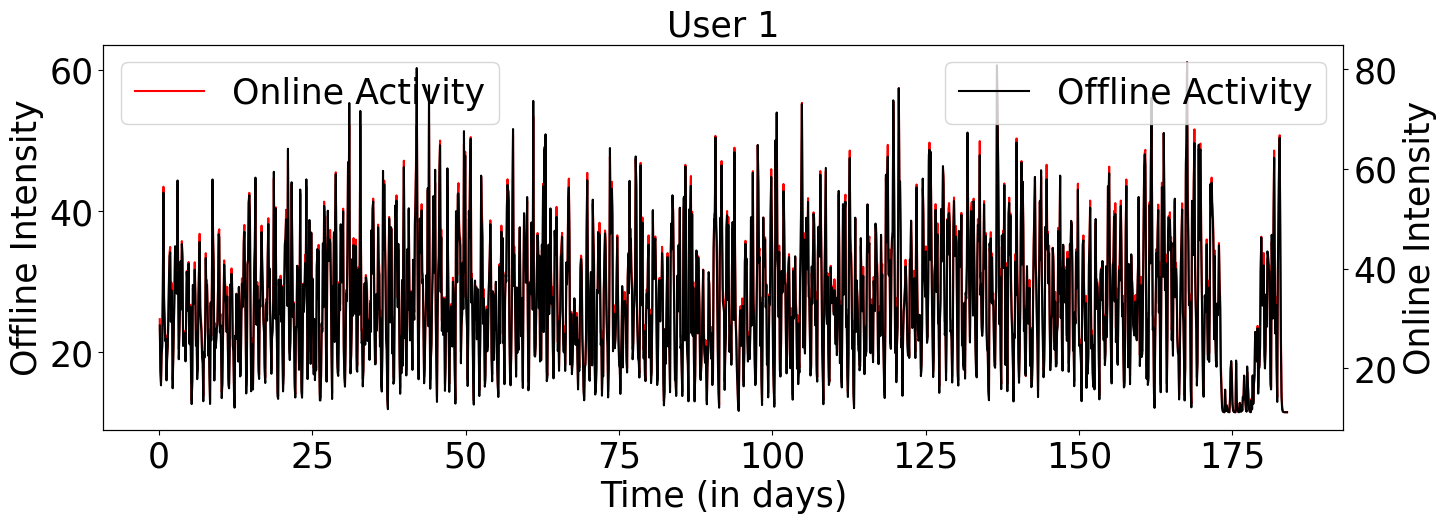

In [18]:
sizes = analyzer.sample_size() # sizes of online and offline activity for each user
display(sizes)
analyzer.plot_intensity() # plot the coupled online--offline intensity for each user
#analyzer.plot_intensity(save_figs = True, ext="png") # This is if you want to save the figures, you can precise the desired extension

In [25]:
M

1